# Abusive Words Detection

## 1. Importing Required Libraries

In [1]:
import pandas as pd # For data operations
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer as sia # For sentiment analysis
import re # For regular expressions
from nltk.corpus import stopwords # For stopwords removal
from nltk.tokenize import word_tokenize # For tokenization
from wordcloud import WordCloud # For creating a wordcloud
from nltk.probability import FreqDist # For token frequency distribution
import matplotlib.pyplot as plt # For token frequency visualization
import seaborn as sns # For explorartory analysis
from nltk.stem.wordnet import WordNetLemmatizer # For noise removal
from nltk import pos_tag # For identifying word group
import plotly.express as pl # For sentiment visualization
import numpy as np # For array operations
from sklearn.naive_bayes import MultinomialNB # For creating a multinomial naive bayes model
from sklearn.naive_bayes import GaussianNB # For creating a gaussian naive bayes model
from sklearn.naive_bayes import BernoulliNB # For creating a bernoulli naive bayes model
from sklearn.linear_model import SGDClassifier # For creating a logistic regression and a stochastic gradient descent model
from xgboost import XGBClassifier # For xgboost model
from sklearn.svm import LinearSVC # For creating a svc model
from sklearn.tree import DecisionTreeClassifier # For creating a decision tree model
from sklearn.ensemble import RandomForestClassifier # For creating a random forest tree model
from sklearn.model_selection import train_test_split # For data split
from sklearn.feature_extraction.text import CountVectorizer # For converting data into array
from sklearn.metrics import accuracy_score # For computing model accuracy
from sklearn.pipeline import Pipeline # For creating pipeline
from sklearn.preprocessing import MinMaxScaler # For scaling
from sklearn.feature_extraction.text import TfidfVectorizer # For counting term frequency in topic modelling
from sklearn.feature_extraction.text import TfidfTransformer # For tfidf transformation
from sklearn.decomposition import NMF, LatentDirichletAllocation # For topic modelling using NMF and LDA
from dateutil.parser import parse # For parsing dates
import nltk # For language processing
nltk.download('punkt') # For obtaining punkt resource
nltk.download('stopwords') # For obtaining stopwords resource
import json # For creating a json file
from nltk.corpus import wordnet # For stemming
import string # For string operations
import spacy # For dominant topic modelling
import gensim # For gensim model
from gensim import corpora # For dictionary
import pyLDAvis # For plotting topics
import pyLDAvis.gensim_models as gensimv # For creating and plotting gensim topics
from gensim.models.coherencemodel import CoherenceModel # For creating coherence model
from sklearn.metrics import classification_report # For displaying classification report
from sklearn.metrics import confusion_matrix # For estimating confusion matrix
%matplotlib inline
import warnings # To disable warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dhrru\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dhrru\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## 2. Data Analysis

In [2]:
# Reading the dataset
data = pd.read_csv("speech_data.csv")

In [3]:
# Displaying top 5 tweets
data.head()

tweet  class
0  !!! RT @mayasolovely: As a woman you shouldn't...      2
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...      1
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...      1
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...      1
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...      1

In [4]:
# Displaying columns
data.columns

Index(['tweet', 'class'], dtype='object')

<AxesSubplot:xlabel='class', ylabel='count'>

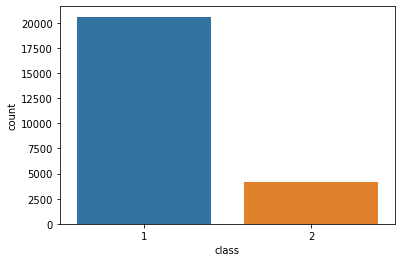

In [5]:
sns.countplot('class',data=data)

In [6]:
# Examining class 1 tweets
# Class 1 tweets involves hate speech
data[data['class']==1]

tweet  class
1      !!!!! RT @mleew17: boy dats cold...tyga dwn ba...      1
2      !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...      1
3      !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...      1
4      !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...      1
5      !!!!!!!!!!!!!!!!!!"@T_Madison_x: The shit just...      1
...                                                  ...    ...
24776                                 you're all niggers      1
24777  you're such a retard i hope you get type 2 dia...      1
24778  you's a muthaf***in lie &#8220;@LifeAsKing: @2...      1
24780  young buck wanna eat!!.. dat nigguh like I ain...      1
24781              youu got wild bitches tellin you lies      1

[20620 rows x 2 columns]

In [7]:
# Examining class 2 tweets
# Class 2 tweets are normal tweets
data[data['class']==2]

tweet  class
0      !!! RT @mayasolovely: As a woman you shouldn't...      2
40       " momma said no pussy cats inside my doghouse "      2
63     "@Addicted2Guys: -SimplyAddictedToGuys http://...      2
66     "@AllAboutManFeet: http://t.co/3gzUpfuMev" woo...      2
67     "@Allyhaaaaa: Lemmie eat a Oreo &amp; do these...      2
...                                                  ...    ...
24736  yaya ho.. cute avi tho RT @ViVaLa_Ari I had no...      2
24737  yea so about @N_tel 's new friend.. all my fri...      2
24767  you know what they say, the early bird gets th...      2
24779  you've gone and broke the wrong heart baby, an...      2
24782  ~~Ruffled | Ntac Eileen Dahlia - Beautiful col...      2

[4163 rows x 2 columns]

In [8]:
# Data type information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   24783 non-null  object
 1   class   24783 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 387.4+ KB


In [9]:
# Data Description
data.describe()

class
count  24783.000000
mean       1.167978
std        0.373854
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        2.000000

In [10]:
# Counting unique values
data.nunique()

tweet    24783
class        2
dtype: int64

In [11]:
# Examining null values
data.isna().sum()

tweet    0
class    0
dtype: int64

## 3. Data Preprocessing

In [12]:
# Examining contractions
data_clean  = data
data_clean_contractions = data_clean[data_clean['tweet'].str.contains(r'can\'t|won\'t|isn\'t|doesn\'t|didn\'t|don\'t|haven\'t|couldn\'t|you\'ll|I\'ll|I\'ve|I\'m|it\'ll|it\'s|could\'ve|would\'ve|hadn\'t|hasn\'t|should\'ve|shouldn\'t|must\'ve|who\'s|they\'re|they\'ll|they\'ve|that\'s|there\'s')].value_counts().sum()
data_clean_contractions

4526

In [13]:
data_clean

tweet  class
0      !!! RT @mayasolovely: As a woman you shouldn't...      2
1      !!!!! RT @mleew17: boy dats cold...tyga dwn ba...      1
2      !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...      1
3      !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...      1
4      !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...      1
...                                                  ...    ...
24778  you's a muthaf***in lie &#8220;@LifeAsKing: @2...      1
24779  you've gone and broke the wrong heart baby, an...      2
24780  young buck wanna eat!!.. dat nigguh like I ain...      1
24781              youu got wild bitches tellin you lies      1
24782  ~~Ruffled | Ntac Eileen Dahlia - Beautiful col...      2

[24783 rows x 2 columns]

In [14]:
# Handling data punctuations
data_clean.replace("@\S*\s", " ", regex=True, inplace=True)
data_clean.replace("https?://\S+|www\.\S+", " ", regex=True, inplace=True)
data_clean.replace("[^a-zA-Z]", " ", regex=True, inplace=True)
data_clean

tweet  class
0          RT  As a woman you shouldn t complain abou...      2
1            RT  boy dats cold   tyga dwn bad for cuf...      1
2              RT  Dawg     RT  You ever fuck a bitch...      1
3                            RT   she look like a tranny      1
4                    RT  The shit you hear about me m...      1
...                                                  ...    ...
24778  you s a muthaf   in lie           right  His T...      1
24779  you ve gone and broke the wrong heart baby  an...      2
24780  young buck wanna eat     dat nigguh like I ain...      1
24781              youu got wild bitches tellin you lies      1
24782    Ruffled   Ntac Eileen Dahlia   Beautiful col...      2

[24783 rows x 2 columns]

In [15]:
# Converting tweets to lower case
data_clean['tweet'] = data_clean[['tweet']].applymap(str.lower)
data_clean

tweet  class
0          rt  as a woman you shouldn t complain abou...      2
1            rt  boy dats cold   tyga dwn bad for cuf...      1
2              rt  dawg     rt  you ever fuck a bitch...      1
3                            rt   she look like a tranny      1
4                    rt  the shit you hear about me m...      1
...                                                  ...    ...
24778  you s a muthaf   in lie           right  his t...      1
24779  you ve gone and broke the wrong heart baby  an...      2
24780  young buck wanna eat     dat nigguh like i ain...      1
24781              youu got wild bitches tellin you lies      1
24782    ruffled   ntac eileen dahlia   beautiful col...      2

[24783 rows x 2 columns]

In [16]:
# Creating tokens
data_clean_token_list = []

for each in data_clean['tweet']:
    token = word_tokenize(each)
    data_clean_token_list.append(token)
data_clean_token_list

[['rt',
  'as',
  'a',
  'woman',
  'you',
  'shouldn',
  't',
  'complain',
  'about',
  'cleaning',
  'up',
  'your',
  'house',
  'amp',
  'as',
  'a',
  'man',
  'you',
  'should',
  'always',
  'take',
  'the',
  'trash',
  'out'],
 ['rt',
  'boy',
  'dats',
  'cold',
  'tyga',
  'dwn',
  'bad',
  'for',
  'cuffin',
  'dat',
  'hoe',
  'in',
  'the',
  'st',
  'place'],
 ['rt',
  'dawg',
  'rt',
  'you',
  'ever',
  'fuck',
  'a',
  'bitch',
  'and',
  'she',
  'start',
  'to',
  'cry',
  'you',
  'be',
  'confused',
  'as',
  'shit'],
 ['rt', 'she', 'look', 'like', 'a', 'tranny'],
 ['rt',
  'the',
  'shit',
  'you',
  'hear',
  'about',
  'me',
  'might',
  'be',
  'true',
  'or',
  'it',
  'might',
  'be',
  'faker',
  'than',
  'the',
  'bitch',
  'who',
  'told',
  'it',
  'to',
  'ya'],
 ['the',
  'shit',
  'just',
  'blows',
  'me',
  'claim',
  'you',
  'so',
  'faithful',
  'and',
  'down',
  'for',
  'somebody',
  'but',
  'still',
  'fucking',
  'with',
  'hoes'],
 ['i',

In [17]:
# Creating a new coolumn to show tweets and tokens side by side
data_clean['tokens'] = data_clean_token_list
data_clean

tweet  class  \
0          rt  as a woman you shouldn t complain abou...      2   
1            rt  boy dats cold   tyga dwn bad for cuf...      1   
2              rt  dawg     rt  you ever fuck a bitch...      1   
3                            rt   she look like a tranny      1   
4                    rt  the shit you hear about me m...      1   
...                                                  ...    ...   
24778  you s a muthaf   in lie           right  his t...      1   
24779  you ve gone and broke the wrong heart baby  an...      2   
24780  young buck wanna eat     dat nigguh like i ain...      1   
24781              youu got wild bitches tellin you lies      1   
24782    ruffled   ntac eileen dahlia   beautiful col...      2   

                                                  tokens  
0      [rt, as, a, woman, you, shouldn, t, complain, ...  
1      [rt, boy, dats, cold, tyga, dwn, bad, for, cuf...  
2      [rt, dawg, rt, you, ever, fuck, a, bitch, and,...  
3                       [rt, she, look, like, a, tranny]  
4      [rt, the, shit, you, hear, about, me, might, b...  
...                                                  ...  
24778  [you, s, a, muthaf, in, lie, right, his, tl, i...  
24779  [you, ve, gone, and, broke, the, wrong, heart,...  
24780  [young, buck, wan, na, eat, dat, nigguh, like,...  
24781      [youu, got, wild, bitches, tellin, you, lies]  
24782  [ruffled, ntac, eileen, dahlia, beautiful, col...  

[24783 rows x 3 columns]

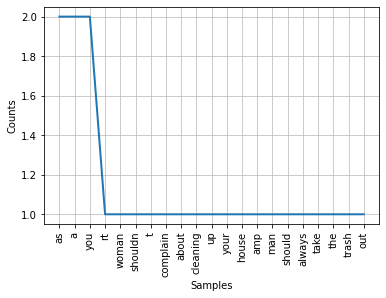

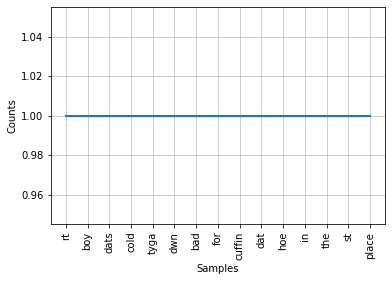

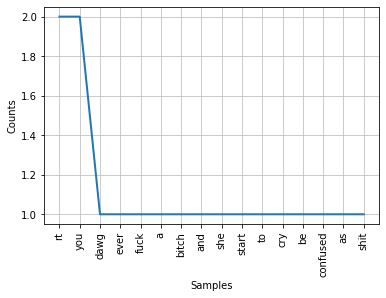

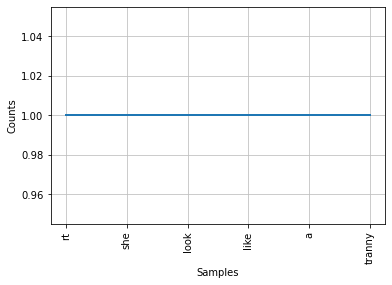

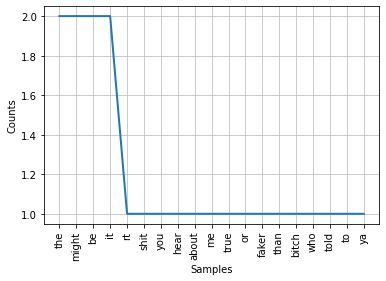

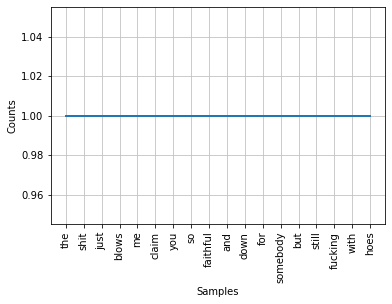

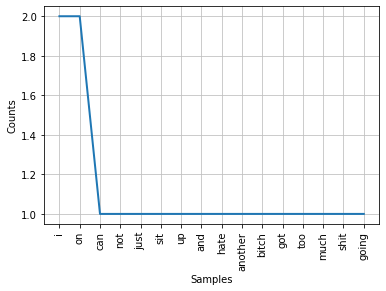

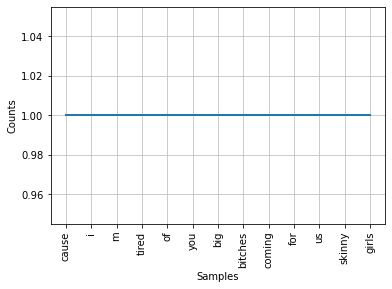

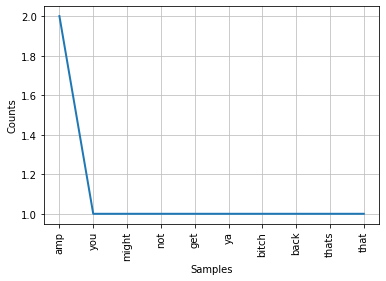

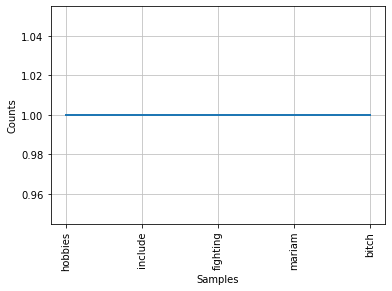

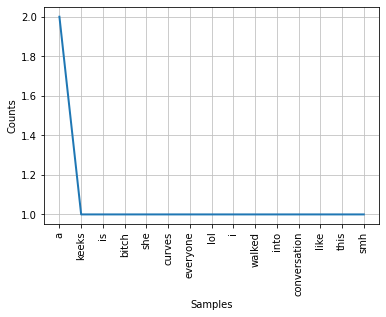

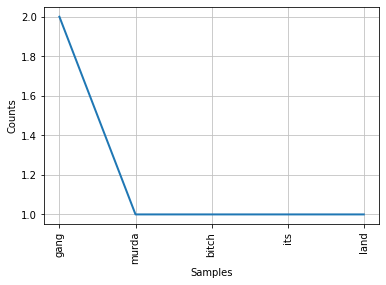

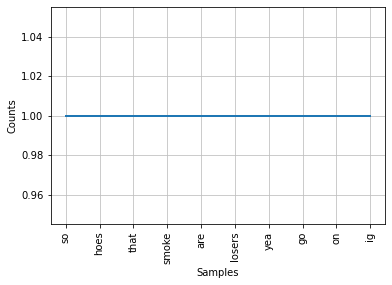

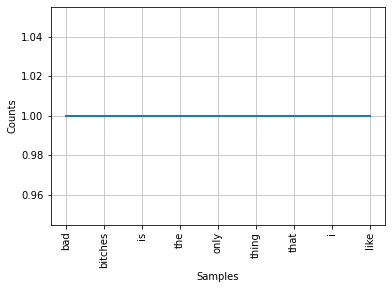

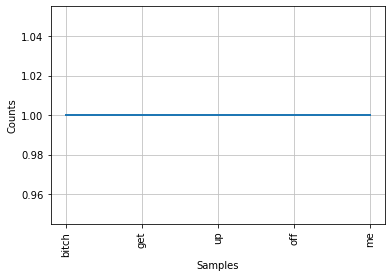

In [18]:
# Finding token frequency and appending the result into a list
data_clean_frequency_list = []

for each in data_clean_token_list:
    fdist = FreqDist(each)
    data_clean_frequency_list.append(fdist)

# Plotting 15 records of tokens groups according to their frequency
for each in range(15):
    data_clean_frequency_list[each].plot(30,cumulative=False)
    plt.show()

In [19]:
# Displaying most common tokens
fdist.most_common(4)

[('ruffled', 1), ('ntac', 1), ('eileen', 1), ('dahlia', 1)]

In [20]:
# Removing tokens if they are present in the stopwords list
data_clean_without_stopwords = []
stopwords_set = set(stopwords.words('english'))

for token in data_clean.tokens:
    word = [term for term in token if term not in stopwords_set]
    data_clean_without_stopwords.append(word)
    
# Creating a new column to show reviews, tokens, and stemmed tokens side by side
data_clean['tokens_without_stopwords'] = data_clean_without_stopwords
data_clean

tweet  class  \
0          rt  as a woman you shouldn t complain abou...      2   
1            rt  boy dats cold   tyga dwn bad for cuf...      1   
2              rt  dawg     rt  you ever fuck a bitch...      1   
3                            rt   she look like a tranny      1   
4                    rt  the shit you hear about me m...      1   
...                                                  ...    ...   
24778  you s a muthaf   in lie           right  his t...      1   
24779  you ve gone and broke the wrong heart baby  an...      2   
24780  young buck wanna eat     dat nigguh like i ain...      1   
24781              youu got wild bitches tellin you lies      1   
24782    ruffled   ntac eileen dahlia   beautiful col...      2   

                                                  tokens  \
0      [rt, as, a, woman, you, shouldn, t, complain, ...   
1      [rt, boy, dats, cold, tyga, dwn, bad, for, cuf...   
2      [rt, dawg, rt, you, ever, fuck, a, bitch, and,...   
3                       [rt, she, look, like, a, tranny]   
4      [rt, the, shit, you, hear, about, me, might, b...   
...                                                  ...   
24778  [you, s, a, muthaf, in, lie, right, his, tl, i...   
24779  [you, ve, gone, and, broke, the, wrong, heart,...   
24780  [young, buck, wan, na, eat, dat, nigguh, like,...   
24781      [youu, got, wild, bitches, tellin, you, lies]   
24782  [ruffled, ntac, eileen, dahlia, beautiful, col...   

                                tokens_without_stopwords  
0      [rt, woman, complain, cleaning, house, amp, ma...  
1      [rt, boy, dats, cold, tyga, dwn, bad, cuffin, ...  
2      [rt, dawg, rt, ever, fuck, bitch, start, cry, ...  
3                               [rt, look, like, tranny]  
4      [rt, shit, hear, might, true, might, faker, bi...  
...                                                  ...  
24778  [muthaf, lie, right, tl, trash, mine, bible, s...  
24779  [gone, broke, wrong, heart, baby, drove, redne...  
24780  [young, buck, wan, na, eat, dat, nigguh, like,...  
24781           [youu, got, wild, bitches, tellin, lies]  
24782  [ruffled, ntac, eileen, dahlia, beautiful, col...  

[24783 rows x 4 columns]

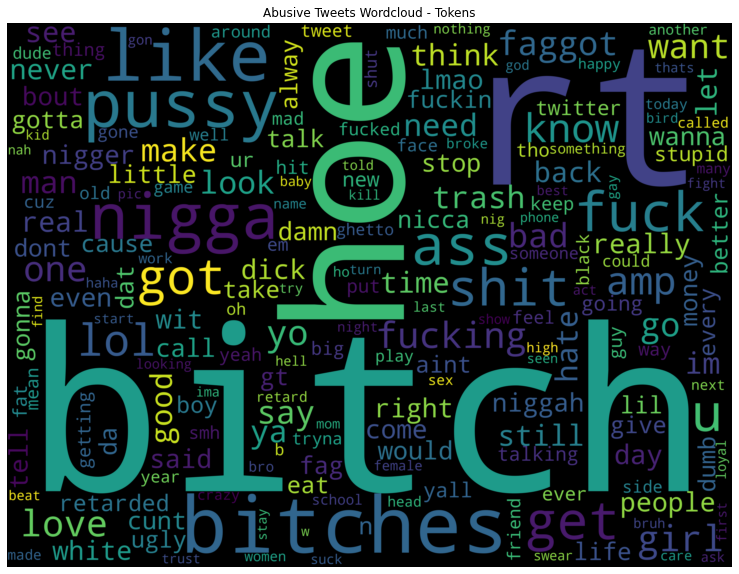

In [21]:
# Visualizing tokens a word cloud with a maximum limit of 100
abusive = data_clean[data_clean['class']==1]
feedbacks = " ".join(tweet for tweet in abusive.tweet)
data_clean_wordcloud = WordCloud(stopwords=stopwords_set, collocations = False, background_color = 'black', width = 4000,height = 3000).generate(feedbacks)
fig=plt.figure(figsize=(15, 10))
plt.imshow(data_clean_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Abusive Tweets Wordcloud - Tokens')
plt.show()

In [22]:
# Creaating an id2word dictionary and a doc term matrix for genism modelling
data_clean_dictionary = corpora.Dictionary(data_clean_without_stopwords)
data_clean_doc_term_matrix = [data_clean_dictionary.doc2bow(rev) for rev in data_clean_without_stopwords]

In [23]:
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Building LDA model
lda_model = LDA(corpus=data_clean_doc_term_matrix, id2word=data_clean_dictionary, num_topics=10, random_state=100, chunksize=1000, passes=50,iterations=100)

In [24]:
# Displaying topics with respect to each word of document
lda_model.print_topics()

[(0,
  '0.037*"rt" + 0.027*"yellow" + 0.022*"ho" + 0.017*"hoes" + 0.014*"loyal" + 0.014*"find" + 0.013*"buy" + 0.013*"lt" + 0.013*"done" + 0.013*"nicca"'),
 (1,
  '0.046*"rt" + 0.023*"charlie" + 0.019*"fat" + 0.016*"day" + 0.016*"many" + 0.015*"work" + 0.015*"ugly" + 0.014*"nigger" + 0.013*"happy" + 0.012*"turn"'),
 (2,
  '0.073*"bitch" + 0.052*"rt" + 0.044*"hoe" + 0.024*"ass" + 0.023*"u" + 0.021*"nigga" + 0.017*"shit" + 0.017*"get" + 0.016*"like" + 0.016*"na"'),
 (3,
  '0.024*"rt" + 0.018*"cunt" + 0.017*"birds" + 0.017*"today" + 0.014*"around" + 0.012*"b" + 0.012*"crazy" + 0.012*"tonight" + 0.011*"us" + 0.010*"call"'),
 (4,
  '0.101*"bitches" + 0.079*"rt" + 0.037*"bitch" + 0.035*"like" + 0.030*"hoes" + 0.026*"niggas" + 0.015*"got" + 0.012*"fuck" + 0.012*"ass" + 0.012*"get"'),
 (5,
  '0.043*"really" + 0.036*"bird" + 0.025*"yall" + 0.024*"twitter" + 0.023*"life" + 0.018*"face" + 0.017*"fucked" + 0.015*"head" + 0.012*"sorry" + 0.011*"wtf"'),
 (6,
  '0.138*"bitch" + 0.083*"rt" + 0.027*"li

In [25]:
# Estimating perplexity and coherence
coherence_model_lda = CoherenceModel(model=lda_model, texts = data_clean_without_stopwords, dictionary=data_clean_dictionary ,coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()

print('Perplexity Score: ', lda_model.log_perplexity(data_clean_doc_term_matrix, total_docs=10000))
print('\nCoherence Score: ', coherence_lda)

Perplexity Score:  -9.28026435209123

Coherence Score:  0.3454886483812365


In [26]:
# Displaying coherence score for each word of document
top_words_per_topic = []
for t in range(lda_model.num_topics):
    top_words_per_topic.extend([(t, ) + x for x in lda_model.show_topic(t, topn = 3)])

data_clean_topics_words_based = pd.DataFrame(top_words_per_topic, columns=['topic_number', 'word', 'coherence_score'])
data_clean_topics_words_based.sort_values(by='coherence_score', ascending=False)

topic_number     word  coherence_score
27             9    pussy         0.144904
18             6    bitch         0.138089
24             8    trash         0.104394
12             4  bitches         0.101113
19             6       rt         0.082533
13             4       rt         0.079178
6              2    bitch         0.073337
28             9       rt         0.062358
21             7     hoes         0.052467
7              2       rt         0.052372
22             7      got         0.051622
3              1       rt         0.045644
8              2      hoe         0.043939
15             5   really         0.043446
23             7     love         0.040724
14             4    bitch         0.036558
0              0       rt         0.036554
16             5     bird         0.035512
25             8    white         0.032137
20             6     like         0.027161
1              0   yellow         0.026767
17             5     yall         0.025001
9              3       rt         0.024133
4              1  charlie         0.022936
29             9     take         0.022257
2              0       ho         0.022157
26             8   niggah         0.019710
5              1      fat         0.018678
10             3     cunt         0.018003
11             3    birds         0.017307

In [27]:
# Visualizing lda model
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, data_clean_doc_term_matrix, data_clean_dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.263012  0.000655       1        1  22.311746
4     -0.255532 -0.040977       2        1  16.509048
6     -0.226586  0.035816       3        1  13.942784
7      0.042328 -0.322048       4        1   8.416834
3      0.068989  0.104489       5        1   7.552405
9      0.002629  0.092826       6        1   7.499469
1      0.098783  0.168644       7        1   6.485260
8      0.211395 -0.026464       8        1   6.284283
5      0.198323 -0.072467       9        1   5.704851
0      0.122682  0.059527      10        1   5.293319, topic_info=         Term         Freq        Total Category  logprob  loglift
21      bitch  8016.000000  8016.000000  Default  30.0000  30.0000
52    bitches  3213.000000  3213.000000  Default  29.0000  29.0000
115     pussy  2092.000000  2092.000000  Default  28.0000  28.0000
8       trash  1263.000000  1263.000000  Default  27.0000  27.0000
6          rt  9171.000000  9171.000000  Default  26.0000  26.0000
..        ...          ...          ...      ...      ...      ...
166  favorite    65.019837    65.910963  Topic10  -5.0541   2.9251
849       pop    63.256648    64.147765  Topic10  -5.0816   2.9247
6          rt   372.353144  9171.596013  Topic10  -3.3090  -0.2653
42       hoes   177.795182  2504.498791  Topic10  -4.0482   0.2935
407      show    74.379514   140.765729  Topic10  -4.9196   2.3008

[462 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
221       2  0.989896       act
3848      6  0.986150    acting
783       2  0.988973  actually
788       3  0.992761        af
3985      5  0.982346       ago
...     ...       ...       ...
682      10  0.997993    yellow
259       1  0.994745       yes
1658      2  0.985829       yet
312       1  0.847508        yo
312       3  0.151341        yo

[555 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 5, 7, 8, 4, 10, 2, 9, 6, 1])

In [28]:
# Finding polarity score of each tweet
# It will show the polarity scores (positive, negative, neutral, and compound) of each tweet along with the tweet received
# Polarity scores will then be inserted into a list which will be accessed later to compute sentiment scores
data_clean_polarity_score_list = []

for each in data_clean.tokens_without_stopwords:
    polarity_score = sia().polarity_scores(each)
    polarity_score['label'] = each
    data_clean_polarity_score_list.append(polarity_score)
    print(polarity_score)

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'woman', 'complain', 'cleaning', 'house', 'amp', 'man', 'always', 'take', 'trash']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'boy', 'dats', 'cold', 'tyga', 'dwn', 'bad', 'cuffin', 'dat', 'hoe', 'st', 'place']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'dawg', 'rt', 'ever', 'fuck', 'bitch', 'start', 'cry', 'confused', 'shit']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'look', 'like', 'tranny']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'shit', 'hear', 'might', 'true', 'might', 'faker', 'bitch', 'told', 'ya']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['shit', 'blows', 'claim', 'faithful', 'somebody', 'still', 'fucking', 'hoes']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['sit', 'hate', 'another', 'bitch', 'got', 'much', 'shit', 'going']}
{'neg': 0.0, 'neu': 1.0, 'po

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['shit', 'damn', 'skippy', 'lol']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['u', 'ever', 'kill', 'ant', 'sidewalk', 'think', 'damn', 'nigga', 'way', 'get', 'pussy', 'bs', 'must', 'b', 'gt', 'chance']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rings', 'mvps', 'bitches', 'lol']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['ppl', 'talk', 'bad', 'ghetto', 'hood', 'kid', 'growing', 'nigga', 'funnnnnnn']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['facts', 'tattoos', 'tattoo', 'pussy', 'tattooing', 'nipples']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'bitches', 'wanting', 'act', 'like', 'niggas', 'bad', 'shit', 'aint', 'cuteeeee', 'niggas', 'act', 'like', 'bitches']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['get', 'worshiping', 'bitch', 'woof', 'woof']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'co

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['nigga', 'know', 'hacky', 'sack', 'hoes', 'nah', 'throw', 'look', 'passes', 'lmao']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['glad', 'getting', 'outta', 'atlanta', 'nothing', 'bunch', 'niggas', 'amp', 'outta', 'jail', 'amp', 'dumb', 'bitches', 'mad', 'kids', 'fuckin', 'em']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['ghetto', 'smart', 'idc']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['would', 'wife', 'hoe', 'cuz', 'care', 'cheating', 'force', 'relationship', 'first', 'place']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['single', 'excuse', 'hoe', 'theonemiss', 'luu']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['white', 'boy', 'power', 'bitch', 'black', 'power', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['lets', 'get', 'drunk', 'get', 'blowed', 'spit', 'shit', 'spark', 'blunts', 'amp', 

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['never', 'seen', 'bitch', 'obsessed', 'nigga', 'obsessed', 'mine']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['kobe', 'stay', 'talking', 'trash', 'let', 'forget', 'meant', 'one', 'smh']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['least', 'nigger', 'lmfao']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['people', 'always', 'asking', 'mixed', 'bad', 'asian', 'bitch', 'lol']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['ariza', 'snake', 'coward', 'least', 'cripple', 'like', 'hero', 'roach', 'lmaoo']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['fosters', 'home', 'imaginary', 'trash', 'whoa', 'chill', 'show', 'everything', 'tf']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['lowkey', 'tired', 'tired', 'quiet', 'go', 'sleep', 'hoe']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['stop', 'bri

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['slushes', 'hoes', 'nasty', 'anyway', 'fam', 'hoes', 'taste', 'like', 'meds']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['slushes', 'hoes', 'nasty', 'anyway', 'fam']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bobby', 'bitch', 'getting', 'live', 'fuck', 'hell', 'yea', 'play', 'hoe', 'workout']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['yo', 'bitch', 'gucci', 'mane', 'rt', 'bitch', 'stoner']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['ride', 'bitch', 'handle', 'bars']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['hoe', 'get', 'traphoussseeeee']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['sad', 'tv', 'character', 'deaths', 'still', 'bitter', 'stark', 'man']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['harbor', 'bitches', 'party', 'bus', 'hoes', 'lol']}
{'neg': 0.0, 'neu': 1.0

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['right', 'bitches', 'smh']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['ban', 'dat', 'pussy', 'life', 'amp', 'got', 'ta', 'pay', 'millon', 'dollar', 'fine']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['roses', 'red', 'violets', 'blue', 'niggers', 'black', 'know', 'true', 'dylan']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['sitting', 'window', 'sill', 'window', 'open', 'bird', 'tries', 'fly', 'smacked', 'protecttheanimals', 'peta']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['nigga', 'gon', 'nigga', 'nigga', 'sound', 'fuckin', 'retarded']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['video', 'entire', 'media', 'likely', 'mock', 'crybaby']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['even', 'shy', 'stfu', 'kikis', 'mom', 'hi', 'angelique', 'angelique', 'smiles', 'dips', 'cracker', 'soup']}
{'neg': 0.0

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['think', 'celebrity', 'pussy', 'different', 'locals', 'yeah', 'meghan', 'goods']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['saw', 'ajumma', 'walk', 'beginning', 'saying', 'wow', 'trash', 'even', 'listen', 'lmaoo']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['need', 'sox', 'fuck', 'yeah', 'love', 'kinky', 'scally', 'lad', 'w', 'rank', 'sox', 'sneaks']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['ever', 'expose', 'females', 'like', 'childish', 'bitch', 'nigga', 'shiiii']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['yasss', 'trys', 'new', 'things', 'bestfriend', 'bitch', 'love']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['dude', 'remember', 'wop', 'video', 'omg', 'find']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['thick', 'raw', 'fuck', 'damn', 'man', 'pussy', 'getting', 'workout']}
{'neg': 0.0, 'n

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['call', 'bitch', 'makennam']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['handle', 'liquor', 'bitches', 'handle', 'meeedd', 'chief', 'sosa']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['chase', 'dudes', 'chase', 'bitches', 'edgar', 'bautista']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['love', 'hoes', 'baby', 'forever']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['dont', 'even', 'need', 'picture', 'tamar', 'bitch', 'beat', 'every', 'picture']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['dont', 'hoes']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['found', 'new', 'way', 'chug', 'open', 'mouth', 'alot', 'shitallysays']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['fucking', 'hate', 'bitch', 'much', 'wan', 'na', 'smack', 'face', 'tongue', 'kiss']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0,

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['twitter', 'hacked', 'pussy', 'admit', 'said', 'want', 'act', 'like', 'never', 'said']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['nah', 'girl', 'gon', 'able', 'make', 'tight', 'since', 'russ', 'loss', 'job', 'back', 'like', 'damn', 'bitch', 'really']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['nah', 'yo', 'thought', 'photoshopped', 'face', 'faggot', 'smmfh', 'hate', 'yall']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['new', 'flame', 'song', 'yr', 'lol', 'bitch', 'super', 'run', 'like']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['niggas', 'always', 'yelling', 'fuck', 'bitches', 'get', 'money', 'meanwhile', 'broke', 'still', 'want', 'bitches']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['niggas', 'pressed', 'pussy', 'eeeeeen', 'nothin']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bitches', 'nan']

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['shank', 'bitch', 'ceviche']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['work', 'gets', 'rough', 'days', 'hahaha', 'hoes']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['wow', 'bitch', 'yes', 'already', 'established', 'anything', 'else', 'say']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['forget', 'brand', 'new', 'baby', 'girl', 'home', 'bitch', 'cookies', 'burning']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['yah', 'said', 'word', 'mtzra', 'ym', 'egyptians', 'people', 'ysrah', 'al', 'inheritance', 'kushite', 'ethiopians']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['yaoooooooo', 'mawnin', 'yardies']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['yo', 'bitch', 'horn', 'tryna', 'shoot', 'porn', 'shirt', 'worthy', 'tony']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['yo', 'sublet', '

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rappers', 'say', 'twat', 'makes', 'feel', 'weird']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['better', 'pipe', 'pussy', 'wth', 'even', 'mean']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['fucking', 'pussy', 'even', 'beat', 'dick', 'angry', 'youtube', 'comment']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['cunt', 'right', 'rq']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['son', 'bitch', 'moment', 'rains', 'forget', 'car', 'windows']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['thingsthatgetsonmynerves', 'needy', 'hoes', 'ratchet', 'hoes', 'sideline', 'hoes', 'beggin', 'hoes', 'dumb', 'hoes', 'looking', 'love', 'facebook', 'hoes']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['get', 'hit', 'bitch', 'campus', 'wants']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['personidbitchslap'

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['happycolumbusday', 'hate', 'sound', 'peta', 'callous', 'buffalo', 'lot', 'worse', 'injuns']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['havok', 'one', 'bad', 'bitch', 'wan', 'na', 'mess', 'tna', 'impact']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['hellyeah', 'rt', 'rt', 'happy', 'fall', 'pumpkin', 'spice', 'oreos']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['hellobrookland', 'opening', 'serving', 'free', 'samples', 'cider', 'vegan', 'sliders', 'brownies']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['holyspirit', 'joshua', 'every', 'place', 'sole', 'foot', 'shall', 'tread', 'upon', 'given', 'unto', 'said', 'unto', 'moses']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['honestyhour', 'middle', 'school', 'hoes', 'used', 'call', 'mandingo', 'warrior']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['idon

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['southcarolina', 'full', 'white', 'trash']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['splashgang', 'pussy', 'n', 'z', 'ay', 'tried', 'tell', 'n', 'z']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['stopwhitepeople', 'rt', 'cases', 'west', 'nile', 'virus', 'infections', 'reported', 'orange', 'county', 'year', 'dead', 'birds', 'found', 'carrying', 'virus']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['tbt', 'love', 'forever', 'ling', 'ling']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['theboondocks', 'nicca']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['truth', 'rt', 'david', 'charlie', 'brown', 'scandal']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['son', 'bitch', 'moment', 'finally', 'get', 'bed', 'bladder', 'decides', 'time', 'piss']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['illneverunderstandwhy', 'anyone', 'jersey', 'shore', 'famous', 'go', 'guido', 'shitbag', 'means', 'money', 'family']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['inktober', 'twentysix', 'gouache', 'mt', 'snappy', 'pappy', 'bitch', 'x', 'good', 'thing', 'sable', 'paintbrushes']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['inners', 'still', 'hanging', 'yankees', 'need', 'win', 'nfl', 'sunday']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['iubb', 'suiting', 'tonight', 'indiana', 'iu', 'ncaa', 'hoosierdaddy', 'hoosiernation', 'hoosiers']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['klokus', 'bitch', 'nose', 'pierced']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['longhair', 'care', 'got', 'gayboyproblems', 'everywhere', 'bitch', 'champ', 'totally', 'full']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['met

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['porn', 'android', 'iphone', 'ipad', 'sex', 'xxx', 'xxx', 'hairy', 'alicia', 'silver', 'amp', 'tinslee', 'reagan', 'hairy', 'pussy']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['porn', 'android', 'iphone', 'ipad', 'sex', 'xxx', 'xxx', 'homemade', 'pussy', 'eating']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['portlandia', 'putabirdonit', 'rt', 'xbox', 'one', 'would', 'much', 'cooler', 'put', 'bird']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['real', 'rt', 'rt', 'rt', 'rt', 'tell', 'gf', 'hoe', 'happy']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['realtalk', 'hoe', 'try', 'get', 'serious', 'someone', 'expect', 'anything', 'piece', 'meat']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['redneck', 'tow', 'truck', 'johndeere', 'america']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rejectedpeanutsspecials

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['important', 'thing', 'temporary', 'bullshit', 'lies', 'fa', 'birds', 'kill']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['racist', 'month', 'fuck', 'u', 'honkey']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['gucci', 'b', 'rude', 'shit', 'lol', 'nice', 'bitch', 'aint', 'worth', 'quarter']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'mimi', 'old', 'covering', 'titties', 'sex', 'bitch', 'childish']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'lmfao', 'rt', 'watching', 'porn', 'amp', 'beating', 'amp', 'yo', 'homie', 'text', 'u', 'amp', 'show', 'name', 'banner', 'faggot']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bruh', 'hoes', 'got', 'ta', 'stupid']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['somebody', 'gon', 'na', 'die', 'rt', 'theres', 'bitch', 'njt', 'setting', 'lean', 'tweet']}
{'n

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'niggaz', 'get', 'free', 'pussy', 'bounce', 'beats', 'alone']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['foh', 'rt', 'idgt', 'rt', 'good', 'pussy', 'neva', 'get', 'tired']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'swear', 'niggas', 'use', 'step', 'one', 'foot', 'bus', 'bitches', 'would', 'like', 'nextttt']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'bae', 'go', 'text', 'hoes']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'brees', 'trash', 'since']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'work', 'imma', 'real', 'uncle', 'tom']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'nope', 'thts', 'wht', 'says', 'rt', 'hoe', 'people', 'person']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bitch', 'moreno', 'valley']}
{'neg': 0.0, 'neu': 1.0, 'pos'

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'yankees', 'michael', 'pineda', 'next', 'start', 'nole']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['flappy', 'bird', 'shit', 'joke', 'real', 'tho']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['start', 'crying', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['hate', 'girls', 'get', 'drunk', 'amp', 'turn', 'hoes', 'fvckin', 'waste', 'alcohol']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['shout', 'momma', 'cuz', 'raise', 'hoe']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['mud', 'shark', 'black', 'friends', 'makes', 'perfect', 'sense', 'idiotic']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['itsy', 'bitsy', 'teeny', 'weeny', 'yellow', 'pock', 'dot', 'bikini', 'polk', 'ashton', 'polk']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['yes', 'iam', 'single', 'mess', 'talk', 'a

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bitch', 'u', 'gone', 'say', 'bitch', 'phone', 'bitch', 'cuz', 'let', 'mfs', 'know']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['really', 'hate', 'bitch', 'knows', 'best']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['hate', 'bitch', 'like', 'argue', 'n', 'shyt']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['boney', 'little', 'hoe', 'smile', 'day', 'funny']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['viet', 'goddamn', 'nam', 'happened', 'go', 'get', 'beer', 'bitch', 'john', 'colman']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['got', 'carburetor', 'foyer', 'chevy', 'c', 'rebuilt', 'redneck', 'friend', 'everybodys', 'got', 'one', 'need', 'build']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['ur', 'seriously', 'fag', 'hate']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['stupid', 'bi

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['get', 'done', 'running', 'train', 'bitch', 'thats', 'period', 'nasty']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['u', 'shit', 'using', 'linkedin', 'work', 'b', 'lmfaoo', 'bagging', 'linkiden', 'hoes', 'lol']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bitch', 'fresh']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['malibus', 'come', 'news', 'mean', 'denna', 'hoe', 'even', 'light', 'skinedddd', 'hahaha']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['fck', 'nigger', 'lol', 'jk', 'bra']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['dej', 'loaf', 'ever', 'bitch', 'wc', 'today', 'takes', 'lil', 'juice', 'bitches', 'want']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['lol', 'good', 'got', 'nasty', 'rednecks', 'back', 'take', 'care', 'business', 'serious']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['honesty', 'ask', 'ugly', 'hoe']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bouta', 'let', 'banko', 'kno', 'goin', 'ronneagle', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['hoes', 'feel', 'like', 'photo', 'didnt', 'get', 'enough', 'favorites', 'thirsty', 'ass']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['done', 'w', 'fuck', 'niggas', 'snip', 'snip', 'hoe', 'stfu']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bol', 'called', 'girl', 'bitch', 'oharrd', 'coo', 'tho']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['wow', 'putting', 'whole', 'manifesto', 'using', 'twitlonger', 'canadian', 'hey', 'hoser', 'many', 'adopt']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['kit', 'kat', 'brownies', 'making']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bruh', 'rt', 'trent', 'took', '

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['lmao', 'amp', 'aero', 'sound', 'young', 'af', 'talking', 'bout', 'hoes', 'n', 'weed', 'n', 'shit', 'brah', 'got', 'ta', 'listen', 'shit']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['niggas', 'long', 'ass', 'monkey', 'arms', 'make', 'best', 'cuddle', 'buddies', 'heard', 'ahaha', 'female', 'told']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['sometimes', 'hate', 'az', 'amp', 'sometimes', 'love', 'depends', 'time', 'year', 'guess', 'amp', 'dumb', 'bitches', 'live']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['dudes', 'shaving', 'without', 'athletic', 'purpose', 'gay', 'af', 'retarded']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['eating', 'cuz', 'women', 'cook', 'u', 'got', 'ta', 'get', 'rid', 'hoe']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['going', 'miss', 'bitches', 'much', 'far', 'right', 'resting', 'ol', 'girl', 'b

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bout', 'time', 'rt', 'chicks', 'want', 'man', 'want', 'support', 'tell', 'bitch', 'get', 'bra']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['pussy', 'stank']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['remember', 'bro', 'show', 'people']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['uhoh', 'got', 'hoes', 'lol', 'rt', 'found', 'letter', 'car', 'naaah']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['sending', 'nudes', 'snap', 'chats', 'one', 'guys', 'favorites', 'hoe']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['mondays', 'whole', 'lot', 'better', 'driving', 'vehicle', 'white', 'pussy', 'uhhh', 'get', 'ya']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['longer', 'side', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['spitting', 'people', 'shows', 'raised', 'right', 'another', 

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['let', 'girl', 'handcuff', 'bed', 'thinkin', 'gon', 'something', 'freaky', 'bitch', 'went', 'phone']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['pussy', 'treated', 'condoms', 'like', 'cars', 'treat', 'seatbelts', 'kept', 'beeping', 'u', 'put']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['almost', 'yrs', 'one', 'gf', 'since', 'u', 'fckn', 'hoes', 'huh']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['relationship', 'ended', 'life', 'stop', 'whiny', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['fck', 'like', 'hoe', 'thank', 'ima', 'classy', 'bitch', 'dead']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['hate', 'bitches', 'come', 'school', 'musty', 'like', 'tf', 'walk', 'house', 'stank', 'mama', 'shit']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['jealous', 'bitches', 'like', 'subtweet', 'hoe']}
{'

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['good', 'pussy', 'making', 'nigga', 'regroup', 'pull', 'get', 'thoughts', 'together']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['ate', 'oomf', 'pussy']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['ion', 'care', 'none', 'bitches']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['never', 'seen', 'many', 'perfect', 'bitches', 'til', 'made', 'twitter']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['boss', 'ass', 'bitch', 'bitch', 'bitch', 'bitch', 'bitch', 'bitch', 'bitch', 'sarahninjaginga']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['agreed', 'eating', 'pussy', 'much', 'better', 'nasty']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['fuck', 'wcw', 'dats', 'bitch', 'crush']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['want', 'bitches', 'big', 'boooty', 'bitches']}
{'neg': 0.0, 'neu': 1.

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['u', 'hoe', 'broski', 'u', 'got', 'ta', 'look', 'dat', 'shit']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['lil', 'bitty', 'bitch', 'lingo']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['shawty', 'wan', 'na', 'charge', 'pussy', 'like', 'whoa', 'turnt', 'cash', 'use', 'fuck', 'free']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['victor', 'amp', 'shawn', 'legs', 'hurt', 'jigg', 'every', 'damn', 'night']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['lol', 'someone', 'told', 'hoes', 'sent']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bitch', 'im', 'weakkk', 'vic']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['fuck', 'girls', 'peep', 'change', 'nigga', 'squared', 'bitch', 'ass']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['nobody', 'cares', 'kirk', 'bosley', 'care', 'bout', 'cousin', 'h

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bitches', 'popping', 'babies', 'like', 'sport', 'stop', 'lol']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['finger', 'bitch', 'w', 'trigger', 'finger', 'nigga', 'shut']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['dora', 'amp', 'table', 'manners', 'eating', 'like', 'sloppy', 'hoe']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['stop', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['demolishing', 'huge', 'bitch', 'caring']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['think', 'alex', 'games', 'sorry', 'son', 'bitch', 'never', 'win', 'us', 'game']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bitches', 'late', 'ion', 'exposed']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['feel', 'sorry', 'whoever', 'using', 'alyssa', 'number', 'play', 'phone', 'games', 'dumb', 'ass', 'hoes', 'g

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['new', 'song', 'diana', 'well', 'written', 'well', 'done', 'boyzzzzzz', 'bow', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['big', 'oleeeee', 'middle', 'finger', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['people', 'complain', 'prices', 'like', 'bitch', 'look', 'like', 'make', 'rules']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['hate', 'bitch', 'amp', 'fact', 'oomf', 'likes', 'retweeettt', 'x']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['hoe', 'lmfao', 'smuts', 'lmao']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['guys', 'hoes', 'days', 'lmao', 'fucking', 'indirect', 'cause', 'put', 'blast', 'subbin']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['need', 'get', 'laid', 'sike', 'im', 'celibate', 'bitches', 'like']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['boot

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['group', 'chat', 'bitches', 'call', 'yall', 'undercover', 'feds', 'watching', 'everybody']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['smh', 'got', 'ta', 'grow', 'least', 'know', 'bitches', 'want', 'swear']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['ex', 'hits', 'miss', 'bullshit', 'lol', 'bitch', 'die']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['hoe', 'gone', 'jam', 'watch', 'throwing', 'ass', 'bitch', 'fuck', 'party']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['yo', 'mama', 'confused', 'u', 'lol', 'hoes', 'got', 'manners']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['hoes', 'still', 'known']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['fuck', 'look', 'like', 'ho', 'look', 'like', 'yes', 'ya', 'look', 'like']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['raided', 'nicki', 

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['b', 'oreo', 'stunt', 'come', 'thru']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['one', 'single', 'bone', 'body', 'gives', 'fuck', 'next', 'bitch', 'thinks']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['think', 'girlfriend', 'get', 'locked', 'shed', 'first', 'one', 'raped', 'pussy', 'really', 'bitch', 'really', 'swerve']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['dumb', 'ass', 'bitches', 'next', 'time']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['people', 'even', 'get', 'crushes', 'im', 'like', 'total', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['look', 'benz', 'bitch', 'shit']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['cool', 'story', 'bitch', 'pass', 'blunt', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['girl', 'stress', 'ion', 'even', 'hoes', 'shit', '

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['august', 'alsina', 'deserved', 'niggah']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['baby', 'moanin', 'got', 'zone', 'nn', 'want', 'bitch', 'next', 'pussy', 'like', 'ecstasy']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['babyy', 'moaaaanin', 'got', 'zone', 'nn', 'want', 'bitch', 'next', 'pussy', 'like', 'ecstasy']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['beat', 'pussy', 'till', 'red', 'like', 'rosters', 'fuck', 'get', 'moovin', 'like', 'hoovas']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['love', 'stressful', 'niggah']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bitch', 'caught', 'body', 'week', 'ago', 'fuck', 'us', 'get', 'tweekin', 'hoe', 'run', 'niggah', 'get']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['broke', 'tf', 'outta', 'niggah', 'stopped', 'playen', 'defense']}
{'neg': 0.0, 'neu':

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['looked', 'ex', 'profile', 'struggling', 'weak', 'ass', 'niggah', 'god', 'good']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['niggah', 'alsina', 'doin', 'thang']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['make', 'niggah', 'buy', 'ring', 'ya', 'finger', 'jimmies', 'ya', 'feet', 'jeans', 'back', 'lingerie']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['mann', 'hoes', 'get', 'nothin', 'dick', 'instructions', 'mee', 'fucccccckn', 'said']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['mannnnn', 'wake', 'bitch', 'asses', 'blood']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['charger', 'got', 'fucked', 'finna', 'wrap', 'cord', 'tf', 'around', 'phone', 'bitch', 'finna', 'charge', 'today', 'cuhz']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['baby', 'mama', 'trippen', 'bitch', 'shoot']}
{'neg': 0.0, 'neu': 1.0,

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['backflip', 'thissssssss', 'rt', 'niggas', 'switch', 'opinions', 'like', 'faggots']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['gigantic', 'rt', 'big', 'faggot', 'rt', 'chubbs', 'bout', 'earl']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['nicolas', 'cage', 'unrolls', 'dusty', 'secret', 'scroll', 'says', 'james', 'madison', 'whiny', 'little', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['searches', 'yellow', 'pages', 'app', 'nearest', 'jack', 'box']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['sings', 'killed', 'pussy', 'died', 'eyes', 'open']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['teachers', 'call', 'pussy', 'senior', 'skip', 'day']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bo', 'rt', 'bruh', 'lol', 'retired', 'mw', 'everything', 'trash', 'afterwards']}
{'neg': 0.0, 'neu': 1.0, 'po

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['drunk', 'walk', 'let', 'drive', 'got', 'bitches', 'night', 'party', 'start', 'til', 'drugs', 'arrive', 'loaded']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['semi', 'evolved', 'monkey', 'desperately', 'searching', 'validation', 'meaning', 'life', 'bbqd', 'ok', 'mango', 'salsa']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['slap', 'hoe']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['pretty', 'close', 'trash', 'ass', 'nigga', 'quote', 'guess', 'body', 'count']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'rt', 'average', 'need', 'scale', 'ghetto', 'u']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['days', 'til', 'christmas', 'bitches']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['mile', 'dead', 'zone', 'radius', 'around', 'philly', 'got', 'ta', 'go', 'ny', 'dc', 'rt', 'tri', 'state', 'needs', 'bette

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['thharmony', 'user', 'followed', 'unfollowed', 'prude', 'ass', 'hoe']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['hoes', 'fat', 'big', 'boned', 'hehehehehe']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bout', 'match', 'wit', 'dis', 'nicca', 'donnydinero']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['pounds', 'never', 'fails', 'make', 'cry', 'im', 'bitch', 'relate']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['years', 'later', 'bitch', 'still', 'didnt', 'learn', 'lesson', 'lol', 'remember', 'first', 'major', 'nude', 'leak', 'generation']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['needs', 'hurry', 'chilly', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['girls', 'u', 'went', 'hs', 'look', 'horrible', 'wan', 'na', 'believe', 'bout', 'piss', 'facebook', 'hoes']}
{'neg': 0.0, 'neu': 1.0, 'pos':

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['glad', 'still', 'trying', 'figure', 'emoticons', 'damn', 'motorola', 'give', 'bitch', 'finger']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['trash', 'kickin', 'yo', 'ass']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['reminds', 'oreos', 'lmao']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bitches', 'far', 'fuck', 'us', 'got', 'el', 'gran', 'pollo', 'way', 'serves', 'us', 'well', 'lex', 'gracie']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['iycmi', 'get', 'work', 'done', 'keep', 'showin', 'bitches']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['ima', 'act', 'like', 'hit', 'hoe', 'pass', 'like', 'earlier']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['fag', 'rhymes', 'gag']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['fuck', 'tony', 'greaseball', 'piece', 'shit']}
{'neg': 0.0, 'neu'

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['like', 'hoe', 'gettin', 'dick', 'day', 'tonight', 'gettin']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['stop', 'mean', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['main', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['like', 'dark', 'light', 'carmel', 'white', 'red', 'tan', 'yellow', 'blue', 'purple', 'green', 'doesnt', 'matter', 'color']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['remember', 'keep', 'skirt', 'dark', 'colored', 'camouflages', 'pan', 'dimensional', 'gore']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['hoes', 'house', 'tony', 'spot', 'mf']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['said', 'got', 'workouts', 'pussy']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['call', 'buddy', 'cambron', 'retarded', 'man', 'smh', 'thats', 'rude']}
{'neg': 0.0, '

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['jeff', 'luhnow', 'blame', 'astros', 'blowing', 'red', 'sox', 'yankees', 'hc']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['nah', 'im', 'forreal', 'yall', 'pussies', 'smell', 'like', 'dried', 'crusty', 'fish', 'guts']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['nah', 'bitch', 'stank']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['ape', 'fuck', 'u', 'broke', 'ass', 'racist']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['fuck', 'u', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'hoes', 'loyal', 'bjames']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['mutation', 'genealogy', 'convoluted', 'basically', 'zebra', 'gene', 'currieries', 'slaughtered', 'extinction']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['either', 'way', 'schools', 'trash']}
{'neg': 0.0, 'neu': 1.0, 'pos':

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['obama', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['nigger', 'lol', 'thts', 'offensive', 'lol', 'xmas', 'iite', 'couple', 'drinks', 'fine', 'ninja', 'xmas', 'lol']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['dat', 'cat', 'gon', 'na', 'scratch', 'dat', 'colored', 'boy', 'gon', 'na', 'end', 'da', 'chow', 'mein']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['alas', 'proficient', 'neither', 'skills', 'limited', 'pointless', 'stat', 'memorization', 'trash', 'talk']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['nigga', 'think', 'mick', 'foley']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['want', 'one', 'new', 'bitches', 'morphed', 'super', 'playa', 'see', 'world']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['boats', 'hoes']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['well',

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['pearl', 'jam', 'yellow', 'ledbetter', 'gt']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['reason', 'yankees', 'want', 'anderson', 'longer']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['shots', 'go', 'yellow', 'smoke']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['awnser', 'phone', 'pussy']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['trash']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['ghetto', 'super', 'duper', 'current', 'generations', 'best', 'complement']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['pull', 'panties', 'ur', 'teeth', 'write', 'alphabet', 'w', 'ur', 'tongue', 'throbbing', 'pussy']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['trip', 'acid', 'bitches']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['yea', 'u', 'stupid', 'faggot', 'leaving', 'till

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bitch', 'mind', 'business']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['oh', 'mean', 'like', 'started', 'cunt', 'jp', 'something', 'nothing']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['man', 'looks', 'terrified', 'picture', 'beat', 'treat', 'like', 'regular', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['mfa', 'wan', 'na', 'spend', 'dime', 'wit', 'em', 'prolly', 'yelling', 'money', 'bitches']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['really', 'miss', 'know', 'drink', 'talk', 'problems', 'like', 'basic', 'bitches']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['waddup', 'doe', 'lil', 'nicca']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['punk', 'ass', 'bitch', 'bullstalk']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['wan', 'na', 'white', 'nigga', 'chillin', 'mini', 'c

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['shoulda', 'told', 'yeah', 'take', 'home', 'pussy', 'lol']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bitch', 'bye', 'get']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bitch', 'drunk', 'nah']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['almost', 'ya', 'fucking', 'birthday', 'act', 'right', 'niglet']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['yellow', 'fin', 'edgewater']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['yellow', 'fin']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['would', 'bitch', 'said', 'yea', 'never', 'told', 'stay']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['ewwww', 'nips', 'def', 'perfect']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['brought', 'first', 'allusion', 'hoe', 'robertbarber']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound':

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['say', 'thought', 'u', 'told', 'delete', 'deleted', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['fuck', 'u', 'u', 'dumb', 'ass', 'bitch', 'hoe']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['lol', 'bitch', 'u', 'forcin', 'glass', 'water', 'bitch', 'u', 'lil', 'thirsty', 'puss', 'thang']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bad', 'bitch', 'ayeee']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['yes', 'bitch', 'realize', 'dat']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['damn', 'son', 'maybe', 'know', 'ya', 'piece', 'tryna', 'get', 'pussy', 'breh']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['nigga', 'byeeeee', 'lmfao', 'dammed', 'fag', 'stole', 'girl']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['know', 'whitetears', 'blue', 'yellow', 'lessonoftheday']}
{'neg': 0.0,

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['idiotic', 'opinions', 'like', 'make', 'polls', 'less', 'trash', 'polls', 'problem', 'people', 'integrity', 'voting']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['look', 'like', 'fucking', 'shrek', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['choke', 'bread', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['ya', 'girl', 'slimy', 'ass', 'hoe', 'get', 'control', 'tell', 'stop', 'spraying', 'bullshit', 'mouth', 'day']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['hell', 'na', 'hes', 'honky', 'brah']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['get', 'cunt']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['pussy']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['wuz', 'making', 'general', 'statement', 'never', 'called', 'u', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compo

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['loves', 'juggling', 'around', 'loves', 'fast', 'life', 'im', 'sure', 'hes', 'already', 'grinded', 'amcon', 'hoes', 'well']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['hoe', 'hoe', 'hoe', 'merry', 'christmas']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['obama', 'bitch', 'speech', 'pure', 'politics', 'mid', 'terms', 'way', 'destroy', 'isis', 'troops', 'ground']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['hey', 'diss', 'basketball', 'hoe']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['awww', 'dis', 'sellout', 'nigguh', 'still', 'talking']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['god', 'awful', 'dude', 'dorian', 'eggplant', 'black']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['man', 'get', 'around', 'lot', 'bunch', 'hoes']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['whoa', '

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bra', 'bout', 'blaze', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['amp', 'bitches']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['lizard', 'unless', 'skype', 'us', 'bitches']}
{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.5859, 'label': ['bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['gt', 'android', 'dmt', 'kno', 'whats', 'box', 'nig']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['haha', 'stupid', 'hoe']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['anyone', 'bring', 'monkey']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['hit', 'clam', 'chowder', 'thanks', 'wishes', 'card']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['cocky', 'sons', 'bitches']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['willian', 'hoe']}
{'neg': 0.0, 'neu': 1.0, 'pos': 

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['fugly', 'queer', 'white', 'trash']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['omg', 'gtfo', 'white', 'faggot']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['ugly', 'white', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['dont', 'bitch', 'man', 'lol']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['great', 'dumb', 'crybaby', 'pussy']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['damn', 'bitch', 'eddie', 'johnson', 'teams', 'last', 'year']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['lol', 'always', 'complaining', 'crying', 'like', 'jeezy', 'broke', 'cause', 'moaning', 'old', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['ratchet', 'looking', 'nigger']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['understand', 'look', 'like', 'real', 'life', 'dyke', 

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['dont', 'get', 'bacon', 'stuffed', 'crust', 'tho', 'trash']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['hoe', 'tweet']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['basic', 'bitch', 'comeback', 'expected']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['brooooo', 'miss', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['granted', 'cracker', 'bad', 'say', 'white', 'person', 'saying', 'one', 'slave']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['hope', 'guys', 'get', 'attacked', 'supporting', 'sopa', 'bunch', 'dirty', 'snake', 'faggots']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['amp', 'xavier', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['egg', 'spam', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['go', 'pray', 'church', 'something', 'fag', 

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['laughing', 'joke', 'big', 'different', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['want', 'got', 'want', 'got', 'america', 'got', 'word', 'nigger', 'want']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['sal', 'tryin', 'pull', 'k', 'ferderline', 'lazy', 'ass', 'son', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['altyd', 'zo', 'geweest', 'hoe', 'vaak', 'men', 'ook', 'zegt', 'dit', 'nooit', 'meer', 'lozewoorden', 'puntjebijpaaltje', 'vertonen', 'z', 'dierngedrag']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['walks', 'away', 'pussy']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['ask', 'question', 'support', 'border', 'jumpers', 'support', 'illegals']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['u', 'say', 'twat']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['plus', 't

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['finger', 'wet', 'throbbing', 'pussy', 'slowly', 'cum', 'ur', 'fingers']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['fuck', 'throbbing', 'pussy', 'slowly']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['fuck', 'wet', 'pussy', 'ur', 'huge', 'cock']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['happy', 'cuz', 'woke', 'white', 'nigger']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['hells', 'yeah', 'fuckin', 'sick', 'ass', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['pussy', 'aching', 'ur', 'follow', 'bae']}
{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.6486, 'label': ['nigger']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['ratchet', 'bitch', 'would']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['juicy', 'pussy']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'labe

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['shin', 'faggot', 'glad', 'chipped']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['randies', 'fags']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['gon', 'call', 'nigger', 'fuck', 'wrong']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['fuckin', 'roasted', 'faggot']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['son', 'sammich', 'family', 'bitch', 'know', 'joey', 'love', 'sammiches']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['shit', 'gon', 'funny', 'need', 'get', 'outta', 'horrific', 'car', 'crash', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['filled', 'pimps', 'hoes', 'talk', 'knows', 'josephbananas']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['hell', 'cause', 'brad', 'still', 'walked', 'away', 'like', 'yeah', 'fucked', 'niggas', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['need', 'grow', 'mullets', 'together', 'get', 'bitches', 'hate', 'us']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['also', 'search', 'dirty', 'white', 'trash', 'hookers', 'weekends']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['awww', 'shit', 'lol', 'want', 'money', 'bitch', 'else', 'give', 'one']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['oh', 'little', 'bitch', 'tryna', 'hit', 'fair', 'tho', 'today', 'sometime', 'week', 'shit', 'might', 'fun', 'drunk']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bitch', 'better', 'back', 'katy', 'mine']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['cpt', 'commando', 'hoe', 'cocksucker']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bitch', 'look', 'way']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['know', 'best', 'bird', 'moves']}
{'neg': 0.0

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['homeless', 'bitches', 'better', 'slip']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bitch', 'might']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bitch', 'inch', 'taller', 'amp', 'normal', 'height', 'jessyca', 'daysi', 'short', 'bitches']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['lmao', 'madonnas', 'music', 'sucks', 'yeah', 'fucking', 'stupid', 'think', 'gaga', 'better', 'retard']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['savages', 'day', 'like', 'coloreds', 'dat', 'wrap', 'day', 'hoes', 'like', 'mummies']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['lt', 'hates', 'interject', 'cans', 'yo', 'digits', 'likes', 'wiggers', 'dat', 'wan', 'na', 'fucked', 'coloreds']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['happy', 'birthday', 'faggot']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'l

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['forever', 'hoes']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['sale', 'ass', 'hoes']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['big', 'titty', 'bitch', 'lmao', 'fuck', 'good', 'party']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['fuck', 'summer', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bye', 'hoe']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['dnt', 'use', 'shit', 'hoe']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['negro', 'please']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['yes', 'u', 'hoe']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['lmao', 'bel', 'ike', 'nowadays']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['dont', 'favorite', 'faggot']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['need', 'opini

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['remember', 'used', 'funny', 'coloured', 'paper']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['nahh', 'whatever', 'spook', 'spic', 'still', 'like', 'good', 'day']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bitches', 'shit', 'hoes', 'tricks']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['fucking', 'dare', 'faggot']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['cant', 'call', 'someone', 'fag', 'snuggling', 'guys']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['high', 'school', 'dont', 'house', 'fucking', 'faggot']}
{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.6597, 'label': ['faggot']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['stupidest', 'bitch', 'brb', 'crying', 'called', 'stupid']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['ohh', 'mr', 'tough', 'cause', 'live', 'retarde

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['hoe']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['fault', 'sound', 'like', 'fucc', 'nicca']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['say', 'bitch', 'selfiesonselfies']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bare', 'bitch', 'see']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['keep', 'around', 'new', 'bitches', 'know', 'could', 'next', 'ex', 'dont', 'stay', 'line']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['talking', 'fucking', 'right', 'pussy']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['yer', 'dirty', 'pussy']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['pussy']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['woman', 'deserves', 'sole', 'stomped', 'like', 'bitch', 'everyone', 'watching', 'nada']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['stfu', 'nigguh', 'reading', 'manga', 'longest', 'know']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['poor', 'poor', 'parker', 'nothing', 'without', 'aaryn', 'bitch', 'would', 'even', 'know', 'around', 'looser']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['dat', 'bitch', 'tampon']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['box', 'full', 'yellow', 'crayons']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['got', 'ta', 'keep', 'hoes', 'private']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['hey', 'aklve', 'im', 'taking', 'black', 'ghetto', 'trash', 'youre', 'blocked', 'nigger']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['thought', 'talm', 'bout', 'school', 'wifi', 'gon', 'say', 'ask', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['man', 'niggas', 'chill', 'man', 'high', 'af',

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['follow', 'bitch', 'lol', 'u', 'good', 'follow', 'back', 'ha', 'ha']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['cant', 'yankees', 'make', 'last', 'weeks', 'moves']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['anything', 'trash', 'black', 'president']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['got', 'pussy', 'kicked', 'done', 'wins', 'per', 'fox', 'news', 'election', 'tcot', 'gop', 'teaparty', 'p']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['many', 'areas', 'look', 'need', 'see', 'bean', 'count', 'said', 'beans', 'bitch', 'tend', 'expect']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['like', 'gas', 'cause', 'hit', 'bitch', 'one', 'time', 'ended', 'talkin', 'shit', 'night', 'bitch', 'fried']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['brown', 'black', 'ignorant', 'stupidity', 'makes', 'sick', 'ty

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['phone', 'dead', 'fag', 'man']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['oh', 'pain', 'meds', 'made', 'brain', 'fuzzy', 'though', 'banjo', 'kazooie', 'sec']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['happy', 'birthday', 'hope', 'bitches', 'got', 'something', 'good']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['sequester', 'den', 'fat', 'colored', 'girl', 'chased', 'day', 'street', 'swingin', 'da', 'table', 'wit', 'one', 'arm', 'wants', 'pay']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['pussy']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['touch', 'throbbing', 'pussy']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['trash', 'talk', 'win', 'championships', 'boring', 'dude', 'nationalchamps']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['haha', 'would', 'go', 'fag', 'colors', 'res

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rich', 'haha', 'u', 'broke', 'bitch', 'women', 'would', 'ever', 'fuck', 'lol']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['oh', 'hell', 'fuck', 'uncle', 'tom', 'bitch', 'remember', 'yo', 'punk', 'broke', 'ass']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['naw', 'boys', 'trash', 'started', 'coasting']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['lmao', 'hella', 'skinny', 'bitches', 'like']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['pic', 'trash', 'ck', 'dry', 'af']}
{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.5859, 'label': ['bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['send', 'hoes', 'nobody', 'gone', 'play', 'geez', 'lmao', 'ask']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['ohh', 'yaa', 'wants', 'brooke', 'pinkie', 'toe', 'bang', 'coffee', 'table', 'twat', 'lol']}
{'neg': 0.0, 

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['alright', 'pussy']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['hell', 'needs', 'permission', 'anything', 'fat', 'assed', 'ghetto', 'whore']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['big', 'fucking', 'deal', 'cry', 'baby', 'niggers']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['fuck', 'right', 'pussy']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['nigga', 'still', 'pull', 'tho', 'fuck', 'bitch', 'u', 'stfu']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bitch', 'scarry', 'backing', 'fuck', 'nigga', 'fuck', 'talking', 'bout', 'hoe', 'ass', 'nigga', 'stop', 'dat', 'talking', 'pull']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['fuck', 'nigga', 'gon', 'na', 'wan', 'na', 'see', 'tell', 'nigga', 'stop', 'acting', 'like', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bitch', 

{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.0258, 'label': ['matters']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['check', 'aint', 'animated', 'charlie', 'murphy']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['yes', 'white', 'washed', 'go', 'around', 'repping', 'hood', 'saying', 'bunch', 'ignorant', 'nig', 'terms']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['joke', 'say', 'oleander', 'wife', 'say', 'son', 'bitch', 'ron', 'yes', 'hell', 'get', 'book']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['calm', 'little', 'asian', 'lol', 'go', 'flip', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['ho', 'korina', 'craycray']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['fuck', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['take', 'picture', 'pussy', 'hope', 'super', 'sized', 'huge', 'grand', 'canyon', 'size']}
{'neg': 0.0, 'neu': 1.

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['arabic', 'one', 'pussy', 'gettin', 'motha', 'fucka']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['lmoa', 'high', 'giraffe', 'pussy']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['make', 'yellow', 'chompers', 'candyass']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['thought', 'beyond', 'retarded', 'scary']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['nigga', 'pussy', 'got', 'hands', 'dawg']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['hey', 'screen', 'shot', 'djk', 'wiki', 'page', 'updated', 'regarding', 'trash', 'incident']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['plz', 'go', 'starbucks', 'ebola', 'sounds', 'like', 'really', 'ghetto', 'hood', 'name', 'tbh']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['shut', 'bitch', 'nigga']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['dumb', 'haitian', 'fake', 'black', 'faggots', 'go', 'haiti', 'neck']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['lmaoo', 'fag']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['popped', 'molly', 'every', 'day', 'last', 'year', 'beat', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['fuck', 'punk', 'ass', 'racist', 'lil', 'dick', 'bitch', 'reported', 'fool']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['word', 'ur', 'decisions', 'include', 'anchor', 'feather', 'infinity', 'sign', 'bird']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['picture', 'yes', 'updated', 'pic', 'added', 'angel', 'wing', 'colored', 'thanks', 'represents']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['intimidated', 'pussies', 'see', 'sweet', 'honest', 'woman', 'seriously', 'could', 'make', 'stalking', 'thing', 'much', 'easier']}


{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['drake', 'bitch', 'made', 'likes', 'phonte', 'much', 'track']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['nah', 'son', 'ca', 'go', 'half', 'girl', 'bitches', 'wanting', 'spend', 'fake', 'hair']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['like', 'let', 'em', 'bring', 'da', 'heat', 'dis', 'bitch', 'linkup', 'bro']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['one', 'rawest', 'niccas', 'doin', 'dis', 'shit']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['fr', 'finna', 'bam', 'nicca', 'said', 'yu', 'lucky', 'jus', 'got', 'robbery', 'call']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bro', 'fist', 'bitches', 'shit']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['song', 'hoe']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['yeah', 'know', 'anglo', 'american', 'principles', 'slavery', 'hate

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['thats', 'thought', 'pussy']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['whats', 'youtube', 'channel', 'faggot']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['fucking', 'relevant', 'get', 'followers', 'follow', 'trains', 'unfollow', 'people', 'faggot']}
{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.6486, 'label': ['nigger']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bitch', 'slap', 'asshole', 'chair']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['saw', 'black', 'nra', 'skit', 'vile', 'funny', 'fan', 'anymore', 'cunt']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['okay', 'shit', 'hoe']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['gots', 'take', 'da', 'colored', 'vacation', 'kentucky', 'fried', 'chicken', 'da', 'white', 'meat']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['pr

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['ahmed', 'retard', 'mikey', 'special', 'olympic', 'boxing']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['lol', 'basically', 'like', 'got', 'many', 'hoes', 'curve']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['height', 'yeah', 'chunky', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['called', 'basic', 'bitch', 'sure', 'feel']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['retarded', 'love', 'always', 'retarded', 'sentimental']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['little', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['follow', 'u', 'sexy', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['lebron', 'bitch', 'damian']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['guys', 'pussies']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'lab

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['golly', 'wompers', 'dad', 'gum', 'son', 'lyin', 'cheatin', 'scoundrels', 'fucking', 'man', 'ya', 'chicken', 'shit', 'pussy', 'republican']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['stockboy', 'everyone', 'mocks']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bush', 'took', 'times', 'many', 'vacations', 'republican', 'teabaggers', 'pusses', 'wah']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['pay', 'taxes', 'teabaggers']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['havent', 'evolved', 'human', 'typical', 'meathead', 'redneck', 'pity', 'dont', 'know', 'freedom']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['wise', 'decision', 'alfie', 'must', 'right', 'mong']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['tf', 'get', 'bitch', 'stat']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bye

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['truuuu', 'bitches', 'respect', 'shit', 'talkin', 'lol']}
{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.6597, 'label': ['faggot']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['nips', 'pierced']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['fuck', 'em', 'right', 'pussy']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['trash']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['dumb', 'nigger']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['yellow', 'paris', 'fantastic', 'effort', 'allezwiggo', 'vroomfroome', 'last', 'stage', 'grabs', 'gocav', 'tdf']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['hoes', 'hoes', 'nothing', 'something', 'guys', 'dispose', 'truthbetold']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['add', 'name', 'ghetto', 'like', 'looks', 'like', 'used', 'label', 'maker', 'lol

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['like', 'ur', 'domes', 'smart']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['live', 'version', 'pulledpork', 'clams', 'babyjesus', 'lilsmokey']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['pitch', 'chip', 'slide', 'ur', 'dick', 'tight', 'clam', 'love', 'mywife']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['early', 'bearded', 'man', 'gets', 'clam', 'herkfacts']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['haha', 'little', 'shit', 'talkier', 'brought', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bitch', 'go', 'shoot', 'balls', 'paint', 'ole', 'hobby', 'finding', 'ass']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['lol', 'autocorrect', 'bitch', 'voice', 'recognition', 'much', 'faster', 'typing']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['fucking', 'fat', 'bitch', 'consid

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['yankees', 'fans', 'look', 'back', 'gary', 'sheffield', 'time', 'team']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['mets', 'fan', 'tried', 'telling', 'rivera', 'best', 'yankees', 'time', 'closer', 'wtf']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['glads', 'dis', 'colored', 'man', 'cans', 'soyvice', 'fo', 'da', 'white', 'man']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['yellow', 'sorry']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['yay', 'im', 'whitey']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['nfl', 'forgetabout', 'got', 'february', 'pennant', 'race', 'let', 'go', 'yanks']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['drinking', 'much', 'shitty', 'canadian', 'hoser', 'beer', 'eh']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['would', 'expect', 'nothing', 'less', 'dominion', 

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bitch', 'whatever', 'nigga', 'u', 'scared', 'play']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['give', 'hillbillies', 'audience', 'squander', 'every', 'time']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['faggots', 'drive', 'stick']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['lol', 'bitch', 'yo', 'display', 'name']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['go', 'jerk', 'lollis', 'faggot']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['smh', 'wrong', 'wit', 'u', 'ho']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['yea', 'live', 'guess', 'still', 'got', 'roofs', 'fixed', 'charlie', 'jeanne']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['fuck', 'hoes', 'ask', 'paco']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['want', 'fuck', 'steve', 'bitch', 'lmao']}
{'neg': 

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['cuz', 'thought', 'got', 'wife', 'picked', 'hoe', 'im', 'lovin', 'songs', 'man', 'keep', 'coming']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['stfu', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['could', 'get', 'half', 'band', 'rt', 'fellas', 'dope', 'female', 'followers', 'state', 'much', 'pay', 'pussy']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['thought', 'retard']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['hear', 'dumb', 'bitch', 'said', 'one', 'likes', 'ohshitnigga']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bitch', 'want']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['glad', 'could', 'get', 'daily', 'dose', 'giggles', 'faggot']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['hey', 'faggot', 'spell', 'faggot', 'right', 'dipshit']}
{'neg': 0.0, 'neu': 1.0, 'pos': 

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['need', 'start', 'mcbob', 'williams', 'shoot', 'let', 'play', 'bird']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['everybody', 'dot', 'mob', 'red', 'mickey', 'factz', 'battled', 'clips', 'wore', 'ancient', 'hong', 'kong', 'shit', 'different', 'colored', 'hi', 'tops']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['lifestyles', 'raw', 'dog', 'one', 'magnum', 'put', 'dickhead', 'hole', 'cumin', 'pussy', 'lips']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['hoe', 'meter', 'went']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['shit', 'ill', 'pay', 'premium', 'get', 'away', 'anything', 'ass', 'hoes']}
{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.5859, 'label': ['bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['swear', 'god', 'log', 'later', 'posting', 'score', 'every', 'social', 'network', 'bitch', 'ass', 'nigga']}
{'ne

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bitches', 'love', 'alex', 'target']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['somebody', 'looks', 'like', 'die', 'first', 'tubes', 'flappy', 'bird', 'lol']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['back', 'ya', 'queer', 'bag']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['got', 'ta', 'find', 'know', 'cali', 'got', 'hoes']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['lmaooo', 'boy', 'thought', 'ws', 'type', 'right', 'spelling', 'hoe']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bird', 'gone', 'run', 'ass']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['tracy', 'morgan', 'sad', 'comparison', 'come', 'try', 'dwight', 'howard', 'accurate', 'stupid', 'monkey']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['niggah', 'yo', 'lil', 'bro', 'fuck']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['okaaaaay', 'bitch', 'never', 'care', 'edges', 'still', 'laid']}
{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.6597, 'label': ['faggot']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['im', 'askin', 'negro', 'lol']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['cry', 'im', 'bitch', 'pissed', 'cop', 'trying', 'charge', 'hole', 'bunch', 'bullshit', 'p']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['hey', 'fag', 'lt']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['pussy']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['lmfaoooo', 'yooo', 'lost', 'elevator', 'pass', 'even', 'share', 'bitch', 'wants', 'go', 'get', 'another', 'one', 'even', 'tho', 'knows']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['like', 'bitch', 'struggles', 'use', 'stairs', 'let', 'ppl', 'get']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compo

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['oh', 'shut', 'mouth', 'talkin', 'morning', 'fag']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['fucking', 'retarded', 'drinking', 'tonight']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['whooped', 'ass', 'turnin', 'pussy']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['haha', 'bitch', 'team']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['fuck', 'raptor', 'fun', 'tranny', 'fails', 'k', 'miles']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['comes', 'guy', 'whose', 'sole', 'qualification', 'cm', 'lucky', 'sperm']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['unless', 'bitch', 'word', 'awesome', 'wrong']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['actually', 'boys', 'right', 'dorky', 'ass', 'mom', 'amp', 'dad', 'watching', 'streit', 'make', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['mutual', 'lil', 'yellow', 'bone']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['thats', 'youz', 'yellow', 'bone']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['cuz', 'know', 'playing', 'witchu', 'aint', 'call', 'yo', 'mama', 'bitch', 'say', 'yo', 'brother', 'ugly', 'af']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['smh', 'iont', 'understand', 'fuck', 'hoes']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['fuck', 'em', 'take', 'joke', 'liberal', 'pussies', 'think', 'jokes', 'sarah', 'palin', 'amp', 'daughters', 'funny']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['absolutely', 'agree', 'statement', 'amusing', 'angry', 'makes', 'teabagger', 'scumbags', 'alone', 'worth']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['tonight', 'gon', 'na', 'hoe', 'tomorrow']}
{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': 

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['oh', 'state', 'enjoy', 'trailer', 'trash', 'sub', 'par', 'sports']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['please', 'little', 'depressed', 'bitch', 'entire', 'time']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['hoes', 'look', 'good']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['seen', 'hoe']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['yea', 'tj', 'hoe', 'dunking', 'everything', 'tk', 'hitting', 'shots', 'juelz', 'handling', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['geminis', 'rule', 'hoe']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['atf', 'charge', 'prosecuting', 'cases', 'teabagger', 'republicans', 'confirm', 'director', 'lead', 'agency']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['since', 'hoser', 'hi']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bitch', 'shut', 'fuck', 'follow', 'u', 'say', 'nigga']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['u', 'fucking', 'still', 'talking', 'bitch', 'wan', 'na', 'see', 'give', 'fuck', 'ugly', 'ass', 'girlfriend', 'son']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bitch', 'fuck', 'u', 'wan', 'na', 'nigga', 'stfu', 'talking', 'something']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['cute', 'fuzzy', 'one', 'hehehe']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['charcoal', 'pre', 'owned', 'sole', 'wear', 'scuffs', 'size', 'cherry', 'ds', 'size']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['trash']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['texted', 'yea', 'queer', 'bait']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bumblebees']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['tired', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['youre', 'racist', 'white', 'people', 'whigger', 'anti', 'racist', 'codeword', 'anti', 'white', 'anti', 'zionist', 'codeword', 'antisemite']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bitches', 'lol', 'cute', 'tho', 'wassup', 'gimmi', 'yo', 'numba', 'imma', 'natural', 'lmfaoo']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['hes', 'behind', 'plate', 'game', 'tonight', 'az', 'im', 'looking', 'buy', 'red', 'amp', 'yellow', 'balkamania', 'shirt', 'tear']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['hold', 'fucking', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['hell', 'pussy', 'print', 'page']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['oh', 'still', 'talking', 'bitches', 'bet', 'none', 'biz', 'tho']}
{'neg': 0.0, 'neu': 1.0, 'pos': 

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['got', 'kenwood', 'amp', 'probably', 'ghetto', 'right']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['ghetto', 'fool']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['got', 'toolbox', 'hoe']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['got', 'ta', 'like', 'n', 'twins', 'chug', 'everyone']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bad', 'bitch', 'dex', 'okay']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['david', 'block', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['sounds', 'like', 'hysteria', 'bird', 'flu', 'years', 'back', 'lower', 'mortality', 'rate', 'regular', 'flu']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['every', 'bitches', 'claim']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bitch', 'give', 'fuck', 'say', 'fuckin', 'lie', 'hairy', 'bitch'

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['sounds', 'like', 'gypos', 'used', 'time', 'lived']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['youre', 'cheating', 'mickey', 'bubbles']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rhyming', 'ghetto']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['gook']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['wasp', 'eggs']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['sound', 'like', 'real', 'cunt']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['dayum', 'saterlyt', 'shoz', 'un', 'bayg', 'ho', 'ul']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['sprite', 'hoe']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['clever', 'monkey']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['mostly', 'move', 'ya', 'dumb', 'bitch', 'haha']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bitch', 'following', 'u', 'first', 'place', 'get', 'fuck', 'tl']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bitch', 'ever', 'seen', 'fight', 'even', 'talking', 'shit']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bitch', 'shut', 'yo', 'little', 'ass', 'fucking', 'color', 'emo', 'faget', 'ads', 'nigga', 'u', 'call', 'dumb', 'u', 'know', 'shit']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bitch', 'like', 'pussy', 'go', 'away', 'u', 'much', 'talking', 'much', 'talk', 'fist', 'u', 'get', 'yo', 'dad', 'little', 'fuc']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['one', 'bitches', 'talking', 'shit', 'bout', 'shit']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['shit', 'hoes', 'hoe', 'pretty', 'sure', 'u', 'level']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['wow', 'u', 'hoe', 'term', 'women']}
{'neg': 0.

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['already', 'retarded']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['crazy', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['sure', 'colored']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['lol', 'got', 'nothin', 'nobody', 'witta', 'man', 'sayin', 'summa', 'hoes', 'lyingggggg']}
{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.6486, 'label': ['nigger']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['ayy', 'might', 'well', 'get', 'fat', 'hoes', 'even', 'like', 'abs', 'nomo', 'like', 'balla', 'bellys']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bitch', 'u', 'u', 'look', 'like', 'full', 'breaded', 'cracker']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['yea', 'native', 'black', 'proud', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['suppose', 'go', 'team', 'beat', 'us', 

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['top', 'notch', 'bitches']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['concerned', 'much', 'lady', 'makes', 'bitch', 'shit', 'need', 'ego', 'stroked']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['see', 'feel', 'betrayed', 'racism', 'comes', 'shocked', 'call', 'uncle', 'tom', 'bitter', 'loser']}
{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.6597, 'label': ['faggot']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['ok', 'hoe']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['yas', 'bitch', 'much', 'fun']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['trash']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['funny', 'trash']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['unloyal', 'retard']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['hoser', 'eh']}
{'neg': 0.0, 'neu': 1

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['tryna', 'fuck', 'bitch', 'game', 'nah']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['racist', 'ntx', 'trash', 'w', 'hate', 'see', 'particular', 'man', 'wh', 'n', 'butler']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['yeah', 'get', 'trouble', 'less', 'percent', 'chance', 'mistake', 'fucking', 'retard']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['hey', 'teabagger', 'bohner', 'said', 'got', 'wanted', 'sequester', 'sound', 'like', 'moron', 'everyone', 'knows', 'lying']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['else', 'teachers', 'constantly', 'bitch', 'pay']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['got', 'bitches', 'though']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['said', 'ok', 'u', 'let', 'ur', 'man', 'punch', 'u', 'ur', 'pussy', 'long', 'makes', 'u', 'cum']}
{'neg': 0.0, 'neu': 1.0, 'pos'

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['nigga', 'bitch', 'talking', 'bout', 'boxing', 'u', 'read']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['wtf', 'u', 'tryna', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['nigga', 'fucking', 'champ', 'straight', 'bitch', 'bout', 'shit', 'bitch', 'made']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['mama', 'raised', 'bitch', 'right']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['fucking', 'ignorant', 'u', 'talk', 'lot', 'shit', 'someone', 'wan', 'na', 'fight', 'mama', 'raised', 'u', 'bitch', 'huh']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['stupid', 'little', 'cunt', 'thought', 'get', 'lower', 'dare', 'spit', 'people', 'fucking', 'fans']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['fun', 'getting', 'deported', 'fucking', 'faggot']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label':

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['quit', 'ya', 'hating', 'oyster', 'lookin', 'ass', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['nope', 'got', 'lucky', 'washing', 'slopes', 'gon', 'na', 'make', 'little', 'rough', 'combining', 'feeling', 'fortunate', 'today']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['shy', 'glizzy']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['know', 'im', 'kidding', 'bet', 'funny', 'love', 'blacks', 'call', 'eachother', 'ignorant', 'niggers', 'makes']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bitch', 'time']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['nigga', 'stop', 'bitch', 'come', 'high', 'school', 'already', 'said', 'yes']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['fuck', 'fucking', 'song', 'wtf', 'r', 'u', 'talking', 'yes', 'fuck', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['say', 'sound', 'like', 'little', 'bitch', 'nagging', 'shit', 'u']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['keep', 'talking', 'going', 'make', 'u', 'talk', 'u', 'going', 'talking', 'like', 'retard']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['lets', 'settle', 'fight', 'stop', 'pussy']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['lmao', 'ur', 'dad', 'raised', 'u', 'bitch', 'made', 'nigga']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['meet', 'stop', 'hitching', 'back', 'words', 'pussy']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['mfka', 'ok', 'bitch', 'going', 'see', 'funny', 'mother', 'fucker']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['naw', 'fam', 'aint', 'bitch', 'made', 'niggas', 'gtf', 'shit', 'fuck', 'nigga', 'im', 'fam', 'oh', 'friendly', 'ass', 'nigga']}
{'neg': 0.0, 'neu': 1.0, 'pos'

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['fight', 'expose', 'hoes', 'super', 'gay', 'shit', 'anything', 'negative', 'since', 'society', 'works']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['call', 'cock', 'blocking', 'faggot']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['fucking', 'bitches', 'ya', 'using', 'pus', 'hook', 'u']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['try', 'pussy']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['atleast', 'dont', 'dick', 'breath', 'twat', 'licker']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['atleast', 'wipe', 'ass', 'trashy', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bitch', 'im', 'talker', 'youre', 'short', 'stfu']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bitch', 'im', 'smd', 'hoe']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['comeover', 'bitch']}

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['thats', 'never', 'call', 'bitch', 'shit']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['reals', 'psycho', 'ass', 'bitch', 'lol']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['us', 'english', 'go', 'learn', 'grammar', 'u', 'dick', 'sucking', 'hoe']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['idk', 'ur', 'saying', 'probably', 'desperate', 'pussy']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['u', 'call', 'ur', 'bestie', 'bitch', 'guessing', 'dog', 'barks', 'much']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['pussy']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['prolly', 'sound', 'like', 'little', 'bitches']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['mock', 'anything', 'asked', 'believed', 'noah', 'arc', 'said', 'mocking', 'religion', 'opinion']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['still', 'cunt']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['person', 'actually', 'holding', 'ape', 'paris', 'sister']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['okay', 'let', 'fight', 'ginger', 'faggot']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['never', 'said', 'wanted', 'fuck', 'tranny']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['tranny']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['nigga', 'chill', 'throw', 'jungle', 'watch', 'come', 'gorilla', 'monkey', 'cheetah', 'coat']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['queer', 'gnarles', 'charles']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['sup', 'pussy']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bitch', 'desire', 'see', 'much', 'bullshit', 'hahahaha']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'com

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['pussy', 'shit']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['niggah', 'das', 'gay']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['trippy', 'hoes']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['gon', 'na', 'drink', 'monster', 'til', 'sue', 'gettin', 'bitch', 'gottagetthe']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['lmaoo', 'one', 'nigga', 'nd', 'pic', 'looove', 'pussy', 'popeyes', 'lmaoo', 'shit', 'killed']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['also', 'refer', 'girl', 'bitch', 'sucked', 'betdat']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bitch', 'fuck', 'amp', 'dad']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['draws', 'perfect', 'scorpion', 'writes', 'name', 'retarded']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['lmfao', 'sorry', 'bitch', 'one', 

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['surprised', 'could', 'read', 'slits', 'eyes']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['best', 'story', 'time', 'visit', 'yellow', 'friends', 'ccincinnati']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['thought', 'camera', 'would', 'steal', 'soul', 'shut', 'fuck', 'stupid', 'twat']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['raised', 'person', 'uses', 'gun', 'cant', 'take', 'ass', 'whipping', 'pussy']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['yeah', 'tend', 'grab', 'ass', 'smack', 'bitches', 'morning', 'think', 'hang', 'lol']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['dyke']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bitch', 'gas', 'station', 'puffin', 'swear', 'trashy', 'nigga', 'put', 'check']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['viswa', 'moulie', 'wan', 'na

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['boring', 'amp', 'hack', 'allah', 'mohamed', 'also', 'fags', 'please', 'mention', 'well', 'god', 'take', 'away', 'balls', 'punishment']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['lets', 'hangout', 'monday', 'nigs']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bitch', 'retweet', 'shit', 'lol', 'love', 'hope', 'great', 'bday']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['wearing', 'sweatshirt', 'snapchat', 'story', 'hoe', 'love', 'tho', 'lol']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['hoping', 'went', 'mr', 'chow', 'part', 'hangover', 'die', 'dumb', 'bitch', 'ass', 'sloot']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['stfu', 'prude', 'ass', 'basic', 'ass', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['kidding', 'fucking', 'faggot']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'l

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['wussup', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['wuss', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['assume', 'tranny', 'went', 'morning', 'maxima']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['great', 'reply', 'except', 'trash']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['civic', 'lx', 'stick', 'green', 'shitty', 'paint', 'beaner', 'ass', 'wheels', 'k', 'miles', 'ac', 'insurance']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['well', 'use', 'anymore', 'like', 'dslr', 'broke', 'bitch', 'yeah']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['trash', 'though']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bite', 'promise', 'friendly', 'bird']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['save', 'best', 'material', 'wmhs', 'games', 'ya', 'know

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['funny', 'thought', 'tbt', 'photo', 'week', 'would', 'hanging', 'trash', 'ankles']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['thanks', 'walking', 'dead', 'bro', 'steve', 'mend', 'usmc', 'come', 'son', 'n', 'bitches', 'want', 'live', 'forever', 'dog']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['cracker', 'big', 'looks', 'tv']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['little', 'egotistical', 'bitch', 'deserves', 'head', 'huge', 'someone', 'gets', 'ko', 'wind', 'blows']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['lmao', 'even', 'bro', 'girl', 'thottie', 'keep', 'simple', 'call', 'hoe']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['soft', 'shit', 'handicapped', 'retarded']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['hoe', 'ass', 'nigga', 'lmao']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['pretty', 'pretty', 'jeezus', 'redneck', 'education', 'showing']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['yea', 'ho']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['hahahahahahah', 'hook', 'nose', 'faggot', 'get', 'pussy', 'sucks', 'hockey', 'nhl']}
{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.6597, 'label': ['faggot']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['cuz', 'ur', 'sellout', 'bitch', 'fag']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['sometimes', 'good', 'hoe', 'fire', 'needs', 'rocephin', 'go']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['gots', 'colored', 'folk', 'da', 'show', 'tinks', 'dats', 'racist', 'shit', 'thetoddshow']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['fags']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['wrong', 'lmao', 'bitch', 'literally'

{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.6486, 'label': ['nigger']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['uhh', 'messi', 'trash', 'im', 'flattered', 'games', 'scorre']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bitch', 'wea', 'ur', 'clothes']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['hell', 'blk', 'stop', 'sayin', 'nigger', 'america']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['k', 'niggah', 'u', 'evem', 'shmoke']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['thats', 'right', 'niggah', 'netherlands']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['viva', 'brazil', 'niggah', 'lol']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['honestly', 'performers', 'red', 'carpet', 'trash', 'hahahaahahahaha']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['dam', 'hoes', 'working', 'microsoft']}
{'neg': 0.0, 'neu': 1.0, '

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bitch', 'give', 'lighter', 'get', 'shot']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['eat', 'pickles', 'hoe']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['follow', 'back', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['follow', 'back', 'hoe']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['hell', 'naw', 'bitch', 'help']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bitch', 'sayin', 'leaving', 'since']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['ew', 'pussy', 'buy', 'fucking', 'xbone', 'u', 'got', 'dat', 'puppy', 'muny']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bitch', 'asked', 'question']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['act', 'like', 'earned', 'subs', 'curse', 'haha', 'bitch', 'disfigure']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compoun

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['jesus', 'take', 'rt', 'bitch', 'go', 'mc', 'donald', 'fuck', 'spot']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['dollar', 'card', 'make', 'young', 'nicca', 'go', 'hard', 'throw', 'cell', 'phone', 'get', 'left', 'yard']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['gwb', 'appointee', 'goes', 'activist', 'judges', 'slant', 'oh', 'wait', 'already', 'exposed', 'completely', 'farcical', 'gwb', 'appointee']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['message', 'humanity', 'charlie', 'chaplin']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['nigguh', 'spitting', 'dat', 'crack', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['yankee', 'win', 'makes', 'day', 'better']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bad', 'bitch', 'knows', 'cars', 'gt', 'gt', 'gt']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'com

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['pharaohs', 'nd', 'angry', 'bird']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['random', 'scroll', 'lands', 'rt', 'charlie', 'horses', 'durin', 'sex', 'simply', 'means', 'drink', 'enough', 'water', 'day']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['real', 'gangster', 'ass', 'nigga', 'know', 'play', 'real', 'gangster', 'ass', 'niggas', 'gets', 'flyest', 'bitches', 'ask', 'gangster', 'ass', 'nigga', 'little', 'j']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['real', 'nigga', 'complete', 'without', 'real', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['shockingly', 'true', 'tale', 'oreo', 'almost', 'got', 'devoured']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['squad', 'dyke', 'cholas', 'fear', 'nobody', 'worse', 'cartel']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['tall', 'tee', 'n', 'sum', 's

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['nobody', 'tl', 'slick', 'dead', 'females', 'bashing', 'niccas', 'early', 'dis', 'morning', 'lol']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['none', 'hoes', 'loyal', 'none', 'em', 'cloud', 'show', 'stuff', 'coming', 'thru', 'phone', 'none', 'business']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['nothing', 'funnier', 'watching', 'woman', 'try', 'hide', 'inner', 'hoe', 'know', 'like', 'get', 'hit', 'back', 'finger', 'nvm']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['nothing', 'funnier', 'watching', 'somebody', 'live', 'complete', 'different', 'life', 'internet', 'like', 'hoe', 'think', 'foolin']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['nothing', 'good', 'head', 'pussy', 'curl', 'yah', 'toes']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['nun', 'ordinary', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bitches', 'love', 'bitches', 'love', 'bitches', 'love', 'fuckin', 'dougie', 'vivaalakatyy']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['gold', 'white', 'yellow']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['hoes', 'got', 'money', 'mall', 'ballin', 'bitch', 'buy', 'something']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['hoes', 'rude']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['life', 'cold', 'nights', 'hoes']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['niggaz', 'better', 'least', 'ugly', 'bitches', 'number', 'phone', 'summer']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['old', 'hoes', 'gone', 'love', 'video']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['old', 'hoes', 'wana', 'baby']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['whitey', 'bois', 'gone', '

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['almost', 'done', 'bitch', 'ass', 'room']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['almost', 'everyone', 'met', 'paris', 'absolute', 'trash', 'support', 'republican', 'government', 'hope', 'fucking', 'die']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['almost', 'forgot', 'tweets', 'still', 'bitches']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['almost', 'got', 'fight', 'southwest', 'faggot', 'carnival', 'lol']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['almost', 'got', 'see', 'white', 'boy', 'get', 'beat', 'around', 'today', 'ran', 'like', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['almost', 'half', 'north', 'american', 'bird', 'species', 'threatened', 'climate', 'change', 'climate', 'environment']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['almost', 'said', 'bitch', 'shit']}
{'neg': 0

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['get', 'self', 'bad', 'bitch', 'thats', 'loyal', 'one', 'hunnid']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['girl', 'thinkin', 'ways', 'thinkin', 'new', 'ways', 'beat', 'pussy']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['girl', 'pussy', 'shit', 'baby', 'girl', 'roll', 'get', 'high']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['ha', 'bitch', 'break', 'weed', 'sometimes']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['standing', 'red', 'corner', 'weighing', 'lbs', 'pussy', 'destroying', 'champion', 'world', 'adam', 'nobodyknowshisrace', 'smith']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['honestly', 'social', 'hoe', 'talk', 'everybody', 'nowhere', 'said', 'fuck', 'suck', 'trap']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['aint', 'neva', 'gave', 'fucc', 'bitch', 'boy']}
{'neg': 0.0, 'neu': 1.0, 'po

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['apaches', 'mm', 'rounds', 'turn', 'jihadis', 'tomato', 'soup', 'lanna']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['apologizing', 'advance', 'actions', 'thee', 'biggest', 'bitch', 'studying']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['apolonia', 'gardner', 'imperial', 'ca', 'misspells', 'phalarope', 'bird', 'resembles', 'sandpiper', 'dreaded', 'schwa', 'spellingbee']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['apparently', 'got', 'chunky', 'bday', 'worse', 'bday', 'present', 'ever', 'lol', 'diettime']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['apparently', 'im', 'honky', 'pfft', 'like', 'bad', 'thing']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['apparently', 'wanting', 'trade', 'nitro', 'csgo', 'makes', 'collossal', 'faggot']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['apparently', 'saying'

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['aw', 'man', 'bitch', 'go', 'hard', 'put', 'like', 'oh', 'lord', 'panties', 'baby', 'bra']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['awe', 'cut', 'make', 'mad', 'dam', 'bad', 'shoulda', 'going', 'fucking', 'speed', 'limit', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['awk', 'u', 'like', 'nephew', 'cousins', 'bc', 'race', 'lmao', 'broke', 'ugly', 'bitches', 'fuck', 'need']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['awwwwww', 'rt', 'hoe']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['awwwwww', 'kaep', 'rape', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['ay', 'cuh', 'hot', 'af', 'im', 'finna', 'go', 'buy', 'yo', 'bitch', 'ice', 'cream', 'lol']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['ay', 'fuck', 'wieners', 'remember', 'eat', 'drink', 'remember', 'drink', 'water', 'drinking', 

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bad', 'bitches', 'thing', 'like']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bad', 'bitches', 'thing', 'like', 'bblu', 'saturday', 'bblu', 'suedelounge', 'richgirls']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bad', 'bitches', 'thing', 'like']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bad', 'bitches', 'thing', 'like']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bad', 'bitches']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bad', 'bitches']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bad', 'blood', 'camp', 'amp', 'bout', 'bitch', 'know', 'respect', 'homie']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bad', 'chicks', 'send', 'em', 'basic', 'hoes', 'toss', 'em', 'even', 'get', 'waffle', 'house', 'hating', 'niggas', 'chalk', 'em', 'gone', 'get', 'coffin']}
{'neg': 0.0, 'ne

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['beer', 'ball', 'pussies']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['let', 'pussy', 'cut', 'hair', 'let', 'grow']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['madness', 'single', 'bitches']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['behind', 'every', 'independent', 'woman', 'pack', 'hating', 'hoes']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['girl', 'sucks', 'deal', 'periods', 'making', 'us', 'bitch', 'shaving', 'legs', 'daily', 'basis', 'worrying', 'eat']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['hoe', 'cute', 'ijs']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['hoe', 'cute']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['sober', 'soul', 'wasnt', 'interesting', 'bitch', 'im', 'living', 'spmg', 'ggl']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['coons'

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bitch', 'fuk', 'wat', 'hater', 'got', 'ta', 'say', 'brickk', 'ent', 'ya', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bitch', 'redbook', 'account', 'selfies', 'add', 'like', 'bitch', 'tricks', 'wan', 'na', 'see', 'yo', 'face']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bitch', 'eat', 'yah', 'pussy', 'wit', 'another', 'nigga', 'tongue']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bitch', 'sucked', 'dick', 'tried', 'give', 'sugar', 'bitch', 'get']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bitch', 'killa', 'gone', 'dacing', 'bitch', 'cdfu']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bitch', 'nicca', 'talmbout', 'mf', 'peat', 'df', 'da', 'lakers']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bitch', 'shutcho', 'got', 'damn', 'mouf', 'hoe', 'rt', 'mallett', 'gon', 'help', 'yo', 'funky'

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['black', 'twitter', 'needs', 'get', 'paul', 'george', 'dick', 'impregnating', 'stripper', 'wiz', 'tyga', 'kanye', 'turned', 'hoe', 'housewife']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['blah', 'blah', 'idgaf', 'bout', 'crazy', 'ass', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['blah', 'blah', 'blah', 'blah', 'sound', 'bitches', 'talk']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['blah', 'honesty', 'need', 'pussy']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['blatt', 'trash', 'twitter', 'said', 'good']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['blocked', 'fuzzy', 'butt', 'ignore', 'low', 'life', 'creature']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['blonde', 'bitch', 'wit', 'blue', 'eyes', 'like', 'butter', 'spread']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bl

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['break', 'shit', 'fuck', 'law', 'grrrr', 'fuck', 'shit', 'punch', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['breakfast', 'fried', 'chicken', 'jerk', 'chicken', 'tater', 'tots', 'white', 'rice', 'nd', 'press', 'yellow', 'rice', 'nd', 'beans', 'mac', 'nd', 'cheese']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['breakfast', 'champions', 'shrimp', 'lobster', 'balls', 'sandusky', 'french', 'fries', 'nd', 'nice', 'big', 'quahog', 'clam']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['breaking', 'news', 'ur', 'little', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['breaking', 'yo', 'bitch', 'like', 'kitkat', 'nigga']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['breakup', 'anthem', 'threw', 'shidd', 'lem', 'fall', 'back', 'pick', 'side', 'hoes', 'cuz', 'stayed', 'contact']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'c

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['burnating', 'yankees', 'thatch', 'roof', 'cottages', 'astros']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['burritos', 'trash']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bussin', 'bitches', 'gwale', 'gwalas']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bussy', 'rt', 'avi', 'pussy', 'poppin', 'handstand']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bust', 'nicca', 'head', 'smack', 'ho', 'shoot', 'club']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bust', 'nicca', 'head', 'smack', 'hoe', 'shoot', 'club', 'rt']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bust', 'dat', 'bitch', 'face', 'want', 'sons', 'icewear', 'vezzo']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['busted', 'lip', 'playing', 'ball', 'enjoy', 'pussy', 'delicious', 'mango']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0,

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['pay', 'stop', 'lil', 'bitch', 'gah', 'damn', 'shut', 'fuck']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['sit', 'face', 'sit', 'hot', 'stove', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bring', 'another', 'bitch', 'nah']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['school', 'please', 'fuckin', 'remove', 'random', 'ass', 'trash', 'cans', 'middle', 'hallway', 'always', 'fuckin', 'run']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['never', 'follow', 'bitches', 'bios', 'look', 'like']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['really', 'hold', 'phone', 'convos', 'house', 'trash', 'ass', 'service']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['someone', 'beat', 'justin', 'beibers', 'ass', 'little', 'pussy']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['someone', 'get', 'ch

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['catch', 'lingo', 'itty', 'bitty', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['cause', 'trophy', 'hunting', 'little', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['cause', 'type', 'nighha', 'joke', 'play', 'around', 'little', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['cause', 'lsu', 'trash', 'rt', 'doin', 'college', 'playoff', 'ranking', 'shit', 'early']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['cause', 'bitch', 'rather', 'eat', 'pussy', 'get', 'mine', 'ate']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['cause', 'know', 'hoes', 'play', 'entirely', 'much']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['cavs', 'trash']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['cay', 'got', 'whole', 'lit', 'new', 'clicc', 'school', 'amp', 'bitch', 'shit', 'like', 'ok

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['cheers', 'young', 'lady', 'rt', 'foreverrrr', 'younnnnng', 'grabs', 'flask', 'chugs']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['cheese', 'bitch', 'chupacabra', 'looking', 'fuxk']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['cheez', 'honey', 'bbq', 'lays', 'oreos', 'monstrous', 'glass', 'right', 'skinny', 'fat', 'poster', 'boy']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['chicago', 'hoes', 'love', 'pink', 'lipstick']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['chicago', 'niggas', 'tell', 'bitches', 'anything', 'tryna', 'dat', 'mfa']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['chick', 'fil', 'anti', 'gay', 'first', 'ammendment', 'get', 'right', 'bitch', 'rights']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['chick', 'got', 'man', 'edges', 'niggas', 'got', 'hoes', 'diploma', 'damn']}
{'neg': 0.0,

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['confusing', 'circumstances', 'seem', 'get', 'way', 'high', 'ho', 'virgo']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['congrats', 'cunt', 'make', 'worse', 'year', 'old', 'ugly', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['congratulations', 'like', 'every', 'stuck', 'materialistic', 'american', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['conoc', 'tus', 'ojos', 'negros', 'ahora', 'si', 'que', 'puedo', 'vivir', 'sin', 'ellos']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['control', 'yo', 'hoes']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['controlled', 'aux', 'cord', 'whole', 'two', 'half', 'hour', 'drive', 'home', 'repeat', 'single', 'song', 'bet', 'boyfriend', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['cooking', 'breakfast', 'nude', 'wifey', 'status', 'fuck', 'actually'

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['cuz', 'im', 'killin', 'hoes']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['cuz', 'pussy', 'pussy', 'man', 'get', 'need']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['cuz', 'dont', 'wan', 'na', 'b', 'saved', 'rt', 'saving', 'hoes', 'bad']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['cuz', 'u', 'hoe']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['cuz', 'hoe', 'rt', 'fair', 'exchange', 'yall', 'sex', 'dude', 'buy', 'bag', 'pay', 'rent', 'whats']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['dcc', 'bitches', 'knocked', 'grass']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['derek', 'jeter', 'clap', 'clap', 'clapclapclap', 'yankees']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['diversity', 'chcgo', 'blck', 'pstr', 'flooded', 'w', 'dth', 'threats', 'ovr', 'endorsement', 'gop', 'candidate

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['dats', 'argue', 'wit', 'dese', 'bitches', 'lol']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['dave', 'chappelle', 'turned', 'beast', 'wishes', 'someone', 'would', 'tell', 'rick', 'james', 'bitch', 'whoop', 'ass']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['david', 'bitch', 'made', 'heismybitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['david', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['dawg', 'ass', 'hoes']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['dawg', 'oriental', 'flavored', 'noodles', 'go', 'fuckin', 'hard', 'b', 'rt', 'lmfaoo', 'fuckin', 'coon', 'smh']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['dawg', 'rt', 'man', 'another', 'trash', 'thursday', 'night', 'game']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['dawg', 'fuck', 'happened', 'go', 'worried', '

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['say', 'tastiest', 'cuts', 'cunts']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['say', 'wayne', 'chung', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['la', 'mulatta', 'refer', 'darkie', 'tygress']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['one', 'biggest', 'hoes', 'around', 'really', 'retweet']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['italian', 'bird', 'call', 'janet', 'calzone', 'uncletweet']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bitch', 'really', 'ask', 'badge', 'building', 'going', 'floor', 'white', 'people', 'change']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['become', 'best', 'friends', 'hoes', 'boat', 'well', 'probably', 'love', 'em', 'tho']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['hear', 'bundy', 'redneck', 'someone', 'show', 'niggas', 'play']}


{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['get', 'yo', 'bitch', 'ass', 'killed', 'new', 'atlanta', 'baby']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['get', 'main', 'bitch', 'side', 'bitch', 'confused', 'big', 'difference']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['hit', 'talking', 'bout', 'bitch', 'yo', 'pic', 'get', 'yo', 'ass', 'treated']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['judge', 'vindictive', 'vengeful', 'comes', 'bitches', 'disrespecting']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['kiss', 'hoes', 'mouth', 'unless']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['know', 'ugly', 'bitches', 'know', 'broke', 'niggas', 'know', 'snitch', 'niggas']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['let', 'hoes', 'lie']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['let', 'power', 'dollar', 'turn', 'hoe']}
{'neg': 0.

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['dudes', 'faggot', 'pahahaha']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['dudes', 'problems', 'deciphering', 'sex', 'side', 'bitches', 'get', 'wifely', 'love', 'keep', 'secret', 'overdoing', 'dirt']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['dudes', 'kill', 'mess', 'khloe', 'kardashian', 'money', 'seen', 'hoes', 'hitting', 'get', 'real']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['dudes', 'probably', 'think', 'eating', 'pussy', 'sucking', 'pussy', 'lips']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['dudes', 'proudly', 'volunteer', 'baby', 'daddy', 'whether', 'father', 'pussy', 'property']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['dudes', 'stay', 'trying', 'hit', 'someone', 'elses', 'bitch', 'knowing', 'already', 'taken']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['duh', 'aka', 'shitty', 'ni

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['europeans', 'taste', 'test', 'america', 'white', 'trash', 'snacks', 'via', 'hilarious', 'foodie', 'ish']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['evan', 'williams', 'wit', 'find', 'bitch', 'minaj']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['evan', 'rt', 'buy', 'polo', 'eat', 'pussy', 'till', 'receipt', 'expire']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['even', 'humming', 'birds', 'like', 'stuff']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['even', 'bitches', 'bad', 'attitudes', 'bumpin', 'tunes', 'high', 'maintenance']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['even', 'gtta', 'ak', 'sittn', 'bitch', 'house']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['even', 'liberals', 'humiliated', 'charlie', 'rangel', 'claim', 'gop', 'backs', 'slavery', 'hot', 'air']}
{'neg': 0.0, 'neu': 1.0, 'pos': 

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['everywhere', 'look', 'see', 'hillbilly', 'deluxe', 'big', 'timin', 'small', 'town', 'smalltownproblems', 'neversaiditwasabadthing', 'brooksndunn']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['ew', 'hate', 'ratchet', 'ass', 'hoes', 'post', 'stranger', 'danger', 'ewww', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['ew', 'wtf', 'lol', 'lmfaooooo', 'rt', 'lmfaooooooooo', 'bitches', 'goin', 'gay']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['ewh', 'bitch', 'look', 'like', 'inbred']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['ewww', 'bitch', 'canunot', 'fuckoff']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['except', 'used', 'super', 'tan', 'yellow', 'pale', 'lol']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['except', 'dat', 'hazel', 'nigga', 'rt', 'think', 'dem', 'hoes', 'lahhh', 'regular', 'kno

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['females', 'never', 'understand', 'guys', 'dont', 'give', 'af', 'females', 'dont', 'like', 'liking', 'stop', 'trippin', 'dont', 'know', 'hoe']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['females', 'dirty', 'bro', 'real', 'talk', 'got', 'ta', 'play', 'bitches', 'day', 'still', 'gon', 'na']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['females', 'talk', 'niccas', 'point', 'females', 'tip']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['females', 'use', 'breast', 'cancer', 'awareness', 'month', 'excuse', 'hoe', 'social', 'sites', 'smh', 'knowing', 'damn', 'well', 'know', 'nothing', 'shit']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['feminist', 'aka', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['fenkell', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['ferrari', 'addiction', 'bitch', 'wond

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['follow', 'nicca', 'ig', 'im', 'hollywood', 'jay']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['follow', 'nicca', 'ig', 'im', 'yung', 'jay']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['follow', 'ah', 'bitch', 'ig', 'tho', 'inkkofrosess']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['follow', 'back', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['follow', 'nigga', 'cg', 'bugatti', 'niggaz', 'hated', 'nd', 'flagged', 'possibly', 'fucked', 'ya', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['football', 'thing', 'got', 'bae', 'got', 'hoes', 'come', 'go', 'time', 'start', 'focusing', 'something', 'real']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['faggot', 'ass', 'nigga', 'crys', 'people', 'talk', 'kicks', 'certainly', 'makes', 'lot', 'fucking', 'shoe', 'comments', 'man', 'smfh']}
{'neg': 

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['point', 'saw', 'treated', 'bitch', 'fucked', 'lose', 'number', 'answering', 'shit']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['espn', 'yankees', 'game', 'recap', 'sellout', 'crowd', 'braved', 'degree', 'temperatures', 'lol', 'weather', 'struggle']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['archives', 'favorite', 'bond', 'age', 'essay', 'thunderball', 'story', 'shy', 'kid']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['fronting', 'bitches', 'get', 'got', 'island', 'dick', 'never', 'hit', 'fronting', 'ass', 'nigga']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['frozen', 'peas', 'ibuprofen', 'new', 'best', 'friends', 'cripple']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['fruit', 'tf', 'wohs', 'think', 'trynna', 'serv', 'nigguh', 'dat', 'lame', 'shit']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['fr

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['fuck', 'kids', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['fuck', 'bitches', 'rt', 'stop', 'women', 'bashing', 'rt', 'women', 'exist', 'generation']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['fuck', 'hoes', 'im', 'gone']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['fuck', 'need', 'fat', 'bitch', 'skinny', 'bitches', 'hungry', 'da', 'mula', 'hahaha']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['fuck', 'bitch', 'idc', 'tgif']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['fuck', 'fuckin', 'bitch', 'stupid', 'analysis', 'bullshit']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['fuck', 'hoe', 'ass', 'professor', 'looks', 'like', 'extra', 'halloween', 'town']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['fuck', 'mexican', 'bitch', 'talks', 'much', 'thinks', 'ivy', 'league', '

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['guysssss', 'know', 'means', 'maaan', 'friends', 'hoes', 'true']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['gab', 'bri', 'fell', 'asleep', 'hoes']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['gabby', 'back', 'bitches', 'step', 'aside']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['gabby', 'hella', 'ghetto']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['gabby', 'hoe']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['gabby', 'bitch', 'three', 'accounts']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['gabby', 'bitch', 'two', 'accounts']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['gaga', 'bitch', 'probably', 'gives', 'lapdances']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['gahdamn', 'got', 'bitches', 'damn', 'got', 'bitches', 'damn', 'got', 'bitches', 'wifey', 'girl

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['give', 'bitch', 'pumps', 'amp']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['give', 'hipster', 'bitch', 'yellow', 'stick', 'suckin', 'dick', 'hood', 'shit', 'othot']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['give', 'wishes', 'wish', 'wish', 'wish', 'would', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['give', 'head', 'kiss', 'yah', 'nigga', 'u', 'ill', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['give', 'head', 'kiss', 'nigga', 'eww', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['give', 'hoe', 'oscar', 'stay', 'acting', 'crazyy']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['give', 'hoes', 'followers', 'got', 'whole', 'new', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['give', 'us', 'credit', 'bitch', 'went', 'amp', 'took', 'w']}
{'neg': 0.0, 

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['goodnight', 'pretty', 'bitches', 'n', 'real', 'niggas', 'fuck', 'da', 'rest']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['goofy', 'ass', 'lmfaoo', 'make', 'niggah', 'laugh']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['gorgeous', 'rt', 'calico', 'maine', 'coon', 'cat']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['got', 'baby', 'mama', 'bitch', 'wife']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['got', 'bad', 'bitches', 'molly', 'aquafina']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['got', 'badass', 'bitch', 'bouncin', 'dick', 'jordyxrivera']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['got', 'bitch', 'bad', 'afford', 'fuck']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['got', 'couple', 'thou', 'den', 'get', 'couple', 'shooters', 'fa', 'dat', 'couple', 'thou', 'mane', 'niccas',

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['h', 'fake', 'bitches']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['haha', 'bitches', 'even', 'think', 'attacking', 'elevator']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['hahahaha', 'happy', 'bitch', 'spilt', 'coffee', 'everywhere']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['hahahahahaha', 'rt', 'st', 'stop', 'swimmin', 'den', 'fuq', 'ur', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['hba', 'trash']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['hot', 'isis', 'social', 'media', 'photo', 'laughing', 'jihadis', 'get', 'baby', 'kick', 'severed', 'head', 'warning', 'graphic', 'lnyhbt', 'tgdn']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['hot', 'isis', 'social', 'media', 'photo', 'laughing', 'jihadis', 'get', 'baby', 'kick', 'severed', 'head', 'warning', 'graphic', 'tcot', 'pjnet']}
{'neg': 0.

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['happy', 'birthday', 'bird', 'codyflitcraft']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['happy', 'birthday', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['happy', 'birthday', 'fag', 'love', 'ya']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['happy', 'birthday', 'little', 'bitch', 'boy']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['happy', 'birthday', 'nig', 'miss', 'black', 'ass', 'tu']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['happy', 'birthday', 'pops', 'aka', 'old', 'negro', 'spiritual', 'aka', 'man', 'said', 'accident', 'never', 'looked']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['happy', 'birthday', 'literally', 'craziest', 'bitch', 'know', 'happy', 'related', 'u']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['happy', 'birthday', 'bitch', 'tow', 'botch', 'ass',

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['could', 'right', 'hoe', 'wd', 'niggas', 'hood', 'ran', 'thru', 'em']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['dat', 'headband', 'shit', 'purpose', 'whole', 'spurs', 'team', 'fuckin', 'lookin', 'weird', 'lookin', 'nicca']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['died', 'reason', 'rt', 'follow', 'back', 'cuz', 'fat', 'bitch', 'foh', 'large', 'hoe', 'jesus', 'pleased', 'fam']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['lmao', 'rt', 'sean', 'payton', 'hoes', 'rt', 'lol']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['doesnt', 'like', 'ya', 'stupid', 'bitch', 'likes', 'ur', 'vag', 'idiot', 'haha', 'goingtogethurtagain']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['even', 'follow', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['gets', 'bratty', 'attitude', 'brittany', 'birds']}
{'neg': 0.0,

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['excuse', 'die', 'u', 'gold', 'even', 'like', 'yellow', 'gold', 'anymore', 'gave', 'mine']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['pussy', 'clean', 'dance', 'dirty']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['pussy', 'good', 'like', 'left', 'something']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['pussy', 'sweeter', 'fresh', 'fruit', 'gushin', 'drink', 'best', 'juice']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['pussy', 'wet', 'call', 'fiji', 'water']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['go', 'welcome', 'titty', 'show', 'typa', 'ass', 'see', 'video', 'fuck', 'nut', 'like', 'silly', 'hoe']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['kimora', 'boobies', 'unlock', 'slice', 'bitch', 'kimorablac']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bitch', 'go', 'lol']}
{'n

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['hoes', 'bandwagon', 'bitch', 'gaggin', 'jet', 'laggin', 'ap']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['hoes', 'always', 'blaming', 'hoes', 'hoes']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['hoes', 'always', 'saying', 'niggas', 'hoes', 'hoes']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['hoes', 'always', 'tryna', 'say', 'look', 'like', 'celebrity', 'bitch', 'like', 'hoe', 'love', 'krenshaw', 'sit', 'yo', 'basic', 'ass']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['hoes', 'dey', 'hoe', 'poses']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['hoes', 'bringing', 'friends', 'around', 'nigga', 'nigga', 'end', 'fucking', 'bitch', 'friend', 'bitch', 'even', 'kno']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['hoes', 'like', 'hoes', 'like', 'hoes', 'like']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound':

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['dre', 'drop', 'much', 'cunts', 'illegally', 'download', 'go', 'itunes', 'get', 'fuckin', 'hardcore', 'cd', 'shops']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['say', 'want', 'nigga', 'friendly', 'pussy', 'like', 'casper', 'friendly', 'ghost']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['come', 'pray', 'find', 'time', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['could', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['could', 'meeeeeee', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['da', 'fucc', 'gone', 'believe', 'selling', 'bricks', 'wit', 'dirty', 'ass', 'kicks', 'nicca', 'u', 'sellin', 'shit']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['get', 'stuck', 'worlds', 'biggest', 'cunt', 'sister', 'wan', 'na', 'set', 'cunt', 'fire', 'send', 'straight', 'hell']}
{'neg': 0.0, 'neu'

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['absolutely', 'love', 'shanti', 'regardless', 'go', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['actually', 'get', 'erin', 'think', 'really', 'nice', 'bit', 'two', 'faced', 'bitch', 'time', 'nasty']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['actually', 'hate', 'bitches']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['adopted', 'bitches']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['finna', 'sleep', 'bitch', 'clock', 'finish', 'noddin', 'meet', 'top']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['neva', 'care', 'ah', 'bitch', 'say', 'bout']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['killer', 'push', 'revenge', 'like', 'sweetest', 'joy', 'next', 'getting', 'pussy']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['afraid', 'cut', 'bitch', 'open', 'package', 'somethin', 'gangs

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bitch', 'quickness']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['ready', 'tell', 'bitch', 'shut', 'da', 'fuck', 'lol']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['sayin', 'done', 'drinkin', 'everyday', 'one', 'friends', 'hit', 'like', 'got', 'ta', 'case', 'faggots', 'turn', 'free', 'beer']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['seein', 'bitches', 'whip', 'wit', 'boyfriend', 'lookin', 'like', 'dad', 'eye', 'ballin', 'comes', 'ole', 'salty', 'ass', 'bf']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['stalking', 'hoes']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['teaching', 'bitches', 'clear', 'bong', 'mon']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['telling', 'mcgirt', 'music', 'enough', 'got', 'ta', 'non', 'music', 'related', 'agenda', 'crackers', 'want', 'sell', 'something', 'face']}
{'neg

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['believe', 'jealous', 'think', 'goddamn', 'bitch', 'room', 'take', 'pic', 'bed', 'shirt']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['believe', 'someone', 'announced', 'movie', 'crowd', 'came', 'bitches']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['believe', 'ghetto', 'fucks', 'left', 'little', 'kid', 'next', 'playing', 'fucking', 'everything', 'odds', 'survival', 'minimal']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['believe', 'nigga', 'told', 'put', 'nutella', 'bitch', 'eat', 'wildnigga']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['blow', 'bubbles', 'whistle', 'basically', 'retarded']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['entertain', 'hoes', 'broke', 'niggas']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['even', 'away', 'phone', 'long', 'karlie', 'right', 'crazy', 'bitch']}
{'neg': 0.0, 

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['go', 'school', 'rt', 'arizona', 'full', 'ugly', 'hoes', 'rt', 'crushes', 'ended', 'ugly', 'high', 'school', 'damn', 'shame']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['even', 'get', 'see', 'baby', 'today', 'smh', 'moms', 'fault', 'selfish', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['forsake', 'bitches', 'wife', 'getting', 'fucked', 'another', 'nigga', 'know', 'married', 'got', 'ta', 'die']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['know', 'nig', 'g', 'eazy', 'reached', 'million', 'views', 'one', 'songs', 'haha', 'crazy']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['wan', 'na', 'see', 'hoe', 'ass', 'pictures', 'anyways', 'take', 'care', 'fuckin', 'kids']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['didnt', 'buy', 'alcohol', 'weekend', 'bought', 'fags', 'proud', 'still', 'quid', 'tbh']}
{'neg': 0.0, 'neu':

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['respect', 'money', 'respect', 'real', 'niccas']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['talk', 'niccas', 'talk', 'god', 'relate']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['trust', 'bitch', 'dog', 'em']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['trust', 'bitches']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['understand', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['understand', 'people', 'say', 'yea', 'first', 'time', 'smoking', 'get', 'high', 'cause', 'damn', 'fuckin', 'sucks', 'bruh', 'retarded', 'high']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['understand', 'mad', 'making', 'track', 'spoke', 'volumes', 'muthafuckas', 'hoe', 'amp', 'bitch', 'tracks', 'females']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['want', 'bitch', 'nigga', 'already', 'want', 'sumn'

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['figured', 'hoes', 'wan', 'na', 'play', 'games', 'fuck', 'em', 'leave', 'em']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['find', 'new', 'song', 'like', 'play', 'hoe', 'way', 'times', 'lol']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['find', 'funny', 'asf', 'people', 'try', 'tell', 'live', 'life', 'like', 'bitch', 'stay', 'shadows', 'thank', 'lol']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['find', 'amusing', 'senator', 'anchor', 'baby', 'lmao']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['find', 'hard', 'believe', 'cee', 'lo', 'raping', 'hoes', 'easy', 'get', 'panties', 'successful']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['fink', 'catfish', 'shit', 'funny', 'afta', 'bitch', 'thinks', 'talking', 'bow', 'wow', 'doe']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['flipped', 'dat', 'pacc', 'said',

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['got', 'good', 'credit', 'bitch', 'credit', 'got', 'ta', 'match', 'mine']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['got', 'hella', 'hoes']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['got', 'hoes', 'got', 'fuckin', 'hoes', 'got', 'fuckin', 'hoes']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['got', 'hoes', 'different', 'area', 'codes']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['got', 'hoes', 'got', 'hoes', 'got', 'hoes', 'got', 'hoes']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['got', 'lean', 'got', 'work', 'got', 'bands', 'nigguh']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['got', 'money', 'hoes', 'money', 'hoes']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['got', 'private', 'tracks', 'public', 'soundcloud', 'needa', 'finish', 'joints', 'sick', 'em', 'yall', 'hoes']}
{'ne

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['hate', 'hashtag', 'activism', 'lie', 'think', 'trash']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['hate', 'think', 'know', 'head', 'type', 'bitch', 'foh']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['hate', 'hacked', 'k', 'ass', 'hoe']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['hate', 'used', 'talk', 'nigga', 'bitch', 'like', 'foh', 'hater', 'never', 'talked', 'u', 'jus', 'know', 'em']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['hate', 'bitch', 'love', 'bitch', 'say', 'love', 'nigga', 'confused', 'ass', 'bitch', 'gon', 'gay', 'bitch', 'straight', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['hate', 'get', 'shit', 'done', 'ass', 'nigguh']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['hate', 'extra', 'ass', 'bitch', 'extra', 'ass', 'nigga', 'much', 'stop', 'unnecessary']}
{'neg': 0.0, 'neu

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['hate', 'girls', 'single', 'single', 'shit', 'lil', 'thottie', 'cuff', 'problem', 'like', 'bitch', 'rko', 'ass']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['hate', 'bitches', 'thinking', 'smh']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['hate', 'bitches', 'like', 'love', 'much', 'lt']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['hate', 'bitches', 'get', 'lame']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['hate', 'bitches', 'keep', 'saying', 'yassss', 'like', 'like', 'bitch', 'u', 'sound', 'stupid', 'stfu']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['hate', 'bitches', 'wan', 'na', 'talk', 'bf', 'breaks', 'theyre', 'break', 'bf', 'nigga', 'fuck', 'inbox']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['hate', 'bitches', 'post', 'pictures', 'cute', 'bitches', 'tag', 'em', 'low', 'key', 'selfish', 'fuck

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['heard', 'pussy', 'niggas', 'hatin']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['hit', 'raw', 'im', 'listening', 'papoose']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['honestly', 'understand', 'men', 'love', 'bash', 'women', 'make', 'feel', 'good', 'sucked', 'dick', 'soooo', 'goood', 'ho']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['hope', 'charlie', 'brought', 'lube', 'test']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['hope', 'trip', 'fall', 'pussy', 'tunechi']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['hope', 'making', 'moneyy', 'lol', 'rt', 'aye', 'whr', 'da', 'hoes']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['hope', 'yankees', 'get', 'soriano', 'shoulda', 'never', 'gave', 'away', 'alex', 'rodriguez']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['hope', 'trash', 'talk'

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['keep', 'running', 'trees', 'birds', 'fly', 'avoid', 'erm', 'targeted', 'lack', 'digestive', 'system']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['keep', 'seeing', 'hoes', 'call', 'hoes', 'hoes', 'confused']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['keep', 'baddest', 'hoes', 'stay', 'fresh', 'head', 'toe']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['keep', 'hoes', 'check', 'bounce']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['knew', 'new', 'orleans', 'nig', 'would', 'say', 'something', 'crazy', 'lol']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['kno', 'upside', 'cunt']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['know', 'talk', 'lot', 'shit', 'bitch', 'best', 'believe', 'back', 'shit']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['know', 'hillbilly', 'anything', 'better', '

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['like', 'yankees', 'toinight']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['like', 'butt', 'fuck', 'fine', 'ladies', 'choke', 'hold', 'bitch', 'well', 'maybe']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['like', 'mock', 'apple', 'legitimately', 'interested', 'see', 'wearable', 'looks', 'like']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['like', 'weed', 'brownies', 'cookies', 'im', 'straight', 'seein', 'crooked', 'got', 'muh', 'trippy', 'kit', 'hope', 'trip', 'fal', 'pussy', 'tunchei']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['liked', 'video', 'sock', 'fairy', 'short', 'film']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['liked', 'video', 'conor', 'mcgregor', 'trash', 'talking', 'chad', 'mendes', 'rest', 'balls', 'forehead']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['literally', 'looked', 'bc', '

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['luh', 'lick', 'middle', 'like', 'oreo']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['luv', 'watching', 'gas', 'monkey', 'havin', 'classics']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['made', 'ya', 'bitch', 'sicc', 'wit', 'one']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['made', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['make', 'bitches', 'fly', 'like', 'peter', 'pan']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['masturbated', 'lingerie', 'catalog', 'spite', 'dare', 'throw', 'trash', 'get', 'look']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['may', 'may', 'least', 'fob', 'related', 'tattoos', 'already', 'planned']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['mean', 'like', 'get', 'nasty', 'tooting', 'ass', 'bitch', 'face', 'freaky', 'zone']}
{'neg': 0.0, 'neu': 1.0

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['prefer', 'jameis', 'winston', 'speak', 'tv', 'damn', 'coon']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['pull', 'hoes', 'tx']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['pull', 'gim', 'yo', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['put', 'pussy', 'map']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['put', 'ona', 'bitch', 'make', 'bang', 'set', 'gave', 'hoe', 'dick', 'came', 'left']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rarely', 'drink', 'drunk', 'bitches', 'irritate']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rather', 'watch', 'oak', 'cliff', 'redskins', 'oak', 'cliff', 'comets', 'play', 'hell']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['realized', 'tacal', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['really', 'always', 'bit

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['probs', 'shave', 'spic', 'stash', 'soon', 'kinda', 'getting', 'hand']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['start', 'wearing', 'beanies']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['fought', 'popped', 'talking', 'u', 'need', 'two', 'hits', 'bitch', 'please']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['thrown', 'whole', 'roll', 'pennies', 'made', 'month', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['show', 'like', 'jeffersons', 'dat', 'george', 'make', 'wan', 'na', 'open', 'dry', 'cleaning', 'stow', 'call', 'da', 'white', 'folk', 'honkey']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['show', 'love', 'everybody', 'joe', 'time', 'hate', 'stuck', 'people', 'thats', 'hoe', 'shit']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['slam', 'duunkk', 'hoes', 'cuz', 'lay']}
{'neg': 0.0, 'neu': 1.

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['tell', 'bitch', 'love', 'shit', 'fuck', 'somethin']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['tell', 'bitches', 'got', 'ike', 'turner', 'syndrome']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['tell', 'th', 'bitch', 'get', 'th', 'bitch', 'th', 'bitch', 'bring']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['tell', 'baddest', 'hoes', 'beat', 'unless', 'gone', 'strip']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['tell', 'truuuooooth', 'bitch', 'ugly', 'yeah', 'aunt', 'momma', 'gone', 'lie', 'er', 'bro', 'tell', 'truth']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['tell', 'bitch', 'followback', 'rts', 'saying', 'followback', 'followback', 'blocked', 'like', 'fuck']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['tell', 'u', 'tho', 'u', 'nigger', 'women', 'start', 'getting', 'cornrows', 'mannn']}
{'neg': 

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['wake', 'every', 'morning', 'wishing', 'bitch', 'would']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['wan', 'mixtape', 'pussy', 'cinnamon', 'rolls']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['wan', 'na', 'apologize', 'bitch', 'day', 'way', 'emotions', 'set']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['wan', 'na', 'around', 'bitches', 'amp', 'fun']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['wan', 'na', 'someone', 'bitch', 'ass', 'boyfriend', 'right', 'head', 'playin', 'games', 'ya', 'boi']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['wan', 'na', 'buy', 'bitch', 'every', 'bag']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['wan', 'na', 'cut', 'hair', 'busy', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['wan', 'na', 'eat', 'fuck', 'u', 'talking', 'bout', 'bitch']}
{'neg'

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['born', 'lastnight', 'know', 'theses', 'hoes', 'right']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['calling', 'faggot', 'one', 'lol']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['watched', 'one', 'bitch', 'holding', 'camera', 'said', 'yall', 'need', 'hurry', 'battery', 'die', 'nooooo']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['well', 'fuck', 'yu', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['went', 'smart', 'car', 'bitch', 'smart', 'lips']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['went', 'outside', 'got', 'mad', 'bc', 'weather', 'trash']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['went', 'see', 'leave', 'movie', 'theater', 'tables', 'real', 'food', 'fun', 'ordered', 'brownie', 'dessert', 'p']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['wept', 'thurmanmunson', '

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['would', 'love', 'hit', 'jig', 'fucking', 'life']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['would', 'never', 'fight', 'nigga', 'vagina', 'hoes', 'lmao']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['would', 'never', 'hit', 'woman', 'would', 'slap', 'hoe']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['would', 'probably', 'still', 'feel', 'bad', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['would', 'went', 'ref', 'hell', 'post', 'game', 'interview', 'saying', 'called', 'sad', 'trash']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['acting', 'like', 'crazy', 'bitch', 'told', 'hell', 'goes', 'head']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['fuk', 'lot', 'u', 'bitches', 'realtalk']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['last', 'prison', 'bitches', 'would', 'eat', 'aliv

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['tryna', 'turn', 'b', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['xxx', 'triple', 'x', 'rated', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['vipperloid', 'bitch', 'p']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bad', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['big', 'bitch', 'goat', 'rt', 'lazy']}
{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.5859, 'label': ['bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bitch', 'family', 'life', 'fucked', 'love', 'life', 'fucked', 'social', 'life', 'fucked', 'outlook', 'life', 'fucked']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bitch', 'nigga', 'hurts', 'feelings', 'like', 'serious']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bitch', 'ok']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'l

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['getting', 'tired', 'telling', 'fuck', 'every', 'time', 'something', 'lol', 'peckerwood', 'guy']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['glad', 'ari', 'know', 'text', 'get', 'contact', 'cause', 'calling', 'bitch', 'day', 'worried']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['glad', 'telling', 'much', 'basic', 'bitch', 'also', 'admitted', 'basic', 'truefriendsarebasictogether']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['glad', 'see', 'broads', 'still', 'faggot', 'look', 'comes', 'picking', 'dudes']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['glad', 'hoes', 'momma']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['goin', 'big', 'bitch', 'suck', 'dick']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['going', 'thru', 'bitch', 'even', 'bitch', 'let', 'whole', 'team', 'hit']}
{'neg': 0.0, 'neu': 1.0, 'p

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['old', 'pussy', 'still', 'poppin', 'tho']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['old', 'school', 'smack', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['boat', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['fuck', 'bitch', 'shit']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['good', 'kush', 'alcohol', 'got', 'bitches', 'crawl']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['driving', 'drunk', 'cause', 'bitch', 'drove', 'drink']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['cause', 'bitch', 'tripping']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['organizing', 'cease', 'fire', 'bald', 'headed', 'bitches', 'weave']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['slipping', 'mollies', 'jell', 'rt', 'cosby', 'fucking', 'bitches', 'pudding', 'pops', '

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bored', 'denna', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['hoe']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['use', 'hoes', 'play']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bitches', 'amp', 'em', 'mix']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['another', 'nigga', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['even', 'pretty', 'julisa', 'work', 'magic', 'bitches', 'lol', 'keep', 'stalking', 'ig', 'see', 'perfect', 'want', 'braids', 'hard', 'pick']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['mma', 'go', 'cuz', 'scream', 'bitches', 'stayed', 'getting', 'knocked', 'shit', 'fuck', 'pussies', 'without', 'surprise', 'shitty']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['sleeping', 'mom', 'past', 'weeks', 'swear', 'bitch', 'sex', 'dreams', 'something', 'alway

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['drew', 'stubbs', 'pimp', 'even', 'hit', 'hoe']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['become', 'president', 'everybody', 'lockdown', 'gon', 'na', 'run', 'bitch', 'like', 'penitentiary']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['called', 'bitch', 'prolly', 'hate', 'called', 'bad', 'bitch', 'prolly', 'thank']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['make', 'money', 'bitch', 'even', 'want']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['like', 'hoe', 'turn', 'ass', 'frisbee']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['unwrap', 'big', 'booty', 'hoe', 'today', 'going', 'rio', 'outraged']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['ever', 'ate', 'pussy', 'fucked', 'niggas', 'let', 'know', 'right', 'owe', 'dirty', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['eve

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bf', 'posts', 'pic', 'daughter', 'like', 'keep', 'scrolling', 'comments', 'necessary', 'yes', 'bitch', 'know', 'cute']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bitch', 'wear', 'bacon', 'bra', 'im', 'taking', 'ass', 'funky', 'town']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['friends', 'wan', 'na', 'hangout', 'automatic', 'response', 'call', 'bitch', 'whoops']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['tweets', 'hit', 'close', 'home', 'subbing', 'lil', 'stupid', 'ass', 'bitch', 'check', 'ya', 'fucking', 'self', 'issues', 'lil', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['gz', 'trayvon', 'would', 'alive', 'right', 'second', 'smoking', 'bowl', 'tweeting', 'bitches', 'hoes', 'nice', 'kid']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['coward', 'afraid', 'showing', 'faith', 'another', 'devils', 'bitch']}
{'n

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['hoe', 'get', 'trap', 'house']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bro', 'better', 'watch', 'yo', 'bitch', 'borrow', 'yo', 'hoe', 'introduce', 'pimp']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bro', 'bitch', 'single', 'eyes']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['sucking', 'dick', 'sitting', 'puckered', 'lips', 'collagen', 'muhfuckin', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['descended', 'anything', 'less', 'european', 'nobility', 'royalty', 'non', 'titled', 'common', 'gutter', 'trash']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['clubbing', 'every', 'weekend', 'leaving', 'child', 'baby', 'momma', 'wan', 'na', 'hear', 'bitch', 'child', 'support']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['arent', 'going', 'stick', 'one', 'garbage', 'recycling', 'im', 'going', 'give'

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['main', 'reason', 'disliking', 'something', 'popular', 'chance', 'little', 'stupid', 'idiot', 'bitch', 'baby', 'child']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['parents', 'let', 'drink', 'underage', 'fucking', 'retarded']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['pussy', 'stink', 'aint', 'goin', 'heaven']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['twitter', 'private', 'instagram', 'public', 'u', 'r', 'probs', 'trash', 'talking', 'thot']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['youu', 'let', 'yo', 'bitch', 'leave', 'another', 'niggah', 'say', 'shit', 'thats', 'youu']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['iggy', 'azaelia', 'one', 'hit', 'wonder', 'bad', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['iggy', 'trending', 'twitter', 'trash', 'today']}
{'neg': 0.0, 'neu': 1.0, 'p

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['im', 'still', 'going', 'trick', 'treating', 'thats', 'free', 'munchies', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['im', 'bitch', 'sometimes']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['im', 'telling', 'man', 'rt', 'roethlisberger', 'got', 'record', 'expunged', 'became', 'trash']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['im', 'biggest', 'pussy', 'comes', 'scary', 'stuff']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['im', 'man', 'around', 'bitch', 'baby', 'check', 'wrist', 'watch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['im', 'niggah', 'really', 'wan', 'na', 'ride', 'wit']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['im', 'thinkin', 'using', 'beat', 'yeah', 'made', 'bitch', 'lol']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['im', 'tired', 'weak', 'ass', 'men

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['indirect', 'ass', 'little', 'bitches', 'like', 'know', 'fucking', 'number', 'live']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['innovative', 'ideas', 'unresolved', 'issue', 'relating', 'ho', 'libra']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['inspiring', 'huge', 'crowd', 'tourists', 'sit', 'watch', 'wild', 'meadow', 'rats', 'trash', 'cans', 'cameras', 'gasping']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['instagram', 'looking', 'motherfuckers', 'like', 'fuck', 'bitch', 'nigga', 'think', 'isss']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['instead', 'calling', 'hoes', 'girls', 'supporting', 'idk', 'though']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['instead', 'joining', 'sports', 'teams', 'hoes', 'joining', 'twerk', 'teams']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['international', 'law', '

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['aint', 'nothing', 'cut', 'bitch', 'k', 'camp']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['aint', 'nuffin', 'cut', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['aint', 'nun', 'cut', 'dat', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['aint', 'nuttin', 'cut', 'bitch', 'thats', 'shit', 'ring', 'tone']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['started', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['already', 'soaked', 'sinked', 'amp', 'melted', 'dropped', 'shit', 'bitch', 'idgaf', 'linc', 'get', 'caught']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['zero', 'hoes', 'still', 'go', 'like', 'degrees', 'plus', 'tax']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['good', 'got', 'ta', 'woyke', 'da', 'moanin', 'da', 'colored', 'dat', 'woyke', 'cuz', 'colored', 'f

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['funny', 'u', 'get', 'black', 'female', 'mad', 'start', 'acting', 'ghetto', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['going', 'going', 'going', 'lil', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['gon', 'na', 'long', 'season', 'yankees', 'simulation', 'right', 'bluejays', 'rays', 'yankees', 'orioles']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['hard', 'real', 'nigga', 'niggas', 'got', 'bitch', 'tendencies']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['hard', 'getting', 'bitch', 'hood', 'suck', 'dick', 'camera', 'swear', 'everybody', 'knows', 'hates', 'light']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['hilarious', 'seeing', 'chicks', 'cry', 'whine', 'song', 'lyrics', 'got', 'little', 'scene', 'fag', 'instead', 'real', 'man']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['hot', 'a

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['like', 'u', 'want', 'sideline', 'hoe', 'dat', 'shid', 'nvr', 'finna', 'happin', 'well', 'living', 'fuck', 'dat', 'rather', 'say', 'fuck', 'u']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['always', 'good', 'haters', 'sometimes', 'stupid', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['nt', 'hate', 'bitch', 'hate', 'shot']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['obvious', 'bitch', 'still', 'immature', 'havent', 'let', 'go', 'past', 'yet', 'face', 'fucked', 'good', 'thing']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['okay', 'smash', 'one', 'homeboys', 'bitches', 'girl', 'long', 'tell', 'afterwards']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['many', 'bitches', 'n', 'friends', 'like', 'one', 'nigga', 'nigga', 'amp', 'amp', 'still']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['suppose', 'y

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['jihadis', 'running', 'claim', 'king', 'saudi', 'arabia', 'died', 'two', 'days', 'ago', 'must', 'bombs', 'falling', 'em', 'r', 'making', 'em', 'hallucinate']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['jihadis', 'betting', 'public', 'protests', 'britain', 'force', 'uk', 'gov', 'anti', 'isis', 'coalition']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['jihadis', 'circulating', 'video', 'killing', 'boko', 'haram', 'nigerian', 'pilot', 'captured', 'helicopter', 'shoot']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['jihadis', 'claim', 'shot', 'iraq', 'army', 'mi', 'attack', 'helicopter', 'beji', 'amp', 'identify', 'pilot', 'name', 'rank']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['jihadis', 'identify', 'man', 'indonesia', 'one', 'carried', 'massive', 'suicide', 'bombing', 'speicher', 'camp', 'iraq']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compou

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['got', 'rich', 'took', 'broke', 'nigga', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['got', 'shit', 'bird', 'blessed']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['someone', 'casually', 'ask', 'ff', 'stood', 'car', 'r', 'u', 'fking', 'serious', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['hand', 'game', 'zebra', 'jack', 'asses', 'save', 'us', 'trouble', 'watching']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['hit', 'flappy', 'bird']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['hold', 'goin', 'crib', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['case', 'day', 'get', 'better', 'wife', 'rav', 'flat', 'redneck', 'put', 'inch', 'rims', 'goes', 'x']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['killed', 'birds', 'stone', 'thank', 'god', 'payed', 'attention', '

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['karlie', 'jus', 'put', 'bitches', 'niggas', 'better', 'start', 'checkin', 'wheels', 'drop', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['karma', 'bitch', 'figure', 'shit', 'im']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['karma', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['karma', 'bitch', 'usually', 'comes', 'around', 'goes', 'around', 'right', 'people', 'always', 'catch', 'lucky', 'breaks']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['karma', 'bitch', 'baby', 'get']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['karma', 'bitch', 'tables', 'turn', 'even', 'person', 'want', 'stop', 'either']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['karma', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['karma', 'bitch', 'well', 'make', 'sure', 'bitch', 'beautiful']}


{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['know', 'see', 'know', 'bitches', 'heard']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['know', 'like', 'cause', 'bitch', 'likely']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['knowing', 'want', 'make', 'bitch', 'makes', 'woman', 'settle', 'anything', 'less', 'deserves']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['known', 'take', 'nigga', 'bitch', 'real', 'quick']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['kobe', 'bryant', 'bitch', 'grow', 'pussy']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['kobe', 'hoe']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['kobe', 'fat', 'amp', 'im', 'white', 'rt', 'people', 'retarded', 'lol', 'rt', 'really', 'think', 'kobe', 'fat', 'tho', 'give', 'break']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['kobe', 'dwight', 'soft', 'muthafucka', 'bitch', 'a

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['latina', 'bitches']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['laughin', 'bitches', 'sullystyle']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['laughing', 'deck', 'gave', 'yellow', 'jesus', 'stencils']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['laughing', 'hoes', 'sexy', 'bomb', 'lebron', 'notokay']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['lauren', 'amp', 'ate', 'candy', 'found', 'floor', 'class', 'trash']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['lawd', 'jesus', 'lets', 'pray', 'hoes']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['lawd', 'got', 'many', 'enemies', 'bitches', 'even', 'know']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['lebron', 'bout', 'cry', 'lil', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['levar', 'burton', 'called', 's

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['life', 'bitch', 'every', 'dog', 'day']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['life', 'bitch', 'appreciate', 'mayne']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['life', 'unfair', 'cunt']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['life', 'fuckin', 'short', 'free', 'bird']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['life', 'would', 'much', 'doper', 'could', 'order', 'pussy', 'like', 'pizza']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['life', 'bitch', 'amp', 'die']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['life', 'bitch', 'die', 'tony']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['lifes', 'bitch', 'ya', 'die', 'thats', 'get', 'high']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['light', 'skin', 'girls', 'biggest', 'hoes']}
{'neg': 0.0, 'neu': 1.0, 

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['lilly', 'tried', 'climb', 'tree', 'bird', 'completely', 'failed', 'oh', 'god']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['lima', 'fears', 'change', 'yet', 'wants', 'bitch', 'much', 'sucks']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['listen', 'curving', 'low', 'mean', 'girl', 'thinks', 'u', 'hoes', 'u']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['listening', 'latina', 'women', 'talk', 'baby', 'daddy', 'beating', 'bitches', 'asses', 'makes', 'sub', 'worth', 'little', 'bit']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['listing', 'dumb', 'ass', 'mom', 'amp', 'getting', 'eyebrows', 'done', 'new', 'place', 'bitch', 'fucced', 'amp', 'picture', 'day', 'tomorrow']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['literally', 'every', 'man', 'fam', 'copped', 'bad', 'white', 'bitch', 'wife', 'even', 'boutta', 'break', 'da', 'chai

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['lmaoo', 'shut', 'hoe']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['lmaoo', 'tony', 'spanked', 'maaad', 'times', 'bitch', 'voice']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['lmaoo', 'u', 'downgrade', 'jayin', 'ass', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['lmaoo', 'sayin', 'statement', 'last', 'year', 'rt', 'boozer', 'trash', 'bro', 'done']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['lmaooo', 'rt', 'tranny', 'open', 'jar', 'pickles']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['lmaooo', 'naw', 'man', 'rt', 'yo', 'want', 'rt', 'u', 'serious', 'bro', 'lol', 'rt', 'early', 'bird', 'special']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['lmaooo', 'nigga', 'said', 'hol', 'dyke', 'background']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['lmaooo', 'wait', 'everybody', '

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['lol', 'lebron', 'bitch', 'basketball', 'back', 'say', 'goodbye', 'sports', 'center', 'lebron', 'center']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['lol', 'nicca', 'dime', 'game', 'got', 'soo', 'much', 'clout', 'niccas', 'goin', 'da', 'store', 'buy', 'sum', 'dice']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['lol', 'rt', 'need', 'know', 'pussy', 'like', 'one', 'time', 'fine']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['lol', 'rt', 'youuuuu', 'got', 'niggas', 'got', 'bitches']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['lol', 'rt', 'chicks', 'go', 'enon', 'hoes', 'reformed', 'hoes']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['lol', 'sam', 'said', 'betty', 'boop', 'hoe']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['lol', 'actually', 'bitch', 'please', 'choke', 'nuts']}
{'neg': 0.0, 'neu': 1.0, 'p

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['looking', 'like', 'nappy', 'headed', 'hoe', 'reppin', 'patrick', 'ewing', 'crew', 'neck', 'tho']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['looks', 'federal', 'gun', 'laws', 'proposed', 'week', 'lack', 'awb', 'hope', 'media', 'antigun', 'crowd', 'choke', 'crow']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['looks', 'like', 'tool', 'useful', 'clay', 'hammer', 'fag']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['looks', 'like', 'yankees', 'competing', 'boston', 'east', 'cellar', 'year', 'mlb']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['looks', 'like', 'next', 'douche', 'bag', 'teabagger', 'crowned', 'governor', 'ghoul', 'named', 'ducey', 'rhymes', 'douchy', 'azgov', 'azvotes', 'tcot', 'gop']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['lord', 'rt', 'shut', 'pathetic', 'ass', 'bitch', 'worthless']}
{'neg': 0.0, 'neu': 1

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['man', 'dude', 'next', 'got', 'worst', 'looking', 'hoes', 'ever', 'seen', 'hey']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['man', 'fuck', 'bitch', 'ass', 'niggas', 'doin']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['man', 'heartburn', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['man', 'bad', 'washington', 'heights', 'chick', 'dyckman', 'likes', 'grabs', 'pussy', 'yells', 'good', 'son', 'still', 'fuckin']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['man', 'bitch', 'dont', 'call', 'back', 'job', 'cuhh', 'uma', 'snapping']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['man', 'im', 'glad', 'im', 'around', 'see', 'redskins', 'go', 'playoffs', 'considering', 'happens', 'lifetime', 'redskinsblow']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['man', 'zebra', 'print', 'dress', 'robs', 'bank']}
{'neg

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['maybe', 'reluctantly', 'done', 'mean', 'discrimination', 'law', 'state', 'culturally', 'queer', 'people', 'state']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['maybe', 'eat', 'makeup', 'pretty', 'inside', 'also', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['mayweather', 'pussy', 'hes', 'winning', 'cus', 'picks', 'fight', 'picks', 'nobody', 'fighters', 'fightpacquiao', 'floydmayweather']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['mccann', 'although', 'greatest', 'seasons', 'would', 'step', 'russel', 'martin', 'mccann', 'carlos', 'ruiz', 'mlb', 'yankees']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['mcdonald', 'hella', 'trash']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['mcdonalds', 'pipe', 'self', 'defence', 'beating', 'one', 'nigger', 'hand', 'would', 'shake', 'deal', 'sheboons']}
{'neg': 0.0, 'neu': 1.0, '

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['miss', 'lil', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['mississippi', 'state', 'fans', 'best', 'mock', 'easy', 'poor', 'state', 'hard', 'getting', 'wins', 'top', 'opponents', 'failstate']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['missouri', 'got', 'swag', 'fags', 'lmao']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['mitt', 'romney', 'gone', 'take', 'away', 'weave', 'become', 'president', 'hoes', 'gone', 'walkin', 'around', 'looking', 'like', 'lil', 'bill', 'amp', 'calliou']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['mitt', 'romney', 'hates', 'big', 'bird', 'fascist']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['mix', 'bitches']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['monique', 'made', 'whole', 'fucking', 'career', 'offa', 'call', 'slim', 'girls', 'skinny', 'bitches', 'lost', 'w

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['mufuckas', 'followin', 'bitch', 'tho']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['mum', 'agrees', 'ur', 'wee', 'moody', 'cunt', 'cani', 'deal', 'fact', 'right', 'dadsbeingsilly']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['mum', 'told', 'guy', 'one', 'direction', 'puffin', 'dutchy', 'nd', 'like', 'least', 'cunt', 'isny', 'mad', 'smackhead']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['munching', 'ww', 'crackers', 'amp', 'studying', 'nycs', 'trans', 'syst', 'since', 'nyc', 'amp', 'thing', 'yrs', 'clubinsomnia', 'vacay']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['murda', 'mook', 'rip', 'shit']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['murda', 'mook']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['music', 'make', 'sick', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bitches', 'pop', 'pussy', 'pop', 'gum', 'pop', 'pills']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['black', 'queen', 'dreading', 'hairs', 'thank', 'high', 'moor', 'queen', 'asked', 'want', 'better']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['blue', 'flag', 'brite', 'nd', 'ya', 'bitch', 'blowing', 'like', 'play', 'bagpipes']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['boy', 'got', 'hoes']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['boyfriend', 'smart', 'ass', 'bitch', 'watch', 'wear', 'pants', 'fucking', 'unzip', 'k']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['brother', 'know', 'american', 'horror', 'story', 'bitch', 'lame', 'ass', 'fuck']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['brother', 'fucking', 'pussy']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['brother', 'thi

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['life', 'going', 'bitch', 'short', 'weeks']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['lil', 'bitch', 'vet', 'say', 'need', 'dog']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['lil', 'bitch', 'called', 'said', 'needa', 'break', 'leave', 'cuz', 'bitch', 'doin', 'great']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['lil', 'cool', 'ass', 'bitch', 'northside']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['lil', 'cousin', 'hating', 'bitches', 'always', 'want', 'older', 'nigga', 'fault', 'fuck', 'bitch', 'chill', 'lol']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['main', 'bitch', 'amp', 'side', 'bitch', 'mad', 'could', 'give', 'two', 'fuckssss']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['main', 'bitch', 'side', 'bitch', 'mad', 'could', 'give', 'two', 'fucks', 'need', 'two', 'cups']}
{'neg': 0.0, 'neu': 1

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['phone', 'acting', 'retarded']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['phone', 'finally', 'back', 'bitches', 'textnow']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['phone', 'fml', 'still', 'got', 'ta', 'get', 'yellow', 'sign', 'lol', 'motivation', 'lol', 'btw', 'zoomed', 'x', 'lol']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['pits', 'stankin', 'doin', 'dem', 'flows', 'hard', 'ol', 'colored', 'body', 'da', 'heat', 'dem', 'white', 'women', 'pushy', 'day', 'want', 'dare', 'flows', 'fixed']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['playlist', 'goes', 'something', 'like', 'smoke', 'tracks', 'niggas', 'reggaeton', 'bachata', 'bitches', 'slow', 'jams', 'lucky', 'lady']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['po', 'heart', 'still', 'beatin', 'fast', 'da', 'way', 'dat', 'nigger', 'scream', 'dat', 'microphone', 'fel

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['nah', 'nicca', 'light', 'dark', 'ass', 'lol', 'rt', 'knowww', 'thats', 'baby', 'picture', 'lol']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['nah', 'nicca', 'got', 'gas', 'rt', 'blowing', 'gas']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['nah', 'hoes', 'dms', 'broke', 'tho']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['nah', 'watch', 'hoes', 'thats', 'jus', 'gettin', 'fucked', 'start', 'tweetin', 'bout', 'make', 'love']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['nah', 'still', 'rt', 'flat', 'booty', 'bitches', 'asleep', 'yet', 'nah']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['nah', 'gt', 'people', 'tell', 'artists', 'defies', 'definition', 'trying', 'show', 'youpeople', 'retards', 'game']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['naked', 'bitches', 'give', 'bubble', 'baths']}
{'neg': 0.0, '

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['nicca', 'n', 'dis', 'bitch', 'playin', 'games', 'phone']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['niccas', 'gassing', 'hoes', 'never', 'gone', 'pop', 'smh', 'prolly', 'never', 'gone', 'meet', 'wastedenergy']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['niccas', 'hating', 'nicca', 'jeezy', 'realtalk']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['niccas', 'walking', 'flats', 'catch', 'nicca', 'kno', 'club']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['niccas', 'deerin', 'err', 'weekend', 'bet', 'hit', 'dat', 'dolo', 'dis', 'weekend', 'niccas', 'playin']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['niccas', 'catchin', 'dem', 'theft', 'charges', 'shit', 'ugly', 'guess', 'niccas', 'tryn', 'get', 'fa', 'da', 'holidays']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['niccas', 'get', 'dollars', 'start', 

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['niggas', 'dehydrated', 'wanted', 'pussy', 'ate', 'everyday', 'rest', 'year', 'would', 'happen']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['niggas', 'tryna', 'fuck', 'next', 'nigga', 'bitch', 'knowing', 'bitch', 'next', 'nigga', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['niggas', 'wanting', 'bitches', 'money', 'broke', 'dirt']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['niggas', 'cant', 'stand', 'cuz', 'bitches', 'feelin', 'nigga', 'get', 'mad', 'yo', 'called', 'girl']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['niggas', 'cheat', 'bitch', 'expect', 'pay', 'back', 'whatsoever', 'yall', 'naive', 'bitches']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['niggas', 'cry', 'get', 'hit', 'high', 'cry', 'get', 'hit', 'low', 'nfl', 'full', 'pussies']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['n

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['dont', 'pussy', 'sample']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['less', 'bad', 'bitches', 'bed', 'time']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['matter', 'hard', 'try', 'rude', 'mf', 'keep', 'talking', 'like', 'bitch', 'know']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['snapchat', 'selfies', 'instagram', 'selfies', 'nothing', 'bad', 'bitch', 'week', 'man', 'going']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['hoes', 'n', 'oz']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['speculation', 'mock', 'drafts', 'finally', 'draft', 'day', 'bortleskombat', 'stormwarning', 'builtbyucf', 'chargeon']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['need', 'tweet', 'bitches', 'know', 'status']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['nigga', 'leave', 'chick', 'good', 'pussy', 'unl

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['finna', 'play', 'bitches', 'lmao']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['going', 'put', 'red', 'equals', 'sign', 'facebook', 'faggot', 'marriage', 'equality', 'prop']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['exist', 'contribute', 'contribute', 'things', 'enjoy', 'often', 'queer', 'person', 'behind', 'products']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['fault', 'yo', 'bitch', 'wan', 'na', 'flip']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['one', 'bitch', 'texting', 'right', 'followers', 'inch', 'rims', 'inch', 'tv', 'straight', 'ass', 'teeth', 'text', 'messages', 'ima', 'kill']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['protected', 'state', 'utah', 'fear', 'queer', 'couples', 'forcing', 'churches', 'marry', 'legally']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['really', 'sure', 'de

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['ohh', 'gt', 'whine', 'whine', 'whine', 'says', 'faggot', 'ass', 'steroid', 'cream', 'forgiving', 'giants', 'gt', 'busterposey', 'takin', 'shot', 'barrybonds']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['okc', 'nigguh']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['omg', 'high', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['omg', 'ugly', 'faggot', 'bad', 'mother', 'kill', 'like', 'robin', 'williams']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['omg', 'rt', 'yall', 'ever', 'met', 'dyke', 'kid']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['omg', 'rt', 'nothing', 'life', 'made', 'softer', 'fuck', 'nigger', 'dick']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['omg', 'rt', 'yo', 'side', 'bitch', 'find', 'gift', 'bought', 'ya', 'girl', 'lmfaoooooooo']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['ohkay', 'texas', 'bitch', 'keep', 'textin', 'callin', 'cryin', 'stressin', 'bout', 'another', 'bitch', 'allegedly']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['ohmygod', 'please', 'bitch', 'today']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['oi', 'look', 'pussy', 'bed']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['ok', 'shows', 'cartoon', 'network', 'complete', 'trash', 'stevm', 'universe', 'awwwwwesomeeeeee']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['ok', 'funny', 'proud', 'liberal', 'wants', 'end', 'racism', 'calls', 'tim', 'scott', 'uncle', 'tom', 'lolz', 'lib', 'idiots', 'tcot']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['ok', 'night', 'night', 'bitches']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['ok', 'bitch', 'say', 'wut', 'think', 'said', 'believe', 'u', 'described', 'urself', 'dumba

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['hello', 'hardin', 'county', 'everyone', 'knows', 'hoe', 'named', 'ashley', 'hsn']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['brainwork', 'done', 'pacemakers', 'medical', 'device', 'companies', 'call', 'contract', 'tinker', 'toy', 'engineers', 'like', 'sc', 'troll', 'stribpol']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['break', 'ion', 'want', 'pussy', 'nomore', 'rt', 'really', 'hate', 'huh']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['hate', 'someone', 'everything', 'offensive', 'look', 'bitch', 'eating', 'crackers', 'like', 'damn', 'place']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['one', 'big', 'school', 'full', 'fake', 'bitches']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['one', 'day', 'niggas', 'gone', 'learn', 'fuck', 'ugly', 'bitch', 'pregnancies', 'need', 'stopped']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, '

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['strong', 'survive', 'niggas', 'bitches']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['things', 'calm', 'pussy', 'cali', 'tree']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['tweet', 'pussy', 'got', 'superpowers']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['would', 'cut', 'best', 'tight', 'end', 'resign', 'trash', 'nigga', 'make', 'play', 'save', 'life']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['white', 'people', 'use', 'word', 'cunt', 'todd', 'really', 'taking']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['white', 'trash', 'morons', 'offended', 'redskins', 'team', 'name', 'liberalism']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['white', 'trash', 'watch', 'football']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['white', 'trash', 'watch', 'hockey']}
{'neg': 0.0, 'neu': 1.0, 'p

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['pass', 'interference', 'dumb', 'ass', 'zebra', 'jerks']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['pass', 'sticks', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['passing', 'mad', 'hoes', 'give', 'want']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['patty', 'dont', 'love', 'hoes']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['pau', 'hoe', 'u', 'gon', 'play', 'trade', 'deadline']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['paula', 'patton', 'pussy', 'got', 'nigga', 'stage', 'knees', 'talmbout', 'got', 'ta', 'get', 'back', 'tonight']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['pay', 'pussy', 'yo', 'get', 'many', 'freebies']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['payback', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['paybacks', 'bitch']

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['photo', 'morning', 'bitches']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['photo', 'mustard', 'beat', 'hoe', 'wdywt']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['photo', 'mains', 'yessssss', 'ladykimora', 'turntup', 'vegas', 'bitches']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['photo', 'filtering', 'bitches', 'turntup', 'webad', 'wepretty', 'gayvegas', 'rupaulsdragrace', 'barb', 'minaj']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['photo', 'rest', 'peace', 'bad', 'boys', 'bad', 'advise', 'made', 'let', 'old', 'asian', 'dude', 'glue', 'sole']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['photo', 'seriously', 'friends', 'hoes', 'funny', 'getyourlife']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['photo', 'anarcho', 'queer', 'anarchism', 'stands', 'social', 'order', 'based', 'free', 'grouping', 'indi

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['posted', 'new', 'song', 'guala', 'music']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['power', 'bomb', 'dat', 'hoe']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['ppl', 'really', 'handle', 'girl', 'yes', 'girl', 'says', 'feel', 'come', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['practically', 'got', 'arrested', 'tonight', 'allowed', 'utampa', 'grounds', 'year', 'fml', 'im', 'retarded']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['praise', 'thy', 'lord', 'season', 'beanies', 'upon', 'us']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['preach', 'rt', 'ugly', 'girls', 'way', 'go', 'man', 'nobody', 'got', 'time', 'pretty', 'hoes']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['precisely', 'rt', 'soon', 'break', 'starts', 'shit', 'swore', 'never', 'like', 'hoe']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['republicans', 'take', 'massachusetts', 'governorship', 'coakley', 'conceds', 'gov', 'race', 'charlie', 'baker']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rft', 'tweet', 'day', 'nigga', 'change', 'fuck', 'em', 'bitch', 'nigga', 'day']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rick', 'told', 'yall', 'go', 'back', 'kill', 'em', 'yall', 'niccas', 'listen', 'chewing', 'bob', 'leg', 'shit', 'extra', 'tasty', 'crispy']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['right', 'bitches', 'saying', 'positive', 'vibes', 'bitches', 'making', 'fun', 'someone', 'weight']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rino', 'trash', 'like', 'see', 'conservatives', 'democrat', 'party', 'see', 'blacks', 'slave', 'property', 'tcot']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'never', 'ever', 'ever', 'give', 'nigga', 'unless', 'k

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'yea', 'u', 'know', 'lil', 'bitches', 'stalking', 'twitter', 'niggas']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'get', 'attached', 'people', 'jump', 'trash', 'feel', 'way']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'ass', 'bitch', 'rt', 'aaron', 'hernandez', 'girlfriend', 'lied', 'grand', 'jury', 'times']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'lives', 'home', 'little', 'less', 'likely', 'cheat', 'ho']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'aint', 'getting', 'hoes', 'come', 'back', 'room', 'staying', 'circus', 'circus', 'bruh']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'oregon', 'state', 'wr', 'popular', 'ers', 'pick', 'recent', 'mock', 'drafts', 'draft', 'tracker']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'ugliest', 'bitches', 'ever', '

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'life', 'bitch', 'slut', 'would', 'easy']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'ladies', 'full', 'moon', 'means', 'pussy', 'power', 'full', 'effect', 'yall', 'better', 'get', 'dick', 'tonnnnniiiiiiggggghhht']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'people', 'r', 'retarded', 'thinking', 'eat', 'clean', 'food', 'day', 'lose', 'weight', 'calories', 'calories', 'people']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'uni', 'suuuucks', 'lolol', 'suck', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'bestfriend', 'got', 'jumped', 'like', 'dudes', 'n', 'ur', 'upset', 'u', 'pay', 'fines', 'gtfo', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'pussy', 'wet', 'got', 'ta', 'think', 'things', 'cum', 'fast', 'like', 'damn', 'really', 'failed', 'th', 'grade']}
{'neg': 0.0, 'n

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'smh', 'hoes', 'like', 'fucking', 'actual', 'loyal', 'girls', 'smh']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'good', 'riddance', 'bitches']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'told', 'yo', 'bitch', 'get', 'knees', 'want', 'sex']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'soft', 'hoes', 'dumb', 'man']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'fucc', 'hoes', 'dats', 'feel']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'tell', 'freak', 'bitch', 'lie']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'bitches', 'always', 'uploading', 'pics', 'famous', 'couple', 'simple', 'shit', 'like', 'holding', 'hands', 'talkin', 'bout', 'want', 'bitch', 'r']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'turn', 'bitch', 'real', 'quick']}


{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'bitch', 'go', 'sleep', 'work', 'morning', 'lol', 'yes', 'master']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'bitch', 'someone', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'young', 'cats', 'drafted', 'nba', 'today', 'walking', 'lotto', 'tickets', 'wait', 'till', 'niggas', 'find', 'pussy', 'come']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'bitch', 'played', 'much', 'subway', 'surfer']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'nothing', 'russians', 'support', 'rebels', 'surprises', 'putin', 'views', 'obama', 'pussy']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'ona', 'niggas', 'really', 'beat', 'dat', 'hoe']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'mcm', 'lil', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt',

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'update', 'u', 'still', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'eli', 'manning', 'fucking', 'trash', 'rap']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'game', 'bitch', 'hahahaha']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'want', 'real', 'relationship', 'games', 'lies', 'side', 'hoes']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'fine', 'rt', 'little', 'nigs', 'mtvhottest', 'one', 'direction']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'im', 'faggot', 'johnnyrohrcock']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'right', 'marry', 'hoes', 'rent', 'em']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'lol', 'im', 'brooo', 'bitches', 'janky']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'honesty

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'poont', 'got', 'ta', 'trash']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'apologizing', 'lol', 'fuck', 'hoe', 'shot', 'pussy']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'ariana', 'probably', 'next', 'beyonce', 'bitch', 'back', 'fuck']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'trust', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'tell', 'young', 'thug', 'nails', 'look', 'better', 'mine', 'lol', 'fckin', 'faggot']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'feel', 'bad', 'guys', 'give', 'girlfriends', 'world', 'bitch', 'still', 'treats', 'like', 'shit', 'like', 'damn']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'shawn', 'micheals', 'amp', 'razor', 'ramon', 'bitches', 'noone', 'godfather', 'though']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compou

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'street', 'nigga', 'love', 'nobody', 'day', 'one', 'bitch', 'nigga']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'pat', 'martin', 'gon', 'na', 'show', 'yankees', 'thing', 'two', 'james', 'beard', 'house', 'tonight']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'us', 'calling', 'females', 'hoes', 'dressing', 'bunnies', 'cats', 'halloween', 'discourage', 'one', 'bit', 'lol', 'g']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'like', 'seat', 'also', 'assume', 'woman', 'contributes', 'sex', 'convo', 'means', 'pussy', 'open', 'f']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'want', 'black', 'guy', 'thats', 'wears', 'jordans', 'tattoos', 'bitch', 'thats', 'created', 'player', 'k']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'someone', 'drops', 'trash', 'mixtape', 'dms']}
{'neg': 0.0, 'neu': 1.

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'rt', 'rt', 'thats', 'baby', 'mom', 'though', 'rt', 'hoe']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'graphic', 'gt', 'christians', 'massacred', 'jihadi', 'muslims', 'slept', 'including', 'pastor', 'wife', 'amp', 'kids']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'hoes', 'gon', 'come', 'amp', 'amp', 'go', 'feel', 'boy', 'lol']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'denzy', 'hoe']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'females', 'days', 'like', 'anything', 'freaky', 'niggas', 'gossip', 'like', 'bitches']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'love', 'mary', 'jane', 'codine', 'love', 'hoes']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'hoe', 'judging', 'get', 'hurt', 'someone', 'process', 'straight', 'ab']}
{'neg': 0.0, 'neu': 1.0, 'pos': 

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'shut', 'bitch', 'ass', 'got', 'something', 'say', 'mention', 'peezy', 'eyed', 'bit']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'chicken', 'fries', 'shake', 'perfection']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'hang', 'hoe', 'gon', 'na', 'turn', 'hoe']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'pussy', 'looks', 'like', 'died', 'six', 'months', 'ago']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'photographer', 'hid', 'trash', 'get', 'adorable', 'engagement', 'photos']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'ross', 'tha', 'biggest', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'sympathy', 'people', 'bitch', 'situations', 'get']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'mom', 'happened', 'insert', 'old', 'frie

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'marilyn', 'monroe', 'biggest', 'hoe', 'time', 'bitches', 'worship', 'like', 'got', 'nobel', 'prize', 'fuc']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'bitch', 'ass', 'chick', 'flick', 'ever', 'sad', 'movie']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'sex', 'st', 'date', 'dont', 'mean', 'hoe', 'waiting', 'days', 'wont', 'make', 'wife', 'cute', 'pics', 'dont', 'mean', 'happy', 'amp', 'tit']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'texting', 'bitches', 'make', 'dreams', 'come', 'true']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'know', 'hoe', 'like']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'bitches', 'talk', 'boyfriend']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'fakest', 'bitch', 'know', 'tweets', 'real']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, '

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'part', 'cousin', 'danny', 'yankee', 'swap', 'pretty', 'hilarious', 'clever', 'danny']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'twenties', 'stressing', 'bitch', 'playin', 'games', 'straight', 'lol']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'nice', 'round', 'voices', 'china', 'africa', 'relations', 'china', 'africa', 'trade', 'oriental', 'allure']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'well', 'genos', 'ultimate', 'faggot', 'got', 'show', 'queer', 'eat']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'kid', 'listened', 'nas', 'showed', 'new', 'perspective', 'coming', 'ghetto', 'like', 'pimp', 'c']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'love', 'celeb', 'nudes', 'leak', 'girls', 'trash', 'bodies', 'try', 'critique']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'l

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'fingering', 'n', 'eating', 'pussy', 'time', 'good']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'rt', 'u', 'remember', 'steve', 'blue', 'clues', 'left', 'us', 'bitch', 'ass', 'nigga', 'joe']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'niggas', 'world', 'tf', 'bitches', 'mess', 'friends', 'nigga']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'lt', 'new', 'avi', 'amp', 'amp', 'two', 'yellow', 'bitches', 'amp']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'bitch', 'tf', 'think', 'going']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'yeaaaaahhhh', 'like', 'relationship', 'wise', 'like', 'oh', 'reedzy', 'thuggin', 'bitch', 'suppose', 'thug']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'isis', 'supporters', 'america', 'jihadis', 'next', 'door']}
{'neg': 0.0, 'neu':

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'kawhi', 'leonard', 'smh', 'rt', 'wow', 'u', 'really', 'gon', 'na', 'leak', 'ou', 'nvm', 'rt', 'ion', 'need', 'fuc', 'nig', 'http']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'hoes', 'hoes', 'niggas', 'mad', 'cuhz', 'tryna', 'cuff', 'hoes', 'cuh']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'got', 'love', 'bitches', 'bitch', 'niggas', 'cuh']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'bitch', 'say', 'love', 'hit', 'wit', 'reverse', 'psychology', 'amp', 'say', 'work', 'time', 'cuh', 'g']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'bitches', 'brag', 'goin', 'gym', 'still', 'shaped', 'like', 'patron', 'bottle', 'cuh']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'bitches', 'twerkin', 'camera', 'kid', 'watchin', 'sponge', 'bob', 'cuh']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'marriage', 'everyone', 'bitches', 'want', 'u', 'sleepover', 'sometimes']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'nigga', 'tried', 'hate', 'bitch', 'told', 'cornball', 'im', 'nigga']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'couldnt', 'host', 'park', 'fuck', 'many', 'young', 'bitches']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'bitch', 'choosy', 'lover']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'niggas', 'tweet', 'wanting', 'good', 'girl', 'giving', 'hoes', 'attention', 'day']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'oomf', 'pussy', 'probably', 'taste', 'like', 'krabby', 'patty', 'secret', 'formula']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'bitch', 'ya', 'mom', 'take', 'ass', 'light', 'bill', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'wisconsin', 'iasip', 'nice', 'work', 'bitches']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'highest', 'score', 'flappy', 'bird', 'cant', 'beat']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'slapped', 'bitch', 'two', 'weeks']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'movie', 'trash']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'roses', 'red', 'violets', 'blue', 'fucked', 'yo', 'bitch', 'nigga']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'making', 'homemade', 'pickles', 'working', 'funny', 'tweet', 'pussy', 'going', 'make', 'great', 'old', 'lady']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'kobe', 'yo', 'man', 'want', 'hoe', 'guy', 'holding', 'face', 'omgod', 'kobeshia', 'shut']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'pre

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'mfs', 'tell', 'gm', 'damn', 'near', 'every', 'mornin', 'bitch', 'even', 'tell', 'gm', 'wide', 'tf', 'awoke', 'wtf', 'type', 'shit']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'bitches', 'call', 'daddy']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'like', 'borderline', 'retarded', 'see', 'andre', 'elite', 'skill', 'level', 'example', 'yep', 'go']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'pussy', 'keep', 'calling', 'gettin', 'trouble']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'could', 'helped', 'mellie', 'revolving', 'door', 'shaped', 'head', 'ho', 'quiet', 'balls', 'deep']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'work', 'chuckling', 'time', 'said', 'revealing', 'age', 'keeps', 'pussy', 'fresh']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'hoes', '

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'horrible', 'rt', 'invader', 'zim', 'trash']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'drink', 'bleach', 'bitch', 'youda', 'done', 'thing', 'teamzimmerman']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'hoe', 'tho', 'right']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'curve', 'tf', 'outta', 'hoes']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'fuk', 'chill', 'shit', 'go', 'hoes', 'real', 'quick']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'loyal', 'girl', 'really', 'truly', 'come', 'smart', 'mouth', 'arguments', 'hoe', 'let', 'please', 'cause']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'wifey', 'material', 'come', 'often', 'better', 'recognize', 'rider', 'end', 'hoe']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'fat', 'bitch',

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'bitch', 'wan', 'na', 'roll', 'fucking', 'blunt']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'cant', 'pass', 'asvab', 'might', 'well', 'go', 'full', 'retard']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'dont', 'time', 'childish', 'games', 'fight', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'nig']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'called', 'charlie', 'baker', 'concede', 'around', 'morning', 'plans', 'address', 'supporters', 'wcvb']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'saw', 'girl', 'scratch', 'private', 'today', 'mean', 'fuck', 'right', 'pussy', 'lmaoooo']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'new', 'bus', 'stop', 'guy', 'across', 'street', 'yelling', 'david', 'lee', 'roth', 'kicks', 'swooping', 'crows', 'learn', 'karate'

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'today', 'bitch', 'today', 'rt', 'soooo', 'ur', 'black', 'feminist', 'u', 'know', 'pointless']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'lol', 'mentions', 'liberal', 'racist', 'bitch', 'liberal', 'yeah', 'kill', 'whites', 'liberal', 'white', 'liberal']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'liberals', 'threaten', 'life', 'everyday', 'mind', 'total', 'jackass', 'butt', 'hurt', 'pussies', 'right']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'looters', 'ferguson', 'retarded', 'risk', 'arrest', 'get', 'free', 'food', 'ebt', 'already', 'pays', 'food', 'lo']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'longer', 'run', 'business', 'n', 'america', 'unless', 'deemed', 'acceptable', 'political', 'group', 'retards', 'known', 'democr']

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'curse', 'much', 'bitch', 'breathe', 'much', 'shut', 'fuck']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'miss', 'bf', 'well', 'miss', 'limewire', 'sooo', 'shut', 'fuck', 'whiny', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'first', 'charge', 'phone', 'text', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'hoes', 'hoes']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'bitches', 'soccer', 'players', 'take', 'shirt']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'got', 'something', 'say', 'ill', 'dont', 'concerned', 'tweets', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'girl', 'would', 'amp', 'single', 'bc', 'dnt', 'fuck', 'broke', 'bitches', 'get', 'money']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'ever', 'offe

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'rt', 'fuck', 'u', 'bitch', 'hope', 'see', 'u', 'bitch', 'cuz', 'would', 'love', 'u', 'tell', 'fac']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'bitches', 'lover', 'word', 'quality', 'quality', 'bitches']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'even', 'ghetto']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'bitches', 'like', 'fuck', 'ponies', 'ponies', 'like', 'fuck', 'bitches']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'hoe', 'wanta']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'yes', 'judging', 'way', 'dress', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'day', 'without', 'laughter', 'day', 'wasted', 'charlie', 'chaplin']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'hoes', 'hoes']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'riff', 'raff', 'trash']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'see', 'bae', 'retweet', 'mention', 'hoe']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'already', 'jeter', 'arrived', 'plenty', 'yankees', 'memories', 'next', 'year', 'going', 'odd', 'indeed']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'u', 'tell', 'us', 'fuckin', 'barbarian', 'rt', 'pussy', 'juice', 'really', 'help', 'ya', 'beard', 'grow']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'drake', 'said', 'best', 'said', 'niggas', 'act', 'like', 'bitches', 'days']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'bitch', 'bitch', 'mom', 'bitch', 'bitch', 'dad', 'bitch', 'fucking', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'hate', 'bitches', 'brag', 'bout', 'bf', 'put', 'single']}
{'neg': 

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'rt', 'word', 'rt', 'zero', 'hoes', 'gt', 'gt', 'gt', 'gt']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'ik', 'vraag', 'al', 'maanden', 'af', 'hoe', 'de', 'nl', 'pers', 'zich', 'als', 'een', 'stel', 'hoeren', 'gaan', 'ge']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'found', 'oreo', 'pocket', 'thanks', 'looking', 'xx']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'bird', 'pooped']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'yellow']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'armisticeday', 'cry', 'never', 'absent', 'mocks', 'pledge', 'neverforget', 'fallen', 'ancient']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'party', 'racists', 'elected', 'black', 'dude', 'south', 'party', 'war', 'women', 'elected', 'first', 'ever', 'woman', 'redneck']}
{'neg': 0.0, 'n

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'blessjesus', 'amos', 'two', 'walk', 'together', 'unless', 'agreed', 'differentlevels']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'birds']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'playoff', 'hockey', 'sucks', 'dude', 'snickers', 'retarded', 'hungry']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'trust', 'hoes']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'lots', 'bankrolls', 'amp', 'hoes']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'hoes', 'like', 'niggas', 'spend', 'money', 'talk']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'like', 'found', 'edit', 'facebook', 'comments', 'trending', 'topic', 'twitter', 'think', 'hear', 'abo']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'damn', 'bitches', 'middle', 'school', 'look', 'grown'

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'like', 'guy', 'asks', 'number', 'says', 'ugly', 'bitch', 'say']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'real', 'shiit', 'niggah']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'luv', 'deez', 'hoes']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'omg', 'two', 'monkey', 'twins', 'never', 'call', 'another', 'girl', 'ugly', 'got', 'thicker', 'mustaches']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'u', 'bitch', 'shorty', 'turnup', 'otf']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'dont', 'bitch', 'get', 'mad', 'stop', 'trying', 'lol']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'chrisbrown', 'bitch', 'hittin', 'woman', 'jayz', 'bitch', 'lettin', 'woman', 'hit', 'bitches', 'needa', 'make', 'ya', 'mind', 'yah', 'want', 'yah']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'bitches', 'hate', 'kim', 'k', 'amp', 'bring', 'sucked', 'dick', 'get', 'famous', 'yall', 'bitches', 'suck', 'dick', 'amp', 'barley', 'get', 'text', 'back', 'soooooo']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'girlfriend', 'side', 'bitches', 'main', 'chick', 'hoes', 'got', 'ex', 'want', 'back']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'niggas', 'drop', 'outta', 'high', 'school', 'amp', 'get', 'job', 'mcdonalds', 'talkin', 'bout', 'grind', 'lmao', 'okay', 'grind', 'oreo', 'mcflurr']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'yo', 'phone', 'go', 'class', 'amp', 'teacher', 'say', 'turn', 'trash', 'one', 'songs', 'yo', 'mixtape']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'bitches', 'inconsiderate', 'smh']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'get', 'drunk', 'bitch', 'u', 

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'bruh', 'rt', 'females', 'swear', 'best', 'friend', 'baddest', 'bitch', 'world']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'got', 'kicked', 'aa', 'classes', 'bc', 'laughed', 'guy', 'called', 'pussy', 'blacking', 'every', 'time', 'drank']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'fuck', 'bitch', 'make', 'call', 'papi']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'like', 'damn', 'sorry', 'girl', 'hoes', 'around', 'sex', 'billion', 'guys']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'forget', 'nikko', 'digging', 'booty', 'rt', 'sex', 'tape', 'gave', 'head', 'bigger', 'pussy']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'u', 'call', 'bitch', 'said', 'acting', 'like', 'one', 'called', 'one', 'nigga', 'shut', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'ready', 'rant', 'gfs', 'dogs', 'tears', 'women', 'cant', 'handle', 'liquor', 'get', 'jealous', 'club', 'hoes']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'denver', 'tv', 'airs', 'clip', 'digging', 'trash', 'ghetto', 'aurora', 'put', 'black', 'mexican', 'ballots', 'good', 'use']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'straight', 'grizzly', 'would', 'buy', 'gay', 'ass', 'teddy', 'bear', 'bitch', 'already', 'bi', 'polar']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'bitch', 'nobody', 'likes']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'hoes', 'twerkin', 'birkin', 'poppin', 'coochie', 'gucci', 'bustin', 'wide', 'prada', 'bendin', 'louis']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'ugh', 'mine', 'bitches', 'mine', 'amp', 'mine', 'baby', 'man', 'know', 'amp', 'aware']}
{'neg': 0.0

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'making', 'every', 'bitch', 'feel', 'important']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'u', 'pretty', 'dat', 'pussy', 'got', 'thousand', 'miles', 'book', 'value', 'fucked']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'real', 'tears', 'rt', 'outfits', 'trash', 'dyke', 'outfit', 'got', 'weakkkkkkkk']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'muslims', 'military', 'honour', 'whatsoever', 'sub', 'human', 'savages', 'slaughter', 'unarmed', 'men', 'women', 'amp', 'children', 'http']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'daddy', 'still', 'abusive', 'rage', 'holic', 'hospice', 'making', 'doody', 'diapers', 'like', 'good', 'fag', 'h']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'record', 'think', 'dan', 'snyder', 'cunt', 'hypocrisy', 'nfl', 'embarrassing', 'point']}
{'neg': 0.0

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'wrote', 'whole', 'game', 'story', 'orpik', 'shut', 'ovi', 'two', 'nights', 'row', 'many', 'mock', 'really']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'rt', 'love', 'hood', 'bitches', 'god', 'help', 'lmaoooo']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'bitch', 'garbage', 'gta']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'trash', 'gay', 'chris', 'bosh', 'jokes', 'getting', 'old']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'fixing', 'car', 'fade', 'hoe', 'gone', 'catch', 'pricless']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'explaining', 'girl', 'u', 'hoes']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'porn', 'ads', 'convincing', 'af', 'click', 'bitches', 'appear', 'bed', 'damn', 'right', 'ima', 'click', 'shit', 'nigga']}
{'neg': 0.0, 'neu': 1.0, 'pos'

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'hoes', 'fucking', 'dick', 'turn', 'lol', 'fuckem', 'tho']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'bitches', 'play', 'sides', 'get', 'left', 'middle']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'bitches']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'tell', 'side', 'bitch', 'family', 'business', 'none', 'business']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'skinny', 'girls', 'pussy', 'good', 'den', 'mf', 'u', 'feel', 'nothing', 'pussy', 'points', 'board', 'skinny', 'girls']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'scholen', 'waar', 'directie', 'leerkrachten', 'pest', 'kunt', 'u', 'zich', 'voorstellen', 'hoe', 'groot', 'pestproblematiek', 'onder', 'leerlingen', 'wel', 'moet', 'zijn']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'suppose', 'ride', 'g

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'okay', 'going', 'krispy', 'kreme', 'real', 'fat', 'bitch', 'nigga', 'trying']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'finished', 'essay', 'quiz', 'bitch', 'good', 'job', 'bud', 'proud']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'tbh', 'even', 'mean', 'mock', 'itstoofuckingeasy']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'stop', 'little', 'bitch', 'fuckherrightinthepussy']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'idea', 'diet', 'eating', 'regular', 'oreos', 'instead', 'double', 'stuft', 'takin', 'half', 'cookie', 'still', 'dip']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'first', 'day', 'school', 'lost', 'student', 'say', 'bro', 'know', 'whe', 'cho', 'bitch', 'ass']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'bitches', 'love', 'us', 'lol']}
{'

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'remember', 'trash', 'floor', 'car', 'upgraded', 'amp', 'put', 'wale', 'gifted', 'feels', 'like', 'old', 'car', 'htt']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'rihanna', 'talented', 'hoe']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'dez', 'caked', 'bitch', 'something', 'cause', 'hes', 'playing', 'like', 'dez', 'bryant', 'god', 'dammit', 'patr']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'one', 'nigga', 'past', 'told', 'one', 'thing', 'never', 'forget', 'one', 'mans', 'trash', 'another', 'mans', 'treasure']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'nicca', 'said', 'imma', 'slap', 'ya', 'daddy', 'den', 'put', 'em', 'n', 'da', 'yo', 'still', 'nigga', 'aint']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'eat', 'mangos', 'get', 'bitches', 'honest', 'either']}
{'neg': 0.0, 'neu': 1.

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'nerdy', 'fat', 'bitch', 'yes', 'sir', 'fucked', 'basedgod', 'lil', 'b']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'ultimate', 'bitch', 'mixtape', 'done', 'words', 'lil', 'b', 'lil', 'b']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'dats', 'argue', 'wit', 'dese', 'bitches', 'lol', 'keep', 'brief', 'trappa', 'lls']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'still', 'texans', 'nation', 'hoe']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'isis', 'jihadi', 'terrorists', 'post', 'tweets', 'every', 'minute', 'spread', 'propaganda']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'go', 'home', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'bitches', 'twerk', 'anything', 'rock', 'country', 'bitches', 'twerk', 'gospel', 'take', 'king']}
{'neg': 0.0, 'neu': 1.0,

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'baddest', 'bitch', 'win', 'queen', 'fuck', 'mexicans', 'buy', 'yo', 'house']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'yo', 'bitch', 'avoid', 'wan', 'na', 'spoil']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'letting', 'messy', 'hoes', 'mess', 'yo', 'business']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'save', 'hoes', 'ratha', 'save', 'paper']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'fellas', 'guess', 'like', 'asked', 'looking', 'mean', 'called', 'resting', 'bitch', 'face', 'look', 'w']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'bitches', 'grade', 'weird']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'bdubs', 'packed', 'beaners']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'got', 'hoes', 'got', 'niggas']}
{'neg': 0.0, 'n

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'holy', 'fucking', 'shit', 'game', 'third', 'string', 'qb', 'redskins', 'team', 'gut', 'wrenching']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'everyone', 'redskins', 'lathered', 'oil', 'fuck']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'fucking', 'san', 'francisco', 'game', 'man', 'wish', 'trash', 'ass', 'garbage', 'team', 'never', 'pray', 'meet', 'fucking']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'call', 'son', 'nigger', 'even', 'respectable', 'white', 'ppl', 'uncomfortable', 'w', 'call', 'thug', 'probably', 'get', 'w']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'bitch', 'cut', 'lmfaooooooooooo']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'juan', 'likes', 'black', 'girls', 'monday', 'wednesday', 'spanish', 'girls', 'thursday', 'amp', 'friday', 'amp', 'white', 'bitches', 'wee

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'bpg', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'iggy', 'got', 'fat', 'ass', 'bitch', 'look', 'like', 'flounder', 'fish']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'pregnant', 'e', 'cupp', 'classic', 'response', 'liberal', 'dem', 'calls', 'chunky', 'bonus', 'tweets', 'via']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'hazel', 'e', 'looks', 'like', 'bird', 'kaep', 'prolly', 'related', 'nose', 'shit', 'thats', 'berg', 'wont', 'ever', 'make', 'dat', 'bit']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'free', 'pancake', 'day', 'ihop', 'side', 'bitches', 'finna', 'finally', 'get', 'date', 'nigga']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'bitch', 'start', 'looking', 'bae']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'friendly', 'reminder', 'try', 

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'pretend', 'like', 'cold', 'hearted', 'bitch', 'cut', 'instant', 'without', 'second', 'thought', 'actually']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'call', 'da', 'po', 'po', 'hoe']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'aint', 'gon', 'take', 'pic', 'tho', 'scared', 'japanese', 'steakhouse', 'tho', 'bitch', 'walking', 'quick']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'vintage', 'mickey']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'world', 'fun', 'hoes', 'exist']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'sell', 'dope', 'fuck', 'hoes', 'make', 'songs', 'bout', 'shit', 'rob', 'niggas', 'work', 'dont', 'feel', 'wrong', 'bout', 'shit']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'nbc', 'news', 'projects', 'charlie', 'baker', 'r', 'wins', 'massach

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'dumb', 'bitch', 'said', 'rt', 'matter', 'man', 'says', 'way', 'truly', 'respect', 'u', 'hold', 'sex']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'black', 'girls', 'ghetto', 'though']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'cant', 'wait', 'till', 'u', 'amp', 'ya', 'boyfriend', 'break', 'nigga', 'act', 'like', 'pussy']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'bad', 'bitches', 'backpage', 'might', 'find', 'one', 'yo', 'followers', 'wheretheyatdo']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'hoes', 'worried', 'eyebrows', 'forgot', 'mustache', 'lmao']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'fam', 'rt', 'nothin', 'cut', 'bitch', 'vincent', 'van', 'gogh']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'thank', 'perkins', 'student', 'section', 'partici

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'kendrick', 'lamar', 'said', 'call', 'bitch', 'bitch', 'hoe', 'hoe', 'woman', 'woman', 'knew', 'onto', 'something', 'pre']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'hoe', 'expect', 'princess', 'treatment']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'mother', 'trash', 'man', 'ask', 'everyday', 'need', 'want', 'money', 'say', 'naw', 'good', 'come', 'payday']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'woah', 'bitch', 'say', 'love']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'adorable', 'tiny', 'monkey', 'showering', 'sink', 'cutest', 'viral', 'video', 'see', 'weekend', 'http']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'sheeeeeit', 'tell', 'wana', 'fat', 'bitch', 'smell', 'like', 'bologna']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'fellas', 'take', '

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'always', 'singles', 'hoes', 'claim', 'aint', 'talking', 'fucking', 'nobody', 'mysteriously', 'pop', 'pregnant']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'man', 'would', 'happy', 'fat', 'bitch', 'chipotle', 'atlanta', 'get', 'clowney', 'gone', 'cost', 'go', 'get', 'happy', 'w']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'damn', 'sick', 'damn', 'lie', 'smfh', 'skinny', 'girls', 'look', 'like', 'iphones', 'jeans', 'come', 'bitch', 'stop', 'lying']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'twitter', 'fye', 'niggas', 'used', 'go', 'trending', 'topics', 'recycled', 'tweets', 'hoes', 'screaming', 'want', 'loy']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'angry', 'birds']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'lol', 'rahshauna', 'hoes']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'co

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'jets', 'bills', 'dolphins', 'win', 'sole', 'possession', 'last', 'place', 'feel', 'mr', 'belichick']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'gave', 'bakers', 'took', 'pay', 'cuts', 'killed', 'twinkie', 'tell', 'fucking', 'truth']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'fine', 'bitches', 'prolly', 'poopin', 'flat', 'ironing', 'hair', 'flex', 'zone', 'right']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'charlie', 'rangel', 'things', 'believe', 'spiritual', 'damn', 'things']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'remember', 'playing', 'halo', 'episodes', 'pussy', 'finished', 'chapters', 'without', 'fuck']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'fuck', 'nigga', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'rt', 'like', 'bmth', 'adtr

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'seahawks', 'fans', 'scheduled', 'meet', 'pier', 'sat', 'pm', 'trash', 'talk', 'heckle', 'san', 'franciscans', 'prepared', 'wear']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'good', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'chicks', 'wait', 'til', 'hair', 'broken', 'go', 'natural', 'bitch', 'young', 'carter', 'fro', 'birth']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'asked', 'three', 'year', 'old', 'niece', 'sun', 'yellow', 'reply', 'maybe', 'bees']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'bad', 'bitches', 'thing', 'like']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'think', 'got', 'da', 'bird', 'flu']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'comes', 'home', 'late', 'bae', 'pussy', 'good', 'whos', 'bae', 'oh', 'never', 'mind']}
{'neg':

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'two', 'hoes', 'arguing', 'bout', 'fucking', 'x', 'amount', 'money', 'lol']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'u', 'finger', 'asian', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'omg', 'microwave', 'fancy', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'cracking', 'jokes', 'friend', 'bitch', 'take', 'far']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'die', 'flappy', 'bird']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'shows', 'yall', 'bitches', 'imitate', 'n', 'wonder', 'u', 'say', 'things', 'say']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'idk', 'gave', 'bitch', 'name', 'idk', 'gave', 'bitch', 'name', 'number', 'anti', 'captain', 'sav']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'last', 'bitch', 'fucke

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'hoes', 'getting', 'loose', 'move', 'cities', 'everybody', 'finds', 'hoe', 'lol']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'relationships', 'end', 'bitches', 'wan', 'na', 'take', 'advice', 'lonely', 'ass', 'single', 'friends']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'esj', 'got', 'ugly', 'hoes', 'yeah', 'leon', 'g', 'students', 'making', 'better', 'em', 'fugly']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'make', 'pussy', 'cringe']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'rt', 'bitches', 'thirsty', 'hungarian']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'official', 'doesnt', 'mean', 'act', 'like', 'complete', 'trash', 'free', 'acting', 'like', 'decent', 'human']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'swear', 'bitch', 'talk', 'love', 'attitu

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'retarded', 'say', 'birdmsn', 'go', 'hard']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'timeline', 'boring', 'hoes', 'right', 'probably', 'getting', 'fucked', 'planning']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'every', 'time', 'bobby', 'bitch', 'comes']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'hide', 'ur', 'bitches', 'else']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'mmy', 'nigga', 'flavio', 'said', 'deuces', 'hoe']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'sex', 'bitch', 'want', 'decks', 'bitch', 'yu', 'gi', 'oh']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'pussy', 'boy', 'want', 'war']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'tyga', 'used', 'good', 'got', 'swag', 'fag', 'shit']}
{'neg': 0.0, 'neu': 1.0, 'pos':

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'white', 'boy', 'reached', 'flappy', 'bird', 'im', 'done', 'life']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'yeswedid', 'attack', 'harass', 'threaten', 'mock', 'bully', 'woman', 'minority', 'dared', 'fall', 'line', 'progressive']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'liberal', 'head', 'explosion', 'ww', 'navajo', 'code', 'talkers', 'appear', 'redskins', 'jackets', 'redskins']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'hahahaha', 'missed', 'shit', 'hoe', 'houston', 'texans']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'sex', 'bitch', 'like', 'like', 'probably', 'parents', 'cause', 'pull']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'go', 'take', 'trash', 'darkskin', 'nigga', 'stole', 'damn', 'garbage']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', '

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'point', 'take', 'manual', 'rt', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'understand', 'grey', 'area', 'hoe', 'lying', 'like', 'close', 'legs', 'life']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'really', 'happens', 'like', 'random', 'bad', 'bitch', 'hits']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'dont', 'respect', 'nun', 'bitch', 'cause', 'idgaf', 'bout', 'des', 'hoes']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'love', 'bitch', 'wit', 'sum', 'nice', 'teeth', 'n', 'lips']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'females', 'mess', 'guy', 'girlfriend', 'mess', 'single', 'guy', 'cause', 'many', 'hoes']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'stupid', 'bi

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'girl', 'tweeted', 'might', 'ghetto', 'u', 'bring', 'food', 'outside', 'movies', 'u', 'might', 'stupid', 'u', 'pay']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'hoe', 'halloween', 'costume']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'good', 'songs', 'radio', 'positivity', 'mainly', 'bout', 'hoe', 'problems', 'killing', 'moving', 'weight']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'bitch', 'got', 'ta', 'die', 'deaths', 'gtfoh']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'art', 'thou', 'bird', 'man', 'loves', 'bestthe', 'pious', 'bird', 'scarlet', 'breast', 'robin', 'leaves', 'summer', 'winds', 'sobbing']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'make', 'ur', 'wcw', 'many', 'girls', 'u', 'talk', 'ur', 'side', 'hoe', 'tweet', 'know', 'real']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0,

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'everybody', 'getting', 'fuck', 'right', 'pussy', 'sayin']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'little', 'fucking', 'faggot', 'spits', 'food', 'swear', 'god', 'id', 'tear', 'fucking', 'arms']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'aight', 'game', 'dykes', 'ruin']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'bitch', 'built', 'like', 'squid', 'ward', 'ate', 'krabby', 'patties', 'rt', 'dont', 'retire', 'love', 'h']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'bitch', 'change', 'draws']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'got', 'hoes', 'one', 'hoes', 'shutup', 'amp', 'never', 'say']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'pressed', 'pussy', 'never']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'damn', 'hotter

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'rt', 'leave', 'bitching', 'bitches']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'point', 'bitch', 'like', 'dirk', 'nowitzki', 'da', 'club', 'like', 'dirk', 'nowitzki']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'aint', 'nun', 'cut', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'many', 'bitches', 'enough', 'queens']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'someone', 'show', 'hailie', 'tweet', 'bitch', 'blocked']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'seton', 'catholic', 'students', 'talk', 'trash', 'low', 'division', 'football', 'team']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'needs', 'twinkies', 'got', 'gansitos']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'rick', 'scott', 'takes', 'vote', 'charlie', 'cris

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'yeah', 'hoe', 'babies', 'innocent', 'lol', 'gabriella', 'still', 'got', 'sister', 'birthd']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'nigger', 'tattoo', 'show', 'horrible']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'one', 'stressful', 'rt', 'lot', 'bitches', 'seem', 'stressful']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'care', 'pretty', 'personality', 'trash', 'men', 'going', 'treat', 'accordingly', 'tru']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'hard', 'keep', 'hoes']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'uncle', 'leo', 'find', 'iwatch', 'trash']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'bitch', 'says', 'hi', 'bae']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'wya', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'pussies', 'turning', 'yu', 'gi', 'oh', 'cards', 'lately']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'free', 'wop']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'wish', 'sombody', 'get', 'hoe', 'away']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'doubt', 'copied', 'someone', 'else', 'rt', 'alert', 'mock', 'turtleneck', 'back']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'lmao', 'bruh', 'rt', 'oooooo', 'let', 'find', 'shooting', 'star', 'could', 'wish', 'bitch', 'would']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'p', 'hoes', 'ya', 'bitch', 'swim', 'tha', 'hoe', 'gone', 'drown']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'bitch', 'maury', 'thug']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'ih', 'hoe', 'wassuh', 'nigga', 'get', '

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'got', 'drugs', 'hugs', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'short', 'bitches', 'run', 'sh']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'lowkey', 'apple', 'made', 'ios', 'like', 'niggas', 'get', 'caught', 'buy', 'bitches', 'iphone', 'make']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'rubbing', 'booty', 'another', 'mans', 'penis', 'sure', 'rt', 'fellas', 'cool', 'girl', 'dancing', 'nig']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'lmfao', 'rt', 'alco', 'ho', 'l']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'nice', 'humble', 'still', 'let', 'bitch', 'know', 'hunnnney']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'person', 'get', 'big', 'booty', 'hoe']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'person', 'cunt']}


{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'hoes', 'loyal']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'pussies', 'wan', 'na', 'use', 'royal', 'icing', 'gingerbread', 'houses', 'fuck', 'ima', 'use', 'homemade', 'cream', 'cheese', 'frosting']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'trust', 'bitch', 'lets', 'microwave', 'hit', 'care', 'life', 'probably', 'jumps', 'lava', 'part']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'element', 'number', 'bromine', 'comes', 'number', 'ho', 'holmium', 'therefore', 'bros', 'hoes']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'bio', 'says', 'god', 'judge', 'hoe']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'nicer', 'easier', 'hurt', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'kill', 'makes', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'twerking', 'ghetto', 'white', 'people', 'hip', 'hop', 'culture', 'violent', 'amp', 'dangerous', 'want', 'profit', 'ht']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'pirlo', 'one', 'cunts', 'better', 'everything', 'beat', 'u', 'table', 'tennis', 'shag', 'wife', 'better', 'amp', 'win']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'lookie', 'folks', 'chocolate', 'thick', 'natural', 'haired', 'female', 'nudes', 'trash']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'rt', 'listen', 'bands', 'x', 'ptv', 'sws', 'atl', 'bvb', 'adtr', 'bmth', 'ymas', 'fob', 'aa', 'blink', 'tdg', 'ss', 'fir', 'mcr', 'follow', 'amp', 'everyon']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'aye', 'fam', 'think', 'line', 'saw', 'bad', 'bitch', 'mrs', 'bridget', 'class']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'ay

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'tuh', 'rt', 'u', 'plan', 'going', 'party', 'u', 'u', 'gone', 'twitter', 'da', 'next', 'day', 'amp', 'see', 'dat', 'hoe']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'get', 'girlfriend', 'hoes', 'tho', 'lmaoo']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'sharing', 'caring', 'back', 'tf', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'moment', 'pussy', 'good', 'amp', 'u', 'got', 'ta', 'slow', 'stroke']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'say', 'dat', 'shit', 'rt', 'bad', 'bitches', 'hate', 'broke', 'niggaz', 'knew', 'already']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'bitch', 'blew', 'high']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'get', 'fuck', 'bitches', 'niggas', 'love', 'hoes', 'get', 'dough']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'automatically', 'suspicious', 'white', 'folk', 'try', 'hard', 'show', 'like', 'us', 'darkies']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'yelled', 'come', 'bitch', 'lifting', 'weights', 'motivation', 'thanks', 'guys', 'always', 'back']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'shoulda', 'learned', 'bake', 'cuz', 'bitches', 'love', 'cake']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'meanwhile', 'canada', 'monkey', 'winter', 'coat', 'escapes', 'ikea', 'via', 'theatlanticwire']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'many', 'faithful', 'girls', 'single', 'many', 'hoes', 'taken']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'wiz', 'khalifas', 'song', 'black', 'yellow', 'beautiful', 'song', 'bruised'

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'u', 'looked', 'good', 'highschool', 'wack', 'know', 'pussy', 'thru', 'shit']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'lmaooooooo', 'fuckin', 'bitch', 'doo', 'doo', 'butt', 'foreplaying', 'fuck']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'daughter', 'hate', 'freddy', 'krueger', 'mask', 'got', 'crib', 'wheneva', 'act', 'put', 'bitch', 'nite']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'pete', 'carroll', 'prolly', 'got', 'hoes', 'lined', 'players', 'game', 'bruh']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'sooner', 'later', 'ya', 'pussy', 'gon', 'tell', 'truth', 'let', 'hope', 'cause', 'ima', 'kill', 'u']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'warm', 'pussy']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'rocket', 'blowing', 'reminds', 'time', 'co

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'hoes', 'love', 'justifying', 'hoes', 'actions', 'easily', 'know', 'hoeing']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'tweet', 'really', 'shoe', 'fits', 'lace', 'bitch', 'wear']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'obersturmfuhrer', 'matthias', 'wife', 'superb', 'financial', 'brian', 'carry', 'labelling', 'presence', 'see', 'ho']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'bruh', 'friend', 'fuck', 'ya', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'see', 'jumbotron', 'jig']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'girlfriends', 'hate', 'friendly', 'bitches']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'quick', 'bitch', 'text', 'another', 'nigga', 'whens', 

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'rt', 'rt', 'went', 'way', 'home', 'depot', 'take', 'sink', 'pic', 'hate', 'hoes']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'know', 'name', 'story', 'bio', 'know', 'hoe']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'hoes', 'really', 'loyal']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'yo', 'hoes', 'hit', 'da', 'time']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'great', 'story', 'really', 'like', 'camel', 'jockey', 'camel', 'races', 'tra']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'dressin', 'impress', 'bitches', 'niggas']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'yo', 'bitch', 'gucci', 'mane', 'rt', 'bitch', 'stoner']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'darkskin', 'girls', 'got', 'juicy', 'pussy']}
{'neg': 0.0, '

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'girls', 'let', 'dude', 'treat', 'like', 'yellow', 'starburst', 'pink', 'starburst']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'one', 'rt', 'lmaooooooo', 'never', 'saw', 'bitch', 'deltron', 'concert', 'blood']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'someone', 'retweets', 'bitch', 'hate', 'onto', 'timeline']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'big', 'bitch', 'back', 'group', 'girls', 'known', 'caboose', 'fat']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'hahaha', 'ok', 'got', 'point', 'would', 'hella', 'bitches', 'screamin', 'cryin', 'ova', 'nigga', 'th']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'hate', 'hoe', 'already', 'shit', 'cracks']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'dad', 'hoe', 'fuck']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0,

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'shakespeare', 'birthday', 'take', 'look', 'shakespearean', 'trash', 'talk']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'illegal', 'alien', 'race', 'crime', 'wetbacks']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'girl', 'cant', 'make', 'decision', 'whether', 'date', 'tell', 'bitch', 'kick', 'rocks']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'ya', 'girl', 'shaves', 'pussy', 'going', 'girls', 'somethings', 'wrong']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'dont', 'try', 'fuck', 'amp', 'got', 'million', 'two', 'bitches', 'tell', 'promise']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'sometimes', 'need', 'moment', 'appreciate', 'noble', 'guinea', 'pig', 'steampunk', 'dragon', 'wings']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'naming', 'son', 'caesar', 

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'brother', 'weekend', 'bitch', 'longlivelilray']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'seen', 'theses', 'niggas', 'lose', 'basic', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'bitch', 'blew', 'high']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'gucci', 'mane', 'locked', 'rn', 'u', 'want', 'talk', 'relationship', 'status', 'rn', 'bitch', 'shut', 'got', 'ta', 'free', 'nigga', 'first']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'yeah', 'yo', 'girlfriend', 'bitch', 'hope', 'got', 'hives']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'bitch', 'wan', 'na', 'ignore', 'text', 'wait', 'till', 'get', 'work', 'rt', 'caption']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'fear', 'mongering', 'left', 'dying', 'wake', 'going', 'believe', 'charlie', 'rangel'

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'boys', 'discover', 'hoe']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'play', 'soccer', 'cheat', 'girls', 'wear', 'khaki', 'coloured', 'cargos', 'haircut']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'th', 'grade', 'hoes', 'loyal']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'got', 'problems', 'bitch', 'heard', 'call', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'girls', 'become', 'friends', 'omg', 'love', 'shoes', 'guys', 'become', 'friends', 'excuse', 'sir', 'see', 'u', 'fuck', 'bitches']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'hoes', 'loyal']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'resisting', 'urge', 'smack', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'rts', 'amp', 'grab', 'mic', 'amp', 'yell', 'fu

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'expecting', 'anything', 'short', 'fireworks', 'final', 'homestand', 'farewellcaptain']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'may', 'cry', 'watching', 'derek', 'jeter', 'ad']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'one', 'scout', 'said', 'prado', 'first', 'team', 'underrated', 'gives', 'yankees', 'b', 'could', 'slide', 'b', 'needed']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'nothing', 'cut', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'hope', 'lvg', 'homeless', 'years', 'whilst', 'welbeck', 'scoring', 'arsenal', 'fucking', 'bitches']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'black', 'bitches', 'like', 'boy', 'told', 'get', 'hair', 'wet']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'bitch', 'went', 'super', 'saiyan', 'walmart']}
{'n

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'bitch', 'bad', 'island']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'trust', 'ah', 'soul', 'trust', 'nighas', 'trust', 'hoes']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'nobody', 'believe', 'say', 'im', 'virgin', 'dewd', 'wtf', 'aint', 'hoe']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'need', 'one', 'yesss', 'cause', 'bf', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'bitch', 'man', 'cute', 'find', 'date']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'let', 'sit', 'ass', 'chris', 'better', 'gtf']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'tf', 'lyssa', 'toilet', 'mouth', 'ass', 'wassup', 'twatching', 'hoe']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'lab

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'keep', 'ur', 'bitch', 'leash']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'fab', 'snapped', 'like', 'konnnichiwa', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'tell', 'bitch', 'go', 'get', 'name', 'tatted', 'spine', 'feel', 'good', 'hittin', 'behind']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'fuck', 'twerking', 'bitch', 'cook']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'wet', 'pussy', 'smell', 'mf']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'lord', 'rt', 'rt', 'sugarcode', 'rt', 'hoe', 'hoe', 'finna', 'sugar', 'code']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'hurt', 'nigga', 'crushing', 'fucking', 'bottle', 'girl', 'hoes']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'rt', 'want', 'expose', 'bitches']}
{'neg': 0

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'basic', 'bitches', 'put', 'twitter']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'hate', 'boys', 'keep', 'chasing', 'bitch', 'treat', 'like', 'nigga']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'niggas', 'try', 'act', 'hard', 'really', 'bitch', 'made']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'messin', 'broke', 'niggahs', 'gon', 'broke', 'niggah', 'nigga', 'preeeeeeeach']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'trynna', 'catch', 'witchu', 'pussy']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'fucking', 'nobody', 'cause', 'bitches', 'got', 'fake', 'blood', 'niggas']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'thinking', 'killing', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'brandon', 'jennings', 'easily', 'got', 

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'yall', 'hoes', 'need', 'admit']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'god', 'thinking', 'lol', 'people', 'school', 'showing', 'nigguh', 'videos', 'im', 'like', 'famous', 'oss']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'try', 'nd', 'play', 'hoe', 'u', 'harder']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'hoes', 'sad', 'man']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'bitches', 'like', 'looking']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'chris', 'brown', 'trash']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'leave', 'ya', 'mans', 'dead', 'broke', 'bitch', 'rap', 'niggas', 'hoe', 'shit']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'asked', 'get', 'pink', 'bunnies', 'one', 'time', 'brought', 'yellow', 'chicks']}
{'neg':

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'happy', 'birthday', 'fag', 'boy']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'hannah', 'retarded', 'listen']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'get', 'started', 'potato', 'head', 'lookin', 'ass', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'cause', 'free', 'bird', 'bird', 'change']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'call', 'guys', 'talk', 'shit', 'fags', 'use', 'another', 'word', 'hypocrite']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'cum', 'pussy', 'tryna', 'rub', 'like', 'pornos', 'cuz', 'u', 'get', 'pregnant', 'tha']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'got', 'niggas', 'amp', 'got', 'bitches', 'want']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'diii', 'bitches']}
{'neg': 0.0, 'neu': 1.0,

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'pussies']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'time', 'hoes']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'one', 'man', 'trash', 'another', 'man', 'treasure', 'perfectly', 'explains', 'strippers', 'daddy', 'issues']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'quote', 'last', 'night', 'telling', 'find', 'curved', 'stick', 'make', 'crossbow', 'shoot', 'bird']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'fuking', 'bitches', 'move', 'say', 'excuse', 'wrong', 'world']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'bitch', 'boys']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'contrary', 'belief', 'us', 'queers', 'go', 'around', 'looking', 'things', 'offended', 'cisheteros', 'say', 'darne']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'momma', 'dead', 'bitch', 'really', 'think', 'connect', 'lucky', 'number', 'face']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'rt', 'chest', 'rt', 'kobe', 'getting', 'docked', 'k', 'calling', 'ref', 'faggot', 'rt', 'co']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'cal', 'day', 'giggles', 'heads', 'yankee', 'stadium', 'hang', 'derek', 'jeter', 'yep', 'coaching', 'uk', 'probably', 'weari']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'run', 'nigga', 'get', 'squeezing', 'hoe', 'hahaa']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'yo', 'freezing', 'cold', 'shit', 'lel', 'n', 'birds', 'crazy']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'yu', 'take', 'money', 'gon', 'throw', 'party', 'pussy']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'bitches', 'nbc']}
{'neg':

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'read', 'hunger', 'games', 'times', 'trash']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'playstation', 'trash', 'xbox', 'better', 'ya', 'titties', 'trash']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'apple', 'ceo', 'says', 'gay', 'gift', 'god', 'part', 'campaign', 'sell', 'iphone', 'queers']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'like', 'bat', 'signal', 'crazy', 'bitches']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'sincerest', 'apologies', 'main', 'bitch', 'chocolate', 'dipped', 'cinnamon', 'apple']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'trying', 'download', 'ios', 'phones', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'might', 'liberal', 'continue', 'trash', 'america', 'claiming', 'horrible', 'evil', 'yet', 'refuse', 'leave']}
{'neg'

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'im', 'knock', 'pussy', 'like', 'fight', 'night']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'fuck', 'us', 'tweaking', 'hoe']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'babies', 'born', 'hipsters', 'come', 'hospital', 'beanies']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'takes', 'one', 'female', 'change', 'nigga', 'takes', 'niggas', 'change', 'hoe']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'bitch', 'working', 'keep', 'singing', 'like', 'never', 'bust', 'move']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'mckean', 'mckean', 'lol', 'hate', 'half', 'people', 'lol', 'weird', 'ass', 'hoes', 'lol', 'corny', 'ass', 'food', 'still', 'kill', 'shit', 'doe']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'hoe', 'get', 'outta', 'line', 'featuring', 'cat']}
{'neg': 

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'may', 'bitch', 'least', 'keep', 'real']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'flappy', 'birds', 'extreme', 'play', 'two', 'birds', 'hardcore', 'easier', 'two', 'people', 'lol', 'f']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'little', 'closer', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'happy', 'birthday', 'gayest', 'nigga', 'missing', 'follow', 'new', 'account', 'british', 'cunt']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'playing', 'flappy', 'bird', 'national', 'suicide', 'prevention', 'lifeline', 'rt', 'save', 'lives', 'r']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'theory', 'say', 'ratchet', 'pussy', 'juicy', 'j', 'proven']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'gator', 'gator', 'bait']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'sis', 'bitch', 'brother', 'jerk', 'leave', 'em', 'alone', 'continue', 'work', 'q', 'tip']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'gameplan', 'eat', 'pussy', 'beat', 'pussy', 'apologize', 'pussy', 'eating', 'good']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'want', 'take', 'time', 'tonight', 'acknowledge', 'ex', 'hoes']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'used', 'fun', 'hoe', 'new', 'positive']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'mature', 'enough', 'eat', 'pussy', 'time', 'eating', 'ass', 'disrespect']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'ya', 'bitches', 'luv', 'throwing', 'bread', 'crumbs', 'ground', 'complain', 'pigeons', 'come', 'flocking', 'towards', 'ya']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'know', 'ugly', 'ape', 

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'see', 'moose', 'rockin', 'back', 'n', 'forth', 'corner', 'n', 'empty', 'room', 'faggot', 'hair', 'face', 'sayin', 'himse']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'still', 'laugh', 'maniac', 'scared', 'needles', 'bet', 'crying', 'like', 'bitch', 'got', 'gay', 'ass', 'tat']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'mind', 'driving', 'ghetto', 'ass', 'chula', 'vista', 'slap', 'shit', 'gyro', 'watch', 'stand', 'ta']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'two', 'jihadis', 'arguing', 'stolen', 'amp', 'make', 'day']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'bummy', 'hoes', 'ur', 'right', 'sis', 'splash', 'peppermint', 'soap', 'shit', 'necessary']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'clam', 'survival', 'instinct', 'kick', 'door', 'shut']}
{'neg': 0.0, 'neu': 1.0, 'po

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'listening', 'bitch', 'complaining', 'nigga', 'even']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'tf', 'baby', 'goal', 'bitch', 'u', 'gone', 'gone', 'rt', 'baby', 'goals']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'hate', 'bitch', 'run', 'mouth']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'rule', 'pussy', 'ass', 'shit', 'sometimes', 'like', 'write', 'love', 'notes', 'write', 'long', 'paragraphs', 'never', 'felt', 'way', 'b']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'wise', 'yet', 'young', 'thank', 'listening', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'waka', 'flaka', 'lucky', 'retard', 'lol']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'stranded', 'island', 'could', 'bring', 'one', 'thing', 'would', 'bring', 'dora', 'bitch', 'everything', 

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'bitches', 'handin', 'neck', 'like', 'free', 'chinese', 'food', 'samples', 'mall', 'go', 'bed', 'every', 'night', 'wondering']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'pussy', 'cargo', 'shorts', 'avi', 'fucks', 'give']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'afc', 'trash', 'last', 'season', 'especially', 'afc', 'south', 'jags', 'could', 'make', 'playoff', 'push', 'great', 'draft', 'jo']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'cleveland', 'nigga', 'fly', 'switcharoo', 'bitches', 'lie']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'got', 'chipotle', 'plug', 'cuff', 'hoe', 'twitterlessalex', 'vngelinaa']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'stop', 'forcing', 'ya', 'kids', 'take', 'pictures', 'u', 'trying', 'trap', 'niggas', 'online', 'wit', 'u', 'funky', 'hoes']}
{'n

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'asks', 'get', 'done', 'fucking', 'hoe']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'also', 'rt', 'know', 'one', 'ho', 'particular', 'loves', 'pointing', 'everyone', 'else', 'ho', 'lol']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'always', 'waste', 'time', 'irrelevant', 'bitches']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'see', 'timeline', 'ebola', 'ebola', 'ebola', 'hate', 'school', 'ebola', 'ebola', 'twitter', 'hoes', 'selfie', 'ebola', 'ebola', 'pull', 'ga']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'hoe', 'fucked', 'men', 'bitch', 'cuz', 'best', 'friends']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'rt', 'girl', 'smoke', 'weed', 'dopeman', 'slamming', 'bitch', 'g', 'relationship', 'goals']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'rt', 'wow', 

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'roll', 'wife', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'every', 'females', 'worried', 'played', 'amp', 'every', 'nigga', 'worried', 'hoe', 'nothing', 'games', 'b', 'played', 'wit', 'minds']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'dame', 'type', 'bitch', 'go', 'jail', 'meet', 'men']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'bitches', 'love', 'nobody', 'amp', 'ho', 'everybody']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'wan', 'na', 'watch', 'nigger', 'made', 'christmas']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'pussy', 'makeup']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'ifwedate', 'get', 'rid', 'ex', 'get', 'rid', 'hoes', 'need', 'interference']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'couple', 'cou

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'ayyy', 'fags']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'lmfaoooooooooooooooo', 'rt', 'put', 'muthafuckin', 'jelly', 'bread', 'bitch', 'spread']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'running', 'like', 'bitch', 'michael', 'clifford', 'role', 'model', 'inspiration', 'many']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'ate', 'pussy', 'ever', 'try', 'disrespect', 'fck', 'nigga', 'fed']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'hate', 'girls', 'like', 'talk', 'got', 'many', 'hoes', 'bitch', 'ya', 'competitive', 'spirit']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'niggas', 'expect', 'pull', 'ask', 'hoes']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'nigga', 'future', 'always', 'hoes']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': 

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'found', 'sloppy', 'tried', 'drag', 'car', 'fighting', 'back', 'bitch', 'hea']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'basically', 'bold', 'hoe', 'time']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'hoes', 'hoes']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'lost', 'erection', 'found', 'girlfriends', 'pussy']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'day', 'days', 'pot', 'lent', 'faggot']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'damn', 'wigga']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'tweets', 'remind', 'times', 'oreo', 'milkshake', 'runs', 'morning', 'vikyfdez']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'imma', 'get', 'crew', 'dis', 'fuckin', 'fag', 'hunnad', 'real', 'talk', 'nigga', 'turn']}
{'neg': 0.0, 'neu': 

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'buzzfeed', 'males', 'live', 'city', 'buy', 'meat', 'plastic', 'mock', 'girls', 'use', 'guns', 'go', 'hunting', 'manly']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'dallying', 'bitches', 'bro', 'dilly', 'exclusively']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'attention', 'keshonna', 'alexander', 'best', 'pussy', 'world', 'taste', 'good', 'asf']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'much', 'wife', 'wet', 'pussy', 'want', 'another', 'dick', 'big', 'head']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'fat', 'bitches', 'think', 'cute']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'sheryl', 'crow', 'mom']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'kennies', 'angry', 'talks', 'like', 'ghetto', 'black', 'man', 'really', 'even', 'think', 'notices', 'hahah

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'see', 'pretty', 'girl', 'like', 'yassss', 'slay', 'hoes']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'bitch', 'got', 'red', 'cootchee', 'rover', 'shit', 'erykahminor']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'karma', 'bitch', 'make', 'sure', 'bitch', 'beautiful']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'also', 'seen', 'lot', 'democrats', 'charlie', 'baker', 'ad', 'makes', 'want', 'scr']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'look', 'put', 'bitch', 'place']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'people', 'calling', 'people', 'hoes', 'main', 'ones', 'sucking', 'dick', 'chalupa', 'worry', 'bout']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'life', 'short', 'salty', 'get', 'u', 'pussy', 'happy']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compou

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'queer', 'lady', 'templars', 'point']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'call', 'insecure', 'u', 'want', 'fuck', 'man', 'need', 'friendly', 'bitches', 'friends', 'hoes']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'bitches']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'vine', 'still', 'funny', 'shit', 'many', 'niggers', 'store']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'looking', 'bitches', 'mind']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'nothing', 'cut', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'somebody', 'call', 'ambulance', 'bitches', 'dieing', 'attention']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'rock', 'bitch', 'beautiful', 'angelic', 'voices', 'gaffeoke']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0,

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'pleased', 'proud', 'announced', 'sole', 'curator', 'soundtrack', 'mockingjay', 'part']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'ion', 'even', 'ask', 'lightskin', 'bitches', 'nudes', 'nomo', 'fuck']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'dc', 'fri', 'bengali', 'harlem', 'amp', 'lost', 'histories', 'south', 'asian', 'reading', 'convo', 'th', 'st', 'cc']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'dc', 'fri', 'bengali', 'harlem', 'reading', 'convo', 'th', 'st', 'http']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'point', 'enjoy', 'watching', 'harden', 'anymore', 'constantly', 'pisses', 'stop', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'lmaoooo', 'rt', 'white', 'people', 'lmaoo', 'rt', 'filth', 'rt', 'says', 'come', 'get', 'pussy']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'nun', 'fucking', 'bitches', 'getting', 'money']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'ily', 'ur', 'bad', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'really', 'get', 'excited', 'see', 'bad', 'bitch', 'association', 'lunch', 'everyday', 'always', 'make', 'laugh']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'np', 'big', 'nig', 'nig']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'ya', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'love', 'ass', 'bitches']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'wish', 'pretty', 'colored', 'eyes']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'r', 'u', 'african', 'ur', 'frican', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'freshman', 'fucked

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'musty', 'pussy', 'maggot', 'bitches', 'tryna', 'lick', 'sac', 'riches', 'fuckemx']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'like', 'romeo', 'chances', 'think', 'faggot']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'god', 'yankees', 'fan', 'farewellcaptain']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'grandma', 'used', 'say', 'stop', 'whiny', 'little', 'bitch', 'eat', 'fucking', 'gluten']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'free', 'bird']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'fucked', 'bitch', 'feel']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'image', 'peshmerga', 'giving', 'heave', 'ho', 'isis', 'flag', 'really', 'brightened', 'friday', 'kick', 'sorry', 'butts', 'http']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': [

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'see', 'bae', 'retweet', 'mention', 'hoe']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'girl', 'logic', 'say', 'bye', 'actually', 'mean', 'fucken', 'say', 'bye', 'dumb', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'smoke', 'good', 'weed', 'bad', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'wtf', 'ling', 'ling', 'least', 'calculate', 'circumference', 'threw', 'ass', 'circle']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'accept', 'als', 'icebucketchallenge', 'amp', 'challenge']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'hoe', 'thought', 'cute', 'kissed']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'wetin', 'happen', 'school', 'behaving', 'like', 'pussies']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'ready', 'new'

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'run', 'differentials', 'mets', 'yankees']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'yankees', 'four', 'straight', 'shane', 'greene', 'starts', 'speaks', 'stability', 'season', 'starters', 'emergen']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'bitches', 'real']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'mcm', 'bc', 'tomorrow', 'months', 'fuck', 'everyone', 'said', 'last', 'proved', 'bitches', 'wrong']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'fag', 'miss', 'like', 'crazy']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'ocho', 'approaching', 'bitches']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'people', 'focus', 'skin', 'tones', 'dating', 'someone', 'fucking', 'retarded', 'brainwashed']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': 

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'lol', 'oh', 'godddddd', 'bitch', 'really', 'coming', 'amp', 'late', 'gon', 'lls']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'ugly', 'bitches', 'definitely', 'disguste', 'ewww', 'yuck']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'said', 'got', 'many', 'hoes']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'inhale', 'white', 'exhale', 'nigger']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'flappy', 'bird', 'dusty']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'hate', 'people', 'ask', 'tryna', 'look', 'good', 'bitch', 'bye']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'bad', 'bitches']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'shoot', 'em', 'shit', 'cool', 'gim', 'shit', 'play', 'front', 'bitches', 'nigga', 'gim', 'jiggy', 'shit', '

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'could', 'never', 'mess', 'around', 'someone', 'else', 'man', 'like', 'clarifying', 'self', 'side', 'hoe']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'main', 'nigguh', 'since', 'digital', 'camera', 'selfies']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'mean', 'something', 'someone', 'hittin', 'otha', 'bitches']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'get', 'eye', 'cancer', 'reading', 'many', 'michael', 'douglas', 'pussy', 'juice', 'throat', 'cancer', 'jokes']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'jinkies', 'lost', 'glasses', 'velma', 'every', 'fucking', 'episode', 'scooby', 'doo', 'like', 'damn', 'bitch', 'get', 'contacts']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'hoes']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'girl', 'tweeted', 'might'

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'trey', 'songz', 'reply', 'nicki', 'minaj', 'gt', 'gt', 'gt', 'gt', 'nigga', 'spoke', 'truth', 'looking', 'ass', 'bitches', 'lmao', 'knew', 'someone', 'gon', 'na']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'p', 'derek', 'jeter', 'used', 'hit', 'walk', 'single', 'final', 'stadium', 'bat', 'images', 'via', 'htt']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'gradeschool', 'dance', 'tried', 'worm', 'impress', 'bitch', 'slammed', 'dick', 'unforgiving', 'ceramic']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'poly', 'ratchets', 'stand', 'poly', 'bitches', 'general', 'loud', 'annoying', 'talk', 'much']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'sang', 'nazi', 'beaner']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'hoe', 'gone', 'hoe']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'biggest', 'two', 'faced', 'bitch', 'ever', 'met']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'people', 'beg', 'see', 'women', 'bodies', 'minute', 'seen', 'woman', 'hoe', 'oh', 'okay']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'sideline', 'hoe', 'gets', 'mad', 'bitch', 'shut', 'okay', 'second', 'time', 'sudden', 'probl']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'bitches', 'tweets', 'like', 'wan', 'na', 'suck', 'dick', 'like', 'chill', 'song', 'bitch', 'song']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'confused', 'tweeting', 'wan', 'na', 'bitch', 'roll', 'weed', 'amp', 'smoke', 'night', 'like', 'wtf', 'kind', 'standards']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'little', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'hoe', 'icy']}
{'neg': 0

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'kick', 'wit', 'check', 'yo', 'squad', 'busters', 'amp', 'blameamotherfucker', 'ass', 'bitches', 'surround', 'u', 'twice']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'niggah', 'func', 'fucccccccked', 'upppppp']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'dat', 'shit', 'trash', 'shirt', 'inspired', 'emoji', 'tattoo', 'pre', 'order']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'rt', 'game', 'beats', 'glocc', 'la', 'full', 'video', 'via', 'bitch', 'cop']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'sza', 'freckles', 'pussy']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'hoe', 'get', 'trap', 'houseeee']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'rt', 'rt', 'bow', 'wow', 'look', 'like', 'stress', 'saving', 'hoe', 'wearing']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'trash']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'know', 'rt', 'bitches', 'never', 'gon', 'na', 'b', 'happy', 'following', 'social', 'sites']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'want', 'hot', 'body', 'want', 'bugatti', 'better', 'born', 'wealth', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'possum', 'hoe']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'still', 'nig']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'wan', 'na', 'eat', 'weed', 'brownies', 'ask', 'self', 'really', 'wan', 'na', 'spend', 'countless', 'hours', 'watching', 'documentary', 'sea', 'tu']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'wish', 'made', 'hoe', 'fax', 'id', 'like', 'show', 'hoe', 'fax', 'dateing', 'girl']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, '

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'boyz', 'fried', 'fuck', 'dat', 'pussy', 'nigga', 'blue', 'doe']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'prediction', 'obama', 'leave', 'democratic', 'party', 'shambles', 'oh', 'gosh', 'hope', 'payback', 'really', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'mean', 'girls', 'honest', 'bitches', 'truth', 'jacklynannn']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'world', 'cup', 'teams', 'jihadis', 'rooting']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'everyone', 'always', 'says', 'girls', 'really', 'bitchy', 'boys', 'fucking', 'inconsiderate', 'bitchy', 'cunts', 'actually', 'disgu']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'china', 'bird', 'flu', 'outbreak', 'good', 'signs', 'bad', 'signs', 'bad', 'signs']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label'

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'free', 'niggah', 'bookieg']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'asked', 'definition', 'preppy', 'white', 'girl', 'niggah', 'said', 'starbucks']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'took', 'yo', 'job', 'bitch', 'bookieg']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'nooo', 'left', 'papers', 'basement', 'n', 'niggah', 'getting', 'cakes']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'way', 'niggah', 'flinched', 'movie', 'priceless', 'bookieg']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'niggah', 'said', 'lips', 'dry', 'ass', 'hell', 'lmao']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'cunt', 'said', 'rt', 'ppl', 'use', 'foul', 'language', 'lacks', 'intelligence', 'bitch', 'let', 'introduce']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'nah', 'bitches', 'harbor', 'city']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'gabby', 'bitch', 'amp', 'made', 'jackie', 'make', 'tea', 'packet', 'first']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'gabby', 'bitch', 'amp', 'turned', 'xbox', 'nasty', 'foot']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'let', 'gabby', 'get', 'drunk', 'ass', 'give', 'bitch', 'bread', 'bitches', 'love', 'bread']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'fuck', 'bitch', 'think']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'bunch', 'rednecks', 'hammered', 'three', 'straight', 'days']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'building', 'dresser', 'really', 'makes', 'crave', 'ice', 'cold', 'glass', 'pussy', 'right', 'dudes']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound'

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['really', 'craving', 'arroz', 'con', 'pollo', 'habichuelas', 'right']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['really', 'tempted', 'let', 'redneck', 'side', 'drink', 'lot', 'beer', 'sing', 'country', 'karaoke']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['really', 'wan', 'na', 'go', 'biking', 'downtown', 'current', 'lack', 'sunglasses', 'cool', 'happy', 'prepare', 'bitch', 'face']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['really', 'hours', 'find', 'paper', 'work', 'retarded', 'tarrant', 'county', 'courts', 'suck', 'wasteoftime']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['reaper', 'drones', 'pinpoint', 'jihadi', 'john', 'via', 'mailonline']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['reathie', 'phone', 'jumping', 'gym', 'finna', 'cut', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['r

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['russel', 'martin', 'miserable', 'season', 'quietly', 'good', 'september', 'yankees', 'bluejays', 'mlb']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['russian', 'roulette', 'hoe']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rusty', 'hoe', 'bumpin', 'needdaname']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['keeping', 'sane', 'cunt']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['hoes', 'waiting', 'goodnight', 'text', 'bitch', 'please', 'nigga', 'love']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['young', 'bitches', 'amp', 'females']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['flowing', 'wells', 'varsity', 'soccer', 'tomorrow', 'yall', 'playing', 'ironwood', 'kick', 'asses', 'pretty', 'sure', 'fag', 'playing', 'samjalexander']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['luu', 'bit

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['scientists', 'recently', 'discovered', 'bitches', 'fact', 'trippin']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['scott', 'brooks', 'finds', 'new', 'ways', 'flip', 'bird', 'game', 'know', 'right', 'move', 'idontcare', 'kdstreak', 'imsad']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['scott', 'told', 'work', 'today', 'wants', 'come', 'get', 'drunk', 'seduce', 'girlfriend', 'kill', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['scrappy', 'got', 'hoes', 'em', 'stage', 'wonder', 'many', 'audience']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['scrappy', 'mom', 'run', 'bitches', 'away']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['screaming', 'like', 'lil', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['screaming', 'money', 'hoes', 'nigga', 'fuck', 'shit']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bad', 'bitch', 'period', 'get', 'big', 'ass', 'implants', 'fucc']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bird', 'shit', 'disrespectful', 'ran', 'outside', 'n', 'left', 'man', 'get', 'bossed']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['dirty', 'bitch', 'dotn', 'doubt']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['dyke', 'one', 'side', 'head', 'faded']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['hoe', 'cause', 'boyfriend', 'want', 'scary', 'cause', 'dont', 'talk', 'shit', 'like', 'ugly', 'cause', 'like', 'grow']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['true', 'boss', 'bitch', 'respect']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['actin', 'b', 'gie', 'around', 'u', 'cuz', 'used', 'things', 'u', 'cant', 'supply', 'fuckin', 'wit', 'mee', 'cuz', 'mr', 'shit', 'first', 'take', 'niqqa', 'bitc

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['sheeple', 'like', 'racist', 'sexist', 'teabaggers', 'elected', 'two', 'old', 'white', 'men']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['shiiiit', 'drops', 'couple', 'extra', 'dollars', 'hoe', 'get', 'brazilian', 'gotsta', 'spend', 'money', 'make', 'money']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['shine', 'hoes']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['shine', 'hoes', 'let', 'em', 'know', 'run', 'shit']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['shine', 'hoes', 'let', 'em', 'know', 'run', 'shit']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['shirley', 'temple', 'bad', 'bitch', 'age', 'well']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['shit', 'stalkers', 'obsessed', 'bitches', 'crazy', 'ex', 'bitches', 'life', 'wonderful']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': [

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['since', 'youngin', 'bitch', 'niggas']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['since', 'bitches', 'love', 'callin', 'ex', 'girlfriends', 'names', 'much', 'ima', 'start', 'callin', 'names', 'niggas', 'fucked']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['since', 'cats', 'lick', 'time', 'great', 'eattin', 'pussy']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['since', 'girl', 'like', 'argue', 'sent', 'bitch', 'law', 'school']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['since', 'niggaz', 'throwing', 'subs', 'nigga', 'lame', 'nigga', 'bitches', 'getting', 'fucked']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['since', 'gave', 'pussy', 'ass', 'getting', 'fatter']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['since', 'hoes', 'wan', 'na', 'childish']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0,

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['spray', 'huge', 'ass', 'wasp', 'nest', 'outside', 'backdoor', 'maaan', 'bitches', 'mad', 'fuck']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['keep', 'cool', 'back', 'mind', 'like', 'des', 'hoes', 'come', 'mf', 'porch', 'like', 'ik', 'dem']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['made', 'hey', 'short', 'cut', 'pussy', 'lips', 'ann', 'phone']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['seen', 'sweater', 'flashy', 'wan', 'na', 'get', 'got', 'ta', 'get', 'say', 'boyfriend', 'bitch', 'puppies']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['swore', 'school', 'closed', 'bitch', 'open', 'home']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['got', 'ta', 'find', 'new', 'house', 'land', 'lord', 'bitch', 'getting', 'waaaay', 'better', 'house', 'good', 'lol']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['tedg

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['weird', 'word', 'cunt', 'offensive', 'countries', 'yet', 'country', 'reference', 'somebody', 'like', 'cunt']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['hoe', 'city', 'make', 'happy', 'move', 'montana', 'happy', 'rest', 'days']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['yall', 'give', 'farwells', 'lulu', 'yet', 'shit', 'kris', 'ok', 'bitches', 'ok']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['yall', 'hoes', 'still', 'surfboard', 'n', 'tub', 'nah']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['yesterday', 'ran', 'dude', 'went', 'high', 'school', 'amp', 'used', 'skinny', 'hell', 'omg', 'fucker', 'slit', 'tires', 'years', 'ago']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['want', 'see', 'true', 'life', 'story', 'american', 'heroes', 'bizzy', 'lazy', 'krayzie', 'amp', 'wish', 'wan', 'na', 'watch', 'hillbillies', 'shoot'

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['somebody', 'please', 'choke', 'fucking', 'retard', 'keeps', 'yelling', 'mashed', 'potatoes', 'tool', 'pgachampionship']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['somebody', 'tell', 'nigggas', 'keep', 'fuckin', 'hoes', 'keep', 'rockin', 'shows']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['somebody', 'tell', 'pussy', 'niggas', 'got', 'em']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['somebody', 'tell', 'pussy', 'niggas', 'got', 'em', 'got', 'em']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['somebody', 'toss', 'bitch', 'dasani', 'something', 'gurl', 'thirsty']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['someone', 'household', 'wants', 'die', 'get', 'excited', 'enjoy', 'couple', 'oreos', 'someone', 'left', 'one', 'one', 'friggin', 'oreo']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['someone', 'bit

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['speaking', 'years', 'pussy', 'phenomenal']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['speaking', 'ford', 'garland', 'need', 'get', 'sub', 'job', 'application', 'lol', 'killin', 'birds', 'one', 'stone', 'merica']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['speaking', 'rt', 'lot', 'backpage', 'hoes', 'like', 'fucking', 'black', 'guys', 'never', 'went', 'thru']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['special', 'thanks', 'tina', 'charlie', 'staff', 'waverly', 'hills', 'thanks', 'everyone', 'dedicated', 'time', 'make']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['spell', 'name', 'right', 'bitch', 'talk']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['spendin', 'money', 'saved', 'stackin', 'ones', 'like', 'bricks', 'hittin', 'bitches', 'like', 'craig', 'watchin', 'ass', 'clap', 'morningstusesh', 'aminfairview']}
{'neg'

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['strong', 'jaw', 'ass', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['strong', 'pussy', 'rt', 'yall', 'think', 'ciara', 'got', 'good', 'pussy']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['stu', 'rape', 'faced', 'faggot', 'man', 'sick', 'nigga']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['stuck', 'serious', 'bitches', 'possibly', 'worst', 'type', 'girls', 'ever']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['study', 'center', 'biological', 'diversity', 'called', 'taxpayer', 'funded', 'ivanpah', 'mega', 'trap', 'kill', 'birds', 'year']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['studying', 'bio', 'test', 'like', 'hoe']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['stunt', 'hoes', 'like']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['stupid', 'got', 'hoes', 'shmediumproblem

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['sweetheart', 'lady', 'hard', 'hoe']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['swing', 'rt', 'really', 'like', 'woman', 'old', 'hag', 'ass', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['switch', 'roo', 'yo', 'hoe', 'let', 'hit']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['switcharoo', 'yo', 'main', 'bitch', 'niggga', 'hell', 'naw', 'date', 'hoes']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['switcharoo', 'yo', 'hoe']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['switcheroo', 'yo', 'main', 'bitch', 'nigga', 'hell', 'naw', 'date', 'hoes']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['switcheroo', 'yo', 'main', 'hoe', 'hell', 'naw', 'nigggas', 'save', 'hoes']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['sydney', 'hoe', 'asking', 'dumb', 'ass', 'questions']}
{'neg': 0.0, 

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['tf', 'real', 'twitter', 'nigga', 'bitch', 'hoe', 'tweekin']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['thank', 'charlie', 'ff', 'kacado']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['thank', 'charlie', 'kacado']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['thank', 'charlie', 'happy', 'thursday', 'revkahjc']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['thank', 'hand', 'candy', 'charlie', 'pattism']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['thanks', 'coming', 'last', 'night', 'ghetto', 'one', 'else', 'could', 'handled', 'summer']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['thanks', 'charlie', 'kacado']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['thanks', 'charlie', 'kacado']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['thanks', 'charlie', 'great', 'eve

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['fucking', 'slutty', 'beaner']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['hate', 'shit', 'dont', 'mean', 'nothing', 'bitch', 'im', 'feeling']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['ho', 'went', 'darkskinned', 'mulatto', 'rt', 'fucked']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['hoe', 'ask', 'time']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['hoe', 'beefing', 'tunchi', 'chillllll', 'ouutttt']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['hoe', 'fat', 'trel', 'said', 'best']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['hoe', 'said', 'booty', 'fleek', 'lmfaooo']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['hoe', 'nipping']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['ios', 'gon', 'get', 'yall', 'bitches', 'fucced', 'trynna', 'hide', 'shit']}
{'neg': 0

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['tell', 'hoes', 'throwing', 'neck', 'rt', 'aint', 'nobody', 'got', 'time']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['stunt', 'hoes', 'instagram', 'teamrealbooty']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['keep', 'like', 'hoes']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['tucked', 'yo', 'bitch', 'u', 'ignorant', 'ass', 'mother', 'fucker']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['could', 'always', 'call', 'smurf', 'anything', 'niggah', 'always', 'even', 'im', 'beefing', 'w', 'baby']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['yo', 'bitch', 'guts']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bitch', 'acting', 'like', 'need', 'man']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['spent', 'half', 'junior', 'year', 'senior', 'year', 'bitching', 'dumb', 'bitches', 'sooo']}
{'

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['birds', 'singing', 'brings', 'thoughts', 'hot', 'flesh', 'spring', 'morning', 'hot', 'sexual', 'desire', 'fills', 'head', 'let', 'taste', 'amp', 'feel']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bitch', 'coach', 'said', 'like', 'attitude']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bitch', 'got', 'nerve']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bitch', 'freeee']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bitch', 'official', 'though', 'dick', 'harder', 'missile', 'yo']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bitch', 'rolled', 'eyes', 'bc', 'get', 'tipped', 'listen', 'u', 'ask', 'sweet', 'potato', 'fries', 'instead', 'regular']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bitch', 'shot', 'cj', 'going', 'upstate', 'rip']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': 

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['reason', 'cheat', 'show', 'bitches', 'kind', 'dick', 'girl', 'getting']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['thing', 'niccas', 'followers', 'smh', 'ya', 'self', 'everyone', 'else', 'taken']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['time', 'screamed', 'tyrese', 'tackled', 'hoe', 'ass', 'bitch', 'thewalkingdead']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['time', 'year', 'bitch', 'cable', 'hocus', 'pocus', 'comes', 'fml']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['people', 'historically', 'called', 'white', 'trash', 'called', 'reason', 'white', 'trash', 'truth', 'hurts']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['pilgrims', 'high', 'fuck', 'like', 'lets', 'kill', 'big', 'ass', 'bird', 'eat', 'billion', 'things']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['pilot', 'seen', 'eyes', 'sai

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['women', 'bar', 'happyhour', 'pleasure', 'old', 'hoes', 'pure', 'savages']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['hit', 'bitch', 'like', 'free', 'throw']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['went', 'inside', 'order', 'hide', 'mutant', 'bird']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['zerah', 'cushite', 'came', 'army', 'one', 'million', 'men', 'chariots', 'came', 'far', 'mare']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bitches', 'expensive', 'budget', 'boo', 'afford', 'shit', 'bitches', 'wanting']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['shoot', 'bitches', 'ass', 'stupid', 'shit', 'like', 'key', 'car', 'bust', 'windows']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bitches', 'gon', 'fuck', 'money', 'long']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['fuck'

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bitches', 'loud', 'reason']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bitches', 'love', 'niggas', 'copy']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bitches', 'love', 'soda']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bitches', 'love', 'sodaa']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bitches', 'man', 'love', 'harass']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bitches', 'need', 'get', 'bed', 'make', 'cheeseburgers', 'imahomie']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bitches', 'really', 'backpage', 'hoe', 'ing', 'watch', 'yo', 'bitch', 'could']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bitches', 'really', 'love', 'soda']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bitches', 'really', 'marry', 'rich', 'ass', 'niggas']}
{'neg': 0.0, 'ne

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['hoes', 'exposed']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['hoes', 'worried', 'bout', 'wrong', 'things', 'life']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['infected', 'ass', 'hoes', 'think', 'okay', 'talk', 'ppl', 'boyfriend', 'like', 'funny', 'cute', 'pussy', 'hop', 'place']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['kids', 'man', 'real', 'life', 'kids', 'even', 'n', 'bucking', 'bitch', 'sit', 'yo', 'stupid', 'ass']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['la', 'bitches', 'thirsty', 'hit', 'single']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['lame', 'bitches', 'fighting', 'chance']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['lil', 'hoes', 'sitting', 'across', 'da', 'way', 'fuckin', 'loud', 'like', 'damn', 'hoe', 'sittin', 'less', 'feet', 'shut', 'hell']}
{'neg': 0.0, 'neu': 1.0, 'pos'

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['say', 'one', 'man', 'trash', 'next', 'man', 'treasure', 'one', 'finds', 'pain', 'next', 'might', 'find', 'pleasure']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['say', 'state', 'bird', 'rare', 'literally', 'see', 'one', 'least', 'day']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['free', 'da', 'real', 'niccas', 'n', 'give', 'snitches', 'da', 'time']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['never', 'gave', 'cracker', 'transmitter', 'flip', 'sees']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['slut', 'kill', 'steal', 'course', 'yo', 'cash', 'murder', 'bitch', 'send', 'body', 'back', 'yo', 'ass']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bitch', 'ass', 'niggas']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['thought', 'make', 'pussy', 'nigga', 'made']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bitch', 'brought', 'toothbrush', 'okay', 'gnargie']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bitch', 'brought', 'food', 'said', 'surprise', 'thirsty', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bitch', 'come', 'home', 'wit', 'attitude', 'bitch', 'go', 'yo', 'ass', 'bacc', 'work', 'ah', 'sum', 'fucc']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bitch', 'compared', 'dicks', 'pencils', 'get', 'sharpened', 'like', 'sharpen', 'pencil', 'becomes', 'useful']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bitch', 'pull', 'ugly', 'desperate', 'dike', 'wanted']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bitch', 'crazy']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bitch', 'done', 'blew', 'high']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bitch', 'done', 'blew', 'high', 

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bitch', 'tryna', 'eat', 'peanuts', 'tryna', 'eat', 'steak', 'shit', 'bitch', 'know', 'nothing', 'grindin']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bitch', 'tweeted', 'brb', 'gon', 'na', 'take', 'shower', 'minutes', 'later', 'back', 'get', 'yo', 'nasty', 'ass', 'back', 'shower']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bitch', 'tweets', 'point', 'minutes']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bitch', 'wan', 'na', 'smoke', 'weed']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bitch', 'weave', 'game', 'serious']}
{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.5859, 'label': ['bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bitches', 'need', 'get', 'right', 'wid']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bitches', 'voice']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['really', 'rt', 'exploding', 'giant', 'yellow', 'ducks', 'appreciate']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['much', 'fun', 'ubb', 'ndiana', 'hoosiers', 'hoosierdaddy']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['true', 'rt', 'charlie', 'clips', 'coldest', 'battle', 'rapper', 'debating']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['dumb', 'ass', 'hoe']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['mother', 'allowed', 'make', 'brownies']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['one', 'likes', 'bitch', 'slut']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['nothing', 'gets', 'done', 'morons', 'like', 'coburn', 'trying', 'ad', 'gun', 'amendment', 'public', 'works', 'bill', 'push', 'back', 'teabagger', 'morningjoe']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['people', 'lucky

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['student', 'call', 'bitch', 'grade', 'tell', 'homegirl', 'seeing', 'assignment', 'submitted']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['subway', 'worker', 'major', 'bitch', 'soldier', 'come', 'show', 'respect']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['target', 'ghetto', 'whatever']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['tastes', 'like', 'wolf', 'pussy']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bitch', 'nigga', 'shit', 'invented', 'created', 'term']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['time', 'night', 'dark', 'skin', 'niggas', 'really', 'turn', 'lightskin', 'niggas', 'swear', 'seen', 'darkie', 'try', 'buying', 'starbucks', 'mins', 'ago', 'closed']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['waiting', 'thing', 'birds']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'l

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['today', 'joints', 'joints', 'joints', 'reserve', 'wit', 'niggah', 'smokindrankin']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['today', 'spy', 'ops', 'sexy', 'smooth', 'soles', 'would', 'feel', 'good', 'shaft', 'balls', 'love', 'grass', 'stains']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['today', 'spy', 'ops', 'soles', 'need', 'cleaning', 'lick', 'lick', 'bet', 'cuties', 'sneaks', 'smell', 'good']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['todays', 'spy', 'ops', 'country', 'guy', 'big', 'feet', 'lv', 'lick', 'soles', 'n', 'hv', 'soles', 'cock']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['told', 'da', 'nicca', 'str', 'face', 'whateva', 'got', 'goin', 'want', 'guess', 'felt', 'type', 'way', 'bout']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['told', 'like', 'degrees', 'bitch', 'walkin', 'jeans', 'like', 'got', 'like

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['tryna', 'sumbody', 'cinnamon', 'apple', 'cant', 'trust', 'bitch', 'wit', 'pussy', 'taste', 'like', 'cinnamon', 'apple']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['tryna', 'determine', 'bad', 'bitch', 'twitter', 'saves']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['tryna', 'get', 'home', 'like', 'base', 'base', 'base', 'closet', 'looking', 'like', 'planet', 'bathing', 'apes']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['tryna', 'save', 'hoe', 'wan', 'na', 'saved', 'nope', 'nope', 'nope']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['tuna', 'good', 'rest', 'trash', 'rt', 'cans', 'spam', 'rt', 'struggle', 'food', 'meat', 'tuna', 'included']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['tupac', 'could', 'fuck', 'bitch', 'world', 'niggas', 'crying', 'pic', 'took', 'bitches']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound':

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['u', 'still', 'fuck', 'old', 'bitch', 'disrespectful', 'like', 'shit']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['u', 'sure', 'tha', 'bitch', 'slumped', 'dead', 'lol', 'thots']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['u', 'think', 'nigs', 'u', 'u']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['u', 'wan', 'na', 'piss', 'hoe', 'u', 'club', 'amp', 'front', 'u', 'tryna', 'dance', 'u', 'right', 'tweet']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['u', 'want', 'big', 'titty', 'hoe', 'dyke', 'wash', 'ya', 'rims', 'lls', 'rt', 'expect', 'chick', 'da', 'bikini', 'car', 'wash', 'rid', 'rims', 'brake', 'dust']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['u', 'wanted', 'go', 'military', 'yo', 'bitch', 'ass', 'handle', 'nobody', 'shooting', 'u', 'shut', 'yo', 'mf', 'mouth', 'salute']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compo

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['verizon', 'customer', 'service', 'trash', 'fuck', 'store', 'greeted', 'nothing']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['versace', 'belts', 'lv', 'wallets', 'cut', 'need', 'really', 'show', 'ass', 'little', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['vice', 'news', 'interview', 'canadian', 'jihadi', 'poem', 'translated', 'f', 'u', 'sound', 'track']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['video', 'charlie', 'baker', 'campaign', 'team', 'denies', 'contacting', 'gov', 'patrick', 'meeting']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['video', 'charlie', 'baker', 'makes', 'final', 'push', 'votes']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['video', 'charlie', 'baker', 'remembers', 'tom', 'menino']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['video', 'record', 'charlie', 'baker']}
{'

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['watch', 'twitter', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['watch', 'ned', 'crc', 'worldcup', 'puravida']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['watch', 'nigger', 'lovers', 'day', 'coming']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['watch', 'blacks', 'whiggers', 'cry']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['watch', 'yo', 'hoe']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['watched', 'crows', 'eat', 'sandwich']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['watching', 'steelers', 'colts', 'getting', 'blinded', 'steelers', 'uniys', 'look', 'like', 'bunch', 'bumblebees']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['watching', 'deadly', 'women', 'malicious', 'bitch', 'left', 'babies', 'sun', 'bake', 'death', 'wtf']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'comp

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['well', 'jhud', 'giving', 'bae', 'got', 'home', 'work', 'ima', 'throw', 'pussy']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['well', 'gon', 'na', 'take', 'da', 'bitch', 'naw']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['welp', 'imma', 'hoe', 'rt', 'hoe', 'likes', 'chocolate']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['welp', 'baby', 'cooked', 'bae', 'dinner', 'bitch', 'texting']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['wen', 'yu', 'see', 'uh', 'bad', 'bitch', 'n', 'wan', 'na', 'holla', 'say', 'ayyy']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['went', 'open', 'house', 'today', 'amp', 'place', 'trash', 'ewww']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['went', 'ya', 'bitch', 'house', 'virgin', 'anymore']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['westbrook', 'ball', 'ho

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['saying', 'hoe']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['queen', 'without', 'king', 'lonely', 'ass', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['trash', 'party']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['really', 'funny', 'bout', 'pic', 'sure', 'believe', 'hoes', 'bad']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['retarded', 'actually', 'love', 'job', 'really', 'weird', 'passion']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['good', 'prom', 'see', 'another', 'faggot', 'ass', 'high', 'school', 'dance']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['makeup', 'called', 'cheeks', 'call', 'bitch', 'spots', 'lmao']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['picslip', 'shit', 'posting', 'pic', 'slip', 'flatter', 'stupid', 'ass', 'bitches']}
{'neg': 0.0, 'neu': 1.0, 'po

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['die', 'throw', 'couple', 'bad', 'bitches', 'casket']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['die', 'throw', 'couple', 'bad', 'bitches', 'casket']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['see', 'super', 'bad', 'bitch', 'happen', 'city', 'feel', 'need', 'shoot', 'shot']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['come', 'bitches', 'niggas', 'get', 'dirty']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rains', 'good', 'go', 'mall', 'weather', 'coons', 'home']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['start', 'raining', 'bitches', 'always', 'wana', 'get', 'fucked', 'bitch', 'take', 'nap']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['start', 'thundering', 'bitches', 'like', 'wana', 'cuddle', 'naw', 'bitch', 'wana', 'excuse', 'suck', 'dick', 'mimi', 'sit', 'tf', 'corner']}
{'neg': 0.0, 'neu':

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bitches', 'mann']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['tf', 'bitch', 'pink', 'hoe', 'pointless']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bad', 'bitches', 'bad', 'bitches', 'mean', 'tacos']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bad', 'bitches', 'huh', 'ya', 'hiding', 'kanye', 'voice']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['fair', 'reasonable', 'women', 'self', 'righteous', 'deserve', 'world', 'without', 'working', 'cuz', 'got', 'pussy', 'bitches']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['girls', 'say', 'happy', 'birthday', 'need', 'bitches', 'bitches', 'like', 'got', 'stacks', 'stacks']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['hoes', 'looking', 'hoes', 'ayeee']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['hoes']}
{'neg': 0.0, 'neu': 1.0, 'pos': 

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['jon', 'hates', 'birds']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['mcdonald', 'breakfast', 'good', 'lunch', 'trash']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bitches', 'fake', 'gay']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bitch', 'today', 'lol']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['teabaggers', 'interested', 'saving', 'people', 'muslim', 'syria', 'oil', 'morningjoe']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['nudes', 'called', 'nudes', 'would', 'rather', 'like', 'hey', 'girl', 'send', 'tits', 'ass', 'hoe']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['people', 'saying', 'let', 'guys', 'treat', 'like', 'yellow', 'starburst', 'favorite']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['people', 'faggots', 'like', 'born', 'way', 'big', 'douche', 'bag']}
{'neg': 0.

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['yes', 'functioning', 'tho', 'rt', 'retarded']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['worried', 'bout', 'bitch', 'weed', 'clothes', 'sex', 'game', 'system', 'parties', 'chillin', 'job']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['fuckin', 'wit', 'niggah', 'aint', 'fuckin', 'wit', 'real', 'niggah']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['got', 'ta', 'hoe', 'smh', 'captain', 'save', 'hoe']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['let', 'hoes', 'tear', 'apart', 'shud', 'beware', 'beware']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['let', 'hoes', 'tear', 'right', 'apart']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['eat', 'pussy', 'unless', 'love']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['stressin', 'bout', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compoun

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['word', 'bird']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['word', 'doe', 'gm', 'rt', 'good', 'morning', 'celebration', 'bitches']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['word', 'r', 'dms', 'rt', 'twitter', 'crush', 'bitch', 'shit', 'man', 'amp', 'enter', 'dm', 'bruh']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['words', 'single', 'niggaz', 'many', 'bad', 'bitches', 'better', 'last', 'never', 'sweat', 'chick', 'man', 'confused', 'ok']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['work', 'nigga', 'fuck', 'work', 'friday', 'bitches', 'fuck', 'friday', 'saturday', 'tomorrow', 'epic']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['work', 'bitch', 'enervated', 'shit']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['work', 'bitch', 'right']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': [

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['trying', 'use', 'lord', 'sell', 'pussy', 'corner', 'already', 'know']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['tweet', 'shit', 'everytime', 'get', 'back', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['wake', 'tf', 'pussies', 'summer', 'time', 'turn', 'tf']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['weird', 'fake', 'hoes', 'attention']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['yes', 'rt', 'rt', 'buy', 'new', 'caramel', 'apple', 'flavor', 'oreos']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['ymcmb', 'always', 'get', 'caught', 'strippers', 'tyga', 'actually', 'child', 'one', 'niggas', 'get', 'rich', 'buy', 'bitches']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bitches', 'came', 'wit']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['ya', 'bitch', 'aint', 'bad', 'nigg

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['yea', 'bad', 'hoe']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['yea', 'bad', 'hoe']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['yea', 'mike', 'bitch', 'ass', 'referee', 'tokyo', 'royceda']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['yea', 'bitch', 'crazy']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['yeaaa', 'bitch', 'dog', 'like', 'shaggy', 'yea', 'stay', 'clean', 'get', 'dirty', 'like', 'harry']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['yeah', 'chris', 'brown', 'definitely', 'realest', 'waffle', 'cone', 'colored', 'nigga', 'time', 'bullshit', 'song', 'b', 'exactly', 'feelin']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['yeah', 'tell', 'weather', 'gettin', 'pussy', 'today']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['yeah', 'acne', 'still', 'pull', 'hotter', 'bitches']}

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['yo', 'bitch', 'like', 'get', 'cute', 'go', 'movies', 'mane', 'bitch', 'like', 'get', 'fine', 'go', 'gun', 'range']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['yo', 'bitch', 'dick', 'come', 'crib', 'get', 'passed', 'around', 'love']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['yo', 'bitch', 'boof', 'got', 'throwbac', 'pussy']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['yo', 'bitch', 'wan', 'na', 'fuck', 'squad']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['yo', 'bitch', 'wan', 'na', 'fuck', 'squad']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['yo', 'guys', 'stop', 'little', 'bitches', 'know', 'everything', 'happens', 'reason', 'meant']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['yo', 'daddy', 'bitch', 'jus', 'son', 'boyyy']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['yo', 'f

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bitch', 'hole', 'never', 'text', 'back', 'guess', 'haha', 'never', 'text', 'anyone', 'back', 'bad']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bitch', 'like', 'text', 'emojis']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bitches', 'got', 'one', 'friend', 'wear', 'fit', 'every', 'function', 'even', 'clean']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bitches', 'crazy']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bitches', 'relate', 'stop']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bitches', 'got', 'way', 'fucked', 'idc', 'many', 'pineapples', 'eat', 'pussy', 'still', 'gon', 'taste', 'give', 'shit', 'please']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bitches', 'make', 'sick']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bitches', 'entertain', 'attention', 'get', 'nigga

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['guys', 'faggots']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['hate', 'football', 'faggot']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['word', 'rt', 'beat', 'fucking', 'faggots', 'pls']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['friends', 'bc', 'nobody', 'wants', 'guilty', 'association', 'hoe']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['hoes', 'aint', 'fucking']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['hoes', 'got', 'real', 'friends', 'cause', 'shit', 'seeing', 'boyyyyyyyy', 'friends', 'ah', 'burry', 'ft', 'oml', 'ever', 'slipping']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['hoes', 'pleasant', 'surprise']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['hoes', 'complain', 'much']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['hoes', 'give', 'reasons', 

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['playing', 'bitch', 'know', 'wassup']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['old', 'bitter', 'salty', 'ass', 'niccas', 'make', 'flesh', 'crawl', 'bones', 'bitches', 'dontarguejustacceptit']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bully', 'people', 'know', 'playoffs', 'bitch', 'kingjames']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['popping', 'pills', 'fucking', 'stank', 'hoes', 'keep', 'real', 'really', 'bout', 'bank', 'roll', 'satisfied']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['poor', 'soul', 'rt', 'cuz', 'fat', 'bitches', 'thing', 'like']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['pussy', 'lie', 'pussy']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['pussy', 'nigga', 'see', 'ya', 'whiskers']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['ratchet', 'ass', 'bitche

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['stupid', 'fucking', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['stupid', 'hoe']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['faggot', 'fuckheads']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['crows', 'power', 'lines']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['ugly', 'fat', 'cunt', 'whore', 'need', 'odee']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['ugly', 'fucking', 'bitch', 'get', 'high', 'horse']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['black', 'name', 'looks', 'hungarian', 'marry', 'hunky', 'chrisloesch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['dismissed', 'bitch', 'wan', 'na', 'play', 'thumper']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['irrelevant', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['anot

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['fake', 'bitches']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bitch', 'two', 'black', 'eyes', 'bloody', 'lip', 'scalp', 'bleeding', 'bruises', 'broken', 'arm', 'still', 'like', 'love', 'lmao']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bitch', 'math', 'class', 'right', 'actually', 'eating', 'straight', 'nutella', 'wereyouraisedinabarn']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['aaahhhhh', 'internet', 'died', 'whole', 'weekend', 'told', 'time', 'teach', 'true', 'spirit', 'christmas', 'fucking', 'cunt']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['drunkenly', 'get', 'free', 'printed', 'bracelet', 'says', 'fake', 'ho']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['actin', 'awfully', 'slutty', 'bitch', 'winnie', 'pooh', 'sweater']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['add', 'snapchat', 'bit

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bad', 'bitch', 'trying', 'blow', 'like', 'fuse']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bad', 'bitches', 'thing', 'like']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bae', 'game', 'redskins']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bahaha', 'karma', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['balling', 'like', 'stunna', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['based', 'god', 'fucked', 'bitches']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['basement', 'diving', 'mook', 'bastards']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bats', 'cool', 'hell', 'basically', 'half', 'tiny', 'fox', 'half', 'leather', 'bird']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['beanies', 'cumming', 'real', 'soon']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['blue', 'sapphire', 'earrings', 'k', 'yellow', 'gold', 'clip', 'diamond', 'alexandra', 'earrings', 'emerald', 'crystal', 'emma']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['boats', 'n', 'hoes']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bobby', 'bitch', 'make', 'body', 'flip', 'know', 'know', 'karate', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bound', 'gagged', 'shoved', 'trash', 'bin', 'two', 'bullets', 'back', 'head', 'suspect', 'natural', 'causes', 'said', 'world', 'worst', 'detective']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bout', 'beat', 'case', 'like', 'pussy', 'nigga']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bout', 'get', 'twitter', 'bitches', 'twitter', 'fame', 'raising', 'dawg', 'getwitme']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['brass', 'monkey', 'dat', 'funk

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['dealing', 'bitch', 'ass', 'annoying']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['deans', 'crying', 'needs', 'pee', 'peter', 'keeps', 'saying', 'nigger']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['dear', 'michele', 'bachman', 'shut', 'fuck', 'crazy', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['dear', 'spoiled', 'suburban', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['dem', 'niggas', 'ca', 'white', 'hoes', 'love', 'beautiful', 'black', 'sistas']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['des', 'hoes', 'wishy', 'washy']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['dey', 'selling', 'liquor', 'drinks', 'dis', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bitch', 'really', 'awake', 'slumber', 'help', 'pick', 'avatar', 'tho']}
{'neg': 0.0, 'neu': 1.0, 

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['fags', 'god', 'damn']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['fat', 'bitches', 'fat', 'bitches', 'heeeey']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['fat', 'dykes', 'make', 'want', 'vomit']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['fat', 'white', 'bitch', 'skinny', 'po', 'black', 'nigga', 'yeah', 'im', 'metairie', 'fa', 'sho']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['favoriting', 'bitch', 'pic', 'flirting', 'nowadays']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['feel', 'like', 'im', 'home', 'im', 'dis', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['feelin', 'warm', 'fuzzy', 'inside']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['first', 'thing', 'zombie', 'outbreak', 'sell', 'hoe']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['first', '

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['guys', 'cheat', 'girlfriend', 'trash', 'girls', 'know', 'girlfriend', 'also', 'trash']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['ha', 'fucking', 'twat', 'go', 'cry', 'mommy']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['hahaha', 'damn', 'dirtyyyy', 'hoes']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['hahaha', 'dumb', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['hahaha', 'good', 'luck', 'one', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['hahaha', 'girl', 'popped', 'bitch', 'like', 'molly', 'haha']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['hahaha', 'dude', 'timeline', 'says', 'bitch', 'every', 'tweet', 'hahaha', 'rollin', 'lol']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['happy', 'birthday', 'nigguh', 'dee', 'gotnohoes']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['lt', 'bitch', 'vewxyz']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['asshats', 'cair', 'called', 'islamophobe', 'would', 'say', 'guilty', 'fuck', 'pass', 'bacon', 'bitch', 'tcot']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['cheeks', 'gone', 'cold', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['arial', 'rose', 'athletic', 'asian', 'babe', 'plays', 'pussy', 'exercising']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['avery', 'adorable', 'petite', 'red', 'haired', 'teen', 'plays', 'shaved', 'pussy']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['cassie', 'laine', 'brunette', 'slips', 'lingerie', 'massages', 'wet', 'pussy', 'oil']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['crystal', 'star', 'leggy', 'playful', 'babe', 'crystal', 'star', 'spreads', 'pussy']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, '

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['pulling', 'redskins', 'one']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['teacher', 'pet', 'elementary', 'school', 'like', 'brought', 'cookies', 'brownies', 'gave', 'hugs', 'im', 'ashamed']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['wish', 'lesbian', 'deal', 'bitch', 'boys', 'mostly', 'bc', 'girls', 'rlly', 'hot']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['wonder', 'girls', 'call', 'eachotha', 'bitches', 'cool', 'nigga', 'call', 'dem', 'one', 'mfas', 'body', 'dontgetit']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['wont', 'get', 'catfished', 'anymore', 'tho', 'bc', 'im', 'longer', 'trying', 'stick', 'myy', 'pp', 'twitter', 'hoes']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['wouldnt', 'michaelangelo', 'rt', 'yaaaaaaasss', 'rt', 'hoes', 'control']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['go'

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['inb', 'unfunny', 'nigger', 'kill']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['ion', 'care', 'wrong', 'bitch', 'blow', 'ur', 'horn']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['ion', 'care', 'niggas', 'date', 'b', 'bitch', 'make', 'happy', 'cool']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['ion', 'hoes', 'really', 'reason', 'worry', 'cheating', 'anything', 'ill', 'cheat', 'left', 'hand', 'lbr']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['ion', 'like', 'papoose', 'went', 'lol']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['ion', 'sell', 'vics', 'mo', 'ion', 'drink', 'lean', 'mo', 'bitch', 'ion', 'even', 'smoke', 'tree', 'mo']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['ion', 'speak', 'flaw', 'niggas', 'thirsty', 'hoes', 'g', 'boyyyyyy', 'look']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['lil', 'stupid', 'ass', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['little', 'stupid', 'ass', 'bitch', 'fuckin', 'wit', 'chuuu']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['lmao', 'g', 'roots', 'yellow', 'white', 'hair', 'makes', 'look', 'dirty']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['lmao', 'weakkk', 'pussy', 'popz', 'severely', 'lmfaoooooooo']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['lmao', 'rt', 'lmaooo', 'rt', 'rt', 'hoe', 'people', 'person']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['lmao', 'rt', 'tu', 'madre', 'rt', 'nacho', 'doritos', 'trash']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['lmao', 'rt', 'years', 'old', 'tryna', 'fun', 'hoe']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['lmao', 'rt', 'nigga', 'ran', 'ponzi', 'scheme', 'hoes']}
{'neg': 0.

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['might', 'walk', 'dunkin', 'donuts', 'want', 'oreo', 'coffee', 'coolatta']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['mimi', 'trash', 'lol']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['mmm', 'still', 'hoe']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['money', 'bitches', 'bc', 'bitches', 'follow', 'money']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['money', 'hoes', 'clothes']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['money', 'weed', 'n', 'bitches', 'hanging', 'wit', 'snitches', 'shit', 'intention']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['mother', 'fuxker', 'devil', 'ah', 'lie', 'bitch', 'truth']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['neck', 'back', 'lick', 'pussy', 'crack']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bitch', 'town']}
{'neg'

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['hoe', 'shit', 'roxy', 'shit', 'dawggg', 'swear', 'knw', 'kia', 'fight']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['im', 'weezy', 'bitch', 'im', 'wheezy', 'chronic', 'cough']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['lie', 'tho', 'weak', 'pretty', 'bitch', 'type', 'shit', 'really']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['need', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['paper', 'hoe']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['pills', 'jus', 'weed', 'kill', 'dat', 'pussy', 'night', 'damn', 'right', 'sho', 'u', 'right']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['pillz', 'jus', 'weed', 'kill', 'dat', 'pussy', 'night', 'damn', 'right', 'show', 'u', 'right']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['youre', 'fucking', 'retard', 'thats', 'gon', 'na', 'get'

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['please', 'tell', 'bitch', 'subbin', 'ik', 'one', 'faggs', 'fuck', 'lames', 'shit', 'blocked', 'would', 'lol']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['pls', 'stop', 'gassing', 'fat', 'hoes']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['pockets', 'hella', 'empty', 'bitches', 'steady', 'choosing']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['pony', 'tail', 'red', 'nails', 'still', 'school', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['pop', 'pill', 'amp', 'throw', 'pussy', 'rave']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['praying', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['pregnant', 'time', 'bitches', 'think', 'cute']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['pretty', 'girls', 'wit', 'bird', 'brains', 'waste', 'smh']}
{'neg': 0.0, 'neu': 1.0, 'pos'

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['slow', 'replies', 'make', 'feel', 'like', 'retard', 'want', 'put', 'foot', 'wall', 'hjhdyhdhlgjdftilh']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['slut', 'whore', 'hoe']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['slut', 'specky', 'albino', 'lesbo', 'wannabe', 'player', 'dwarf', 'coolcunts', 'absoluteyvile']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['smells', 'meaty', 'dis', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['smh', 'rt', 'nyc', 'cops', 'leave', 'ebola', 'doctor', 'apt', 'dump', 'gloves', 'masks', 'public', 'trash']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['smh', 'rt', 'shit', 'trash', 'rap', 'rt', 'legend', 'gon', 'na', 'replace', 'cudi', 'joints', 'like']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['smh', 'rt', 'tyga', 'shoulda', 'knew', 'blacc', 'chyna', 'hoe', 'son', '

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['rt', 'rt', 'nicer', 'easier', 'hurt', 'bitch']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['lil', 'bitch', 'released', 'exclusive', 'shower', 'photos', 'niggas', 'trustisbroken']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['pussy', 'wet', 'calling', 'rain']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['trying', 'mature', 'subject', 'kind', 'fucking', 'pussies', 'bitch', 'satirical', 'tweet', 'asians']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['would', 'stunt', 'crossed', 'water', 'dressed', 'dead', 'man', 'teabagger', 'sheriff', 'friend', 'watched']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['thats', 'top', 'pop', 'im', 'dogs', 'like', 'stewie', 'griffin', 'bitches', 'hear', 'like', 'ooh', 'rippin']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['genesis', 'tna', 'watching', 'bad', 'even', 'mock', '

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bitch', 'said', 'bookie', 'spend', 'night', 'week', 'wait', 'got', 'fucked', 'lol']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bitch', 'sounds', 'like', 'gettin', 'raped', 'cats', 'lmfaoo', 'fuckkkk', 'closing', 'window', 'whore', 'cats']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bitch', 'think', 'care', 'talents']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['bitch', 'lol']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['could', 'last', 'breath', 'take', 'time', 'cause', 'go', 'way', 'came', 'right', 'pussy', 'nothin', 'mind']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['fat', 'bitch', 'preaching', 'like', 'many', 'fat', 'lazy', 'people', 'seen', 'mirror', 'wtf']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['guy', 'singing', 'negro', 'spirituals', 'n', 'shit']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0,

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['ur', 'trash']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['versace', 'bird', 'feeder']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['waaaaay', 'many', 'niggas', 'comfortable', 'wit', 'dressing', 'like', 'ugly', 'bitches', 'ig', 'likes', 'posts']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['wack', 'bitches', 'make', 'curve']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['walking', 'dead', 'gon', 'na', 'trash', 'season']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['walking', 'st', 'girl', 'guy', 'past', 'girl', 'says', 'bout', 'turn', 'dyke', 'ctfuu', 'classic']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['wallah', 'fucking', 'hate', 'fuckin', 'mexican', 'bitch', 'much']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['wan', 'na', 'make', 'boss', 'happy', 'bitch', 'talk', 'nasty']}
{'ne

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['fuck', 'twitter', 'move', 'new', 'tweet', 'box', 'feed', 'lol', 'looks', 'fucking', 'retarded']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['playing', 'trash', 'espn', 'right']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['act', 'like', 'little', 'booshie', 'bitch', 'friends', 'hoe']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['think', 'ol', 'niggas', 'wit', 'money', 'dont', 'even', 'care', 'swag', 'rockin', 'sandals', 'wit', 'velcor', 'straps', 'aint', 'checkin', 'bitches']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['whys', 'bitch', 'wearing', 'striped', 'tshirt', 'nike', 'shocks']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['u', 'love', 'dat', 'nigga', 'even', 'lose', 'u', 'dip', 'like', 'groupie', 'hoes', 'searching', 'another']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['u', 'sell', 'dat', 'pu

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['look', 'like', 'ac', 'green', 'bitch', 'call', 'anymore']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['look', 'like', 'stop', 'talking', 'fucking', 'bitches']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['might', 'well', 'gone', 'pussy', 'pop', 'stage']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['niggers', 'cheat', 'ya', 'gf', 'smh']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['really', 'care', 'bout', 'dis', 'bitch', 'dick', 'yo', 'feelings']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['worried', 'bout', 'bitches', 'need']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['niggers']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'label': ['retard', 'hope', 'get', 'type', 'diabetes', 'die', 'sugar', 'rush', 'fucking', 'faggot', 'dare', 'ilk']}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0,

## 3. Classification

In [29]:
# Data partitioning
X = data_clean['tweet']
Y = data_clean['class']

In [30]:
# Splitting the datasets into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42, test_size=0.2)

In [31]:
X_train

15272    rt   well how else will white ppl get us to fo...
9351     funny thing is    it s not just the people doi...
20323    rt      nigga messed with the wrong bitch     ...
3638                                    bitch ass nigggaaa
20579                                  s o that real bitch
                               ...                        
21575    the last at bat at yankee stadium  thanks for ...
5390      lmfaoooo yooo i lost my elevator pass        ...
860       porn  android  iphone  ipad  sex  xxx     ana...
15795    rt  just when i thought justin bieber couldn t...
23654    bitches ain       t shit  and they ain       t...
Name: tweet, Length: 19826, dtype: object

In [32]:
X_test

2281                     i got a missed call from yo bitch
15914    rt  fucking with a bad bitch you gone need som...
18943    rt   lol my credit ain t no where near good   ...
16407    rt  wipe the cum out of them faggot rt  contac...
13326    niggas cheat on they bitch and don t expect no...
                               ...                        
3310                             haha ight nig calm yoself
22759    when you see kids being bad  amp  their parent...
21953                         this bitch done blew my high
9056                        fat trel that niggah          
13246    neverrr  play me for stupid because i m far fr...
Name: tweet, Length: 4957, dtype: object

In [34]:
# Converting data to arrays
vec = CountVectorizer(stop_words='english')
x_train = vec.fit_transform(X_train).toarray()
x_test = vec.transform(X_test).toarray()

In [35]:
# Displaying vocabulary count
vec.vocabulary_

{'rt': 13048,
 'white': 17050,
 'ppl': 11851,
 'forget': 5651,
 'horrific': 7237,
 'past': 11236,
 'paint': 11121,
 'pretty': 11926,
 'picture': 11507,
 'ho': 7078,
 'funny': 5925,
 'thing': 15481,
 'just': 8194,
 'people': 11364,
 'doing': 4262,
 'seeing': 13450,
 'pics': 11505,
 'judging': 8159,
 'birds': 1414,
 'wrong': 17351,
 'nigga': 10488,
 'messed': 9709,
 'bitch': 1430,
 'th': 15383,
 'real': 12438,
 'esco': 4916,
 'ass': 686,
 'nigggaaa': 10505,
 'speaking': 14382,
 'time': 15628,
 'tryna': 16018,
 'make': 9356,
 'look': 9100,
 'bad': 918,
 'like': 8894,
 'wasn': 16797,
 'eating': 4627,
 'pussy': 12181,
 'nah': 10256,
 'mimi': 9821,
 'baseball': 1082,
 'season': 13420,
 'win': 17152,
 'yankees': 17448,
 'love': 9173,
 'started': 14598,
 'hatin': 6801,
 'lmao': 9006,
 'nudes': 10681,
 'called': 2191,
 'hey': 6974,
 'girl': 6193,
 'send': 13487,
 'tits': 15666,
 'hoe': 7086,
 'baby': 883,
 'cooked': 3222,
 'bae': 934,
 'dinner': 4093,
 'texting': 15372,
 'schedule': 13298,
 'st

In [46]:
# Creating a multinomial model, and evaluating its performance
multinomial_model = MultinomialNB()
multinomial_model.fit(x_train, y_train)
multinomial_prediction = multinomial_model.predict(x_test)
multinomial_probability = multinomial_model.predict_proba(x_test)
multinomial_score = multinomial_model.score(x_test, y_test)
print("Model accuracy:", (round(multinomial_score, 2)*100), "%")
print("\nConfusion Matrix: \n", confusion_matrix(y_test, multinomial_prediction))
print ("\nClassification Report: \n", classification_report(y_test, multinomial_prediction))

Model accuracy: 92.0 %

Confusion Matrix: 
 [[4047   75]
 [ 343  492]]

Classification Report: 
               precision    recall  f1-score   support

           1       0.92      0.98      0.95      4122
           2       0.87      0.59      0.70       835

    accuracy                           0.92      4957
   macro avg       0.89      0.79      0.83      4957
weighted avg       0.91      0.92      0.91      4957



In [43]:
# Creating a gaussian model, and evaluating its performance
gaussian_model = GaussianNB()
gaussian_model.fit(x_train, y_train)
gaussian_prediction = gaussian_model.predict(x_test)
gaussian_probability = gaussian_model.predict_proba(x_test)
gaussian_score = gaussian_model.score(x_test, y_test)
print("Model accuracy:", (round(gaussian_score, 2)*100), "%")
print("\nConfusion Matrix: \n", confusion_matrix(y_test, gaussian_prediction))
print ("\nClassification Report: \n", classification_report(y_test, gaussian_prediction))

Model accuracy: 64.0 %

Confusion Matrix: 
 [[2610 1512]
 [ 289  546]]

Classification Report: 
               precision    recall  f1-score   support

           1       0.90      0.63      0.74      4122
           2       0.27      0.65      0.38       835

    accuracy                           0.64      4957
   macro avg       0.58      0.64      0.56      4957
weighted avg       0.79      0.64      0.68      4957



In [44]:
# Creating a bernoulli model, and evaluating its performance
bernoulli_model = BernoulliNB()
bernoulli_model.fit(x_train, y_train)
bernoulli_prediction = bernoulli_model.predict(x_test)
bernoulli_probability = bernoulli_model.predict_proba(x_test)
bernoulli_score = bernoulli_model.score(x_test, y_test)
print("Model accuracy:", (round(bernoulli_score, 2)*100), "%")
print("\nConfusion Matrix: \n", confusion_matrix(y_test, bernoulli_prediction))
print ("\nClassification Report: \n", classification_report(y_test, bernoulli_prediction))

Model accuracy: 88.0 %

Confusion Matrix: 
 [[4085   37]
 [ 536  299]]

Classification Report: 
               precision    recall  f1-score   support

           1       0.88      0.99      0.93      4122
           2       0.89      0.36      0.51       835

    accuracy                           0.88      4957
   macro avg       0.89      0.67      0.72      4957
weighted avg       0.88      0.88      0.86      4957



In [39]:
# Creating a stochastic gradient descent model, and evaluating its performance
sgdc_model = SGDClassifier()
sgdc_model.fit(x_train, y_train)
sgdc_prediction = sgdc_model.predict(x_test)
sgdc_score = sgdc_model.score(x_test, y_test)
print("Model accuracy:", (round(sgdc_score, 2)*100), "%")
print("\nConfusion Matrix: \n", confusion_matrix(y_test, sgdc_prediction))
print ("\nClassification Report: \n", classification_report(y_test, sgdc_prediction))

Model accuracy: 95.0 %

Confusion Matrix: 
 [[3992  130]
 [  96  739]]

Classification Report: 
               precision    recall  f1-score   support

           1       0.98      0.97      0.97      4122
           2       0.85      0.89      0.87       835

    accuracy                           0.95      4957
   macro avg       0.91      0.93      0.92      4957
weighted avg       0.96      0.95      0.95      4957



In [40]:
# Creating a linear support vector classifier model, and evaluating its performance
lsvc_model =  LinearSVC()
lsvc_model.fit(x_train, y_train)
lsvc_prediction = lsvc_model.predict(x_test)
lsvc_score = lsvc_model.score(x_test, y_test)
print("Model accuracy:", (round(lsvc_score, 2)*100), "%")
print("\nConfusion Matrix: \n", confusion_matrix(y_test, lsvc_prediction))
print ("\nClassification Report: \n", classification_report(y_test, lsvc_prediction))

Model accuracy: 95.0 %

Confusion Matrix: 
 [[3987  135]
 [ 116  719]]

Classification Report: 
               precision    recall  f1-score   support

           1       0.97      0.97      0.97      4122
           2       0.84      0.86      0.85       835

    accuracy                           0.95      4957
   macro avg       0.91      0.91      0.91      4957
weighted avg       0.95      0.95      0.95      4957



In [41]:
# Creating a random forest tree classifier model, and evaluating its performance
xgb_model = XGBClassifier()
xgb_model.fit(x_train, y_train)
xgb_prediction = xgb_model.predict(x_test)
xgb_score = xgb_model.score(x_test, y_test)
print("Model accuracy:", (round(xgb_score, 2)*100), "%")
print("\nConfusion Matrix: \n", confusion_matrix(y_test, xgb_prediction))
print ("\nClassification Report: \n", classification_report(y_test, xgb_prediction))

[17:38:55] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model accuracy: 96.0 %

Confusion Matrix: 
 [[3944  178]
 [  43  792]]

Classification Report: 
               precision    recall  f1-score   support

           1       0.99      0.96      0.97      4122
           2       0.82      0.95      0.88       835

    accuracy                           0.96      4957
   macro avg       0.90      0.95      0.93      4957
weighted avg       0.96      0.96      0.96      4957

